# Subclustering of mesoderm in Set 1

In [1]:
# loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/Set1/seu_HQC2_Set1.obj')
seu_HQC

An object of class Seurat 
28877 features across 1018 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


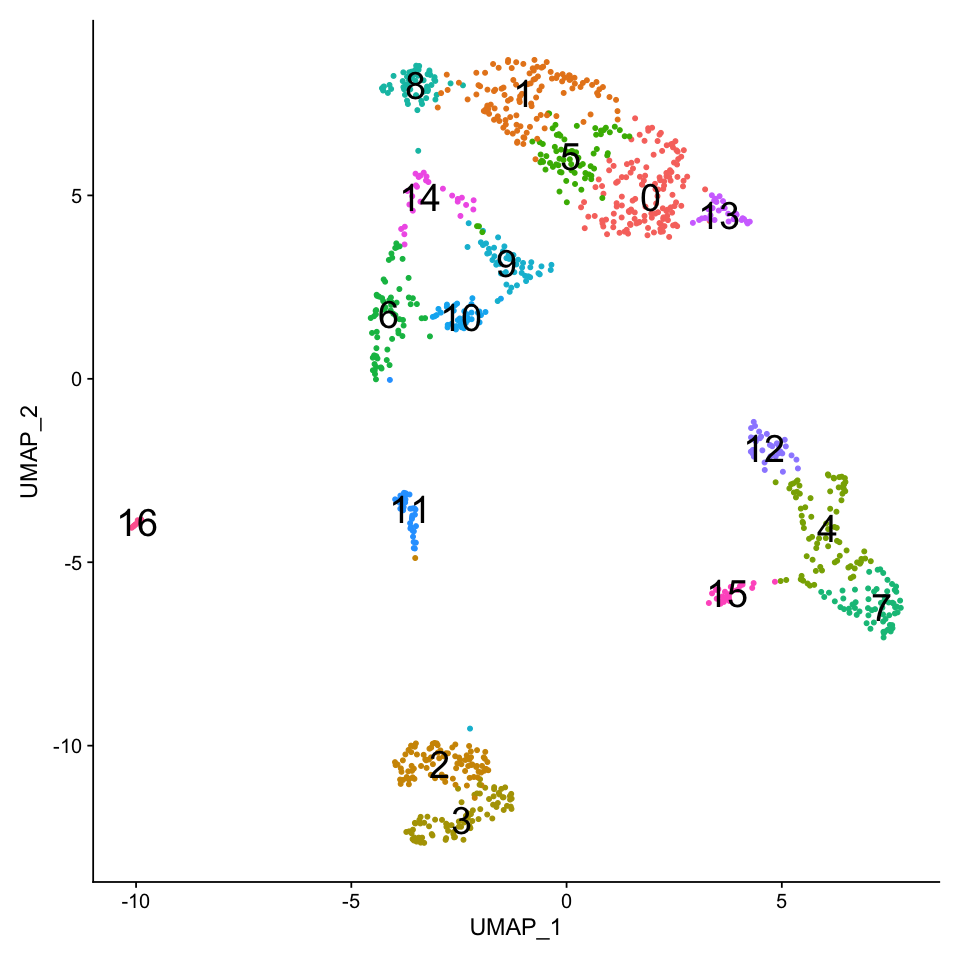

In [3]:
Idents(seu_HQC) <- 'seurat_clusters'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## Trunk mesoderm
### picking up target clusters

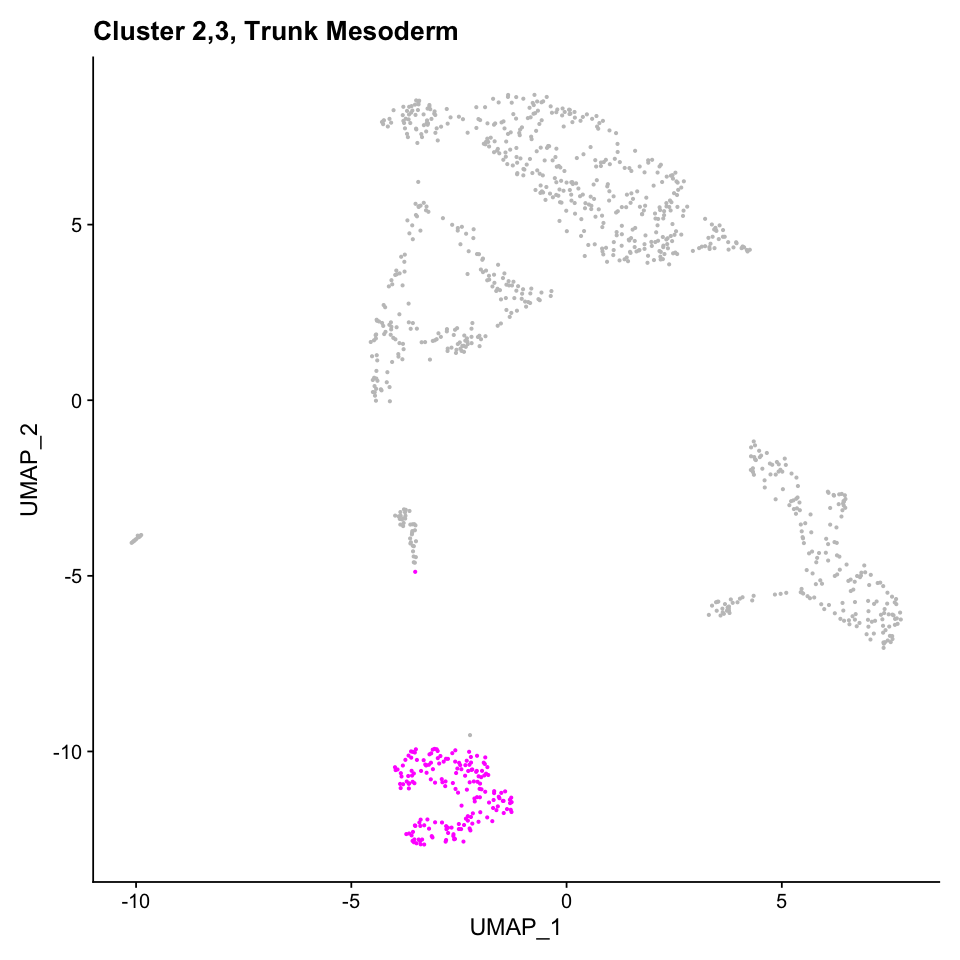

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(2,3))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend()+ ggtitle('Cluster 2,3, Trunk Mesoderm')

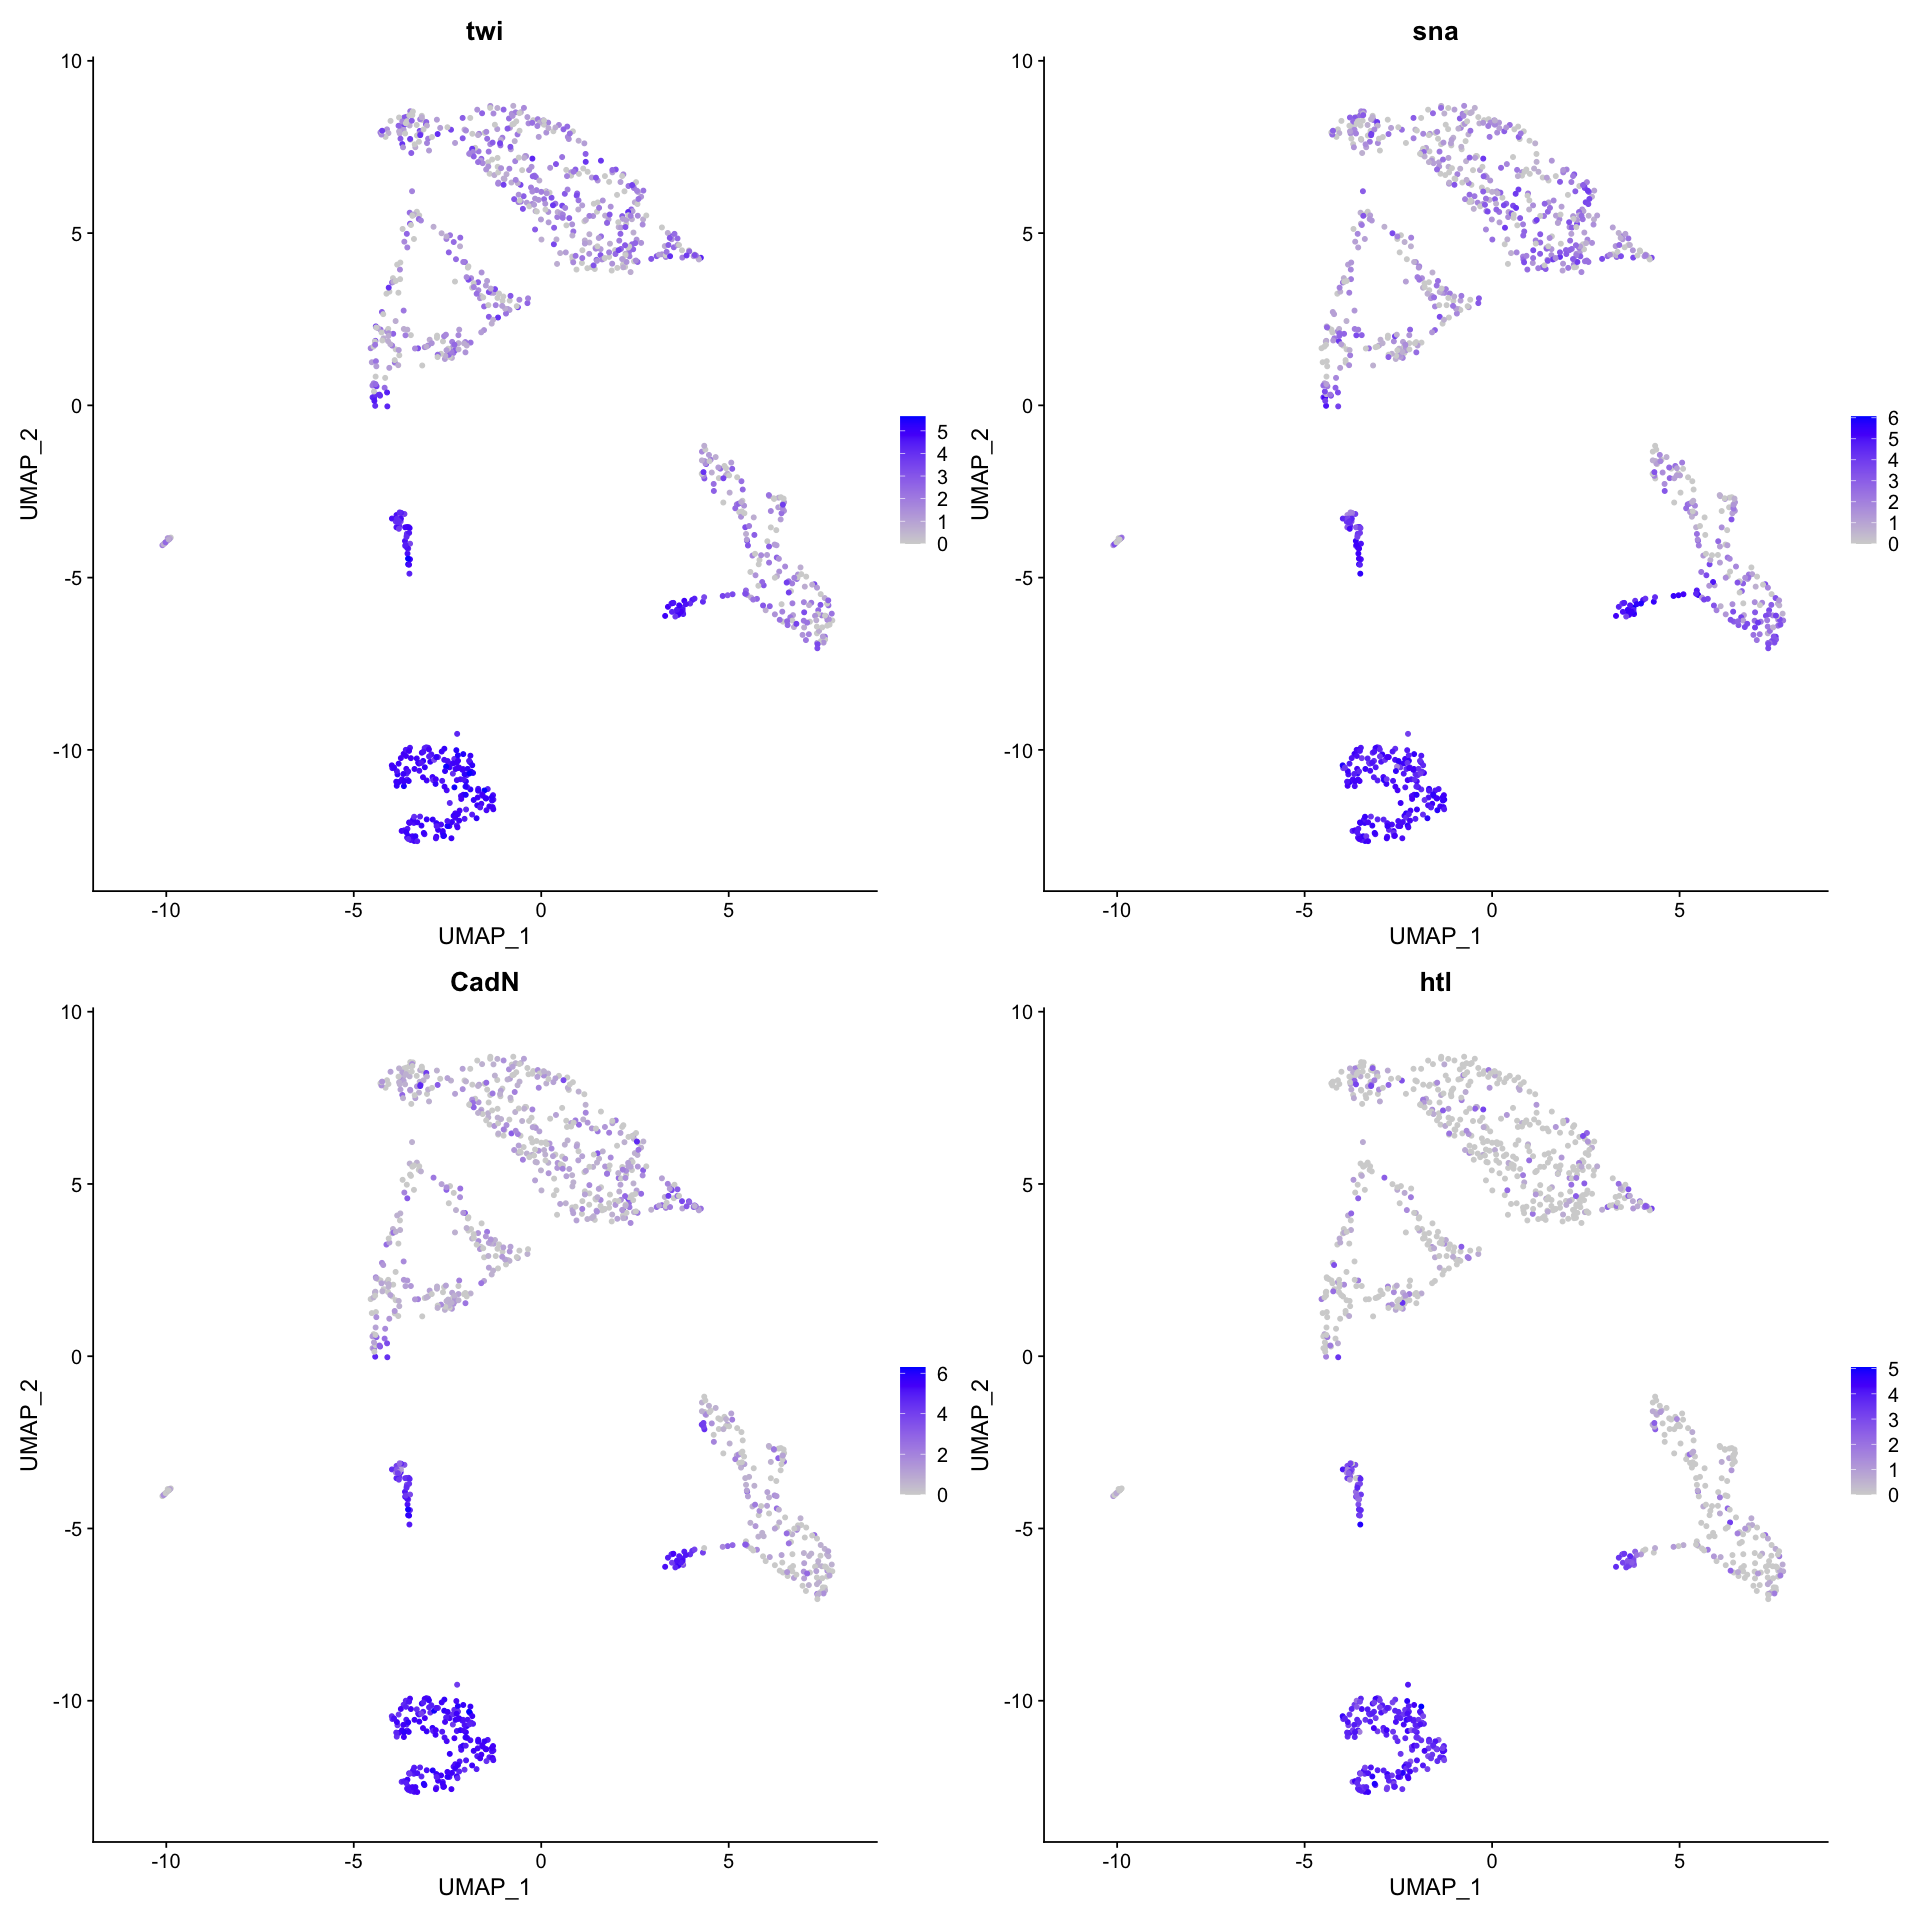

In [5]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, features = c('twi','sna','CadN','htl'))

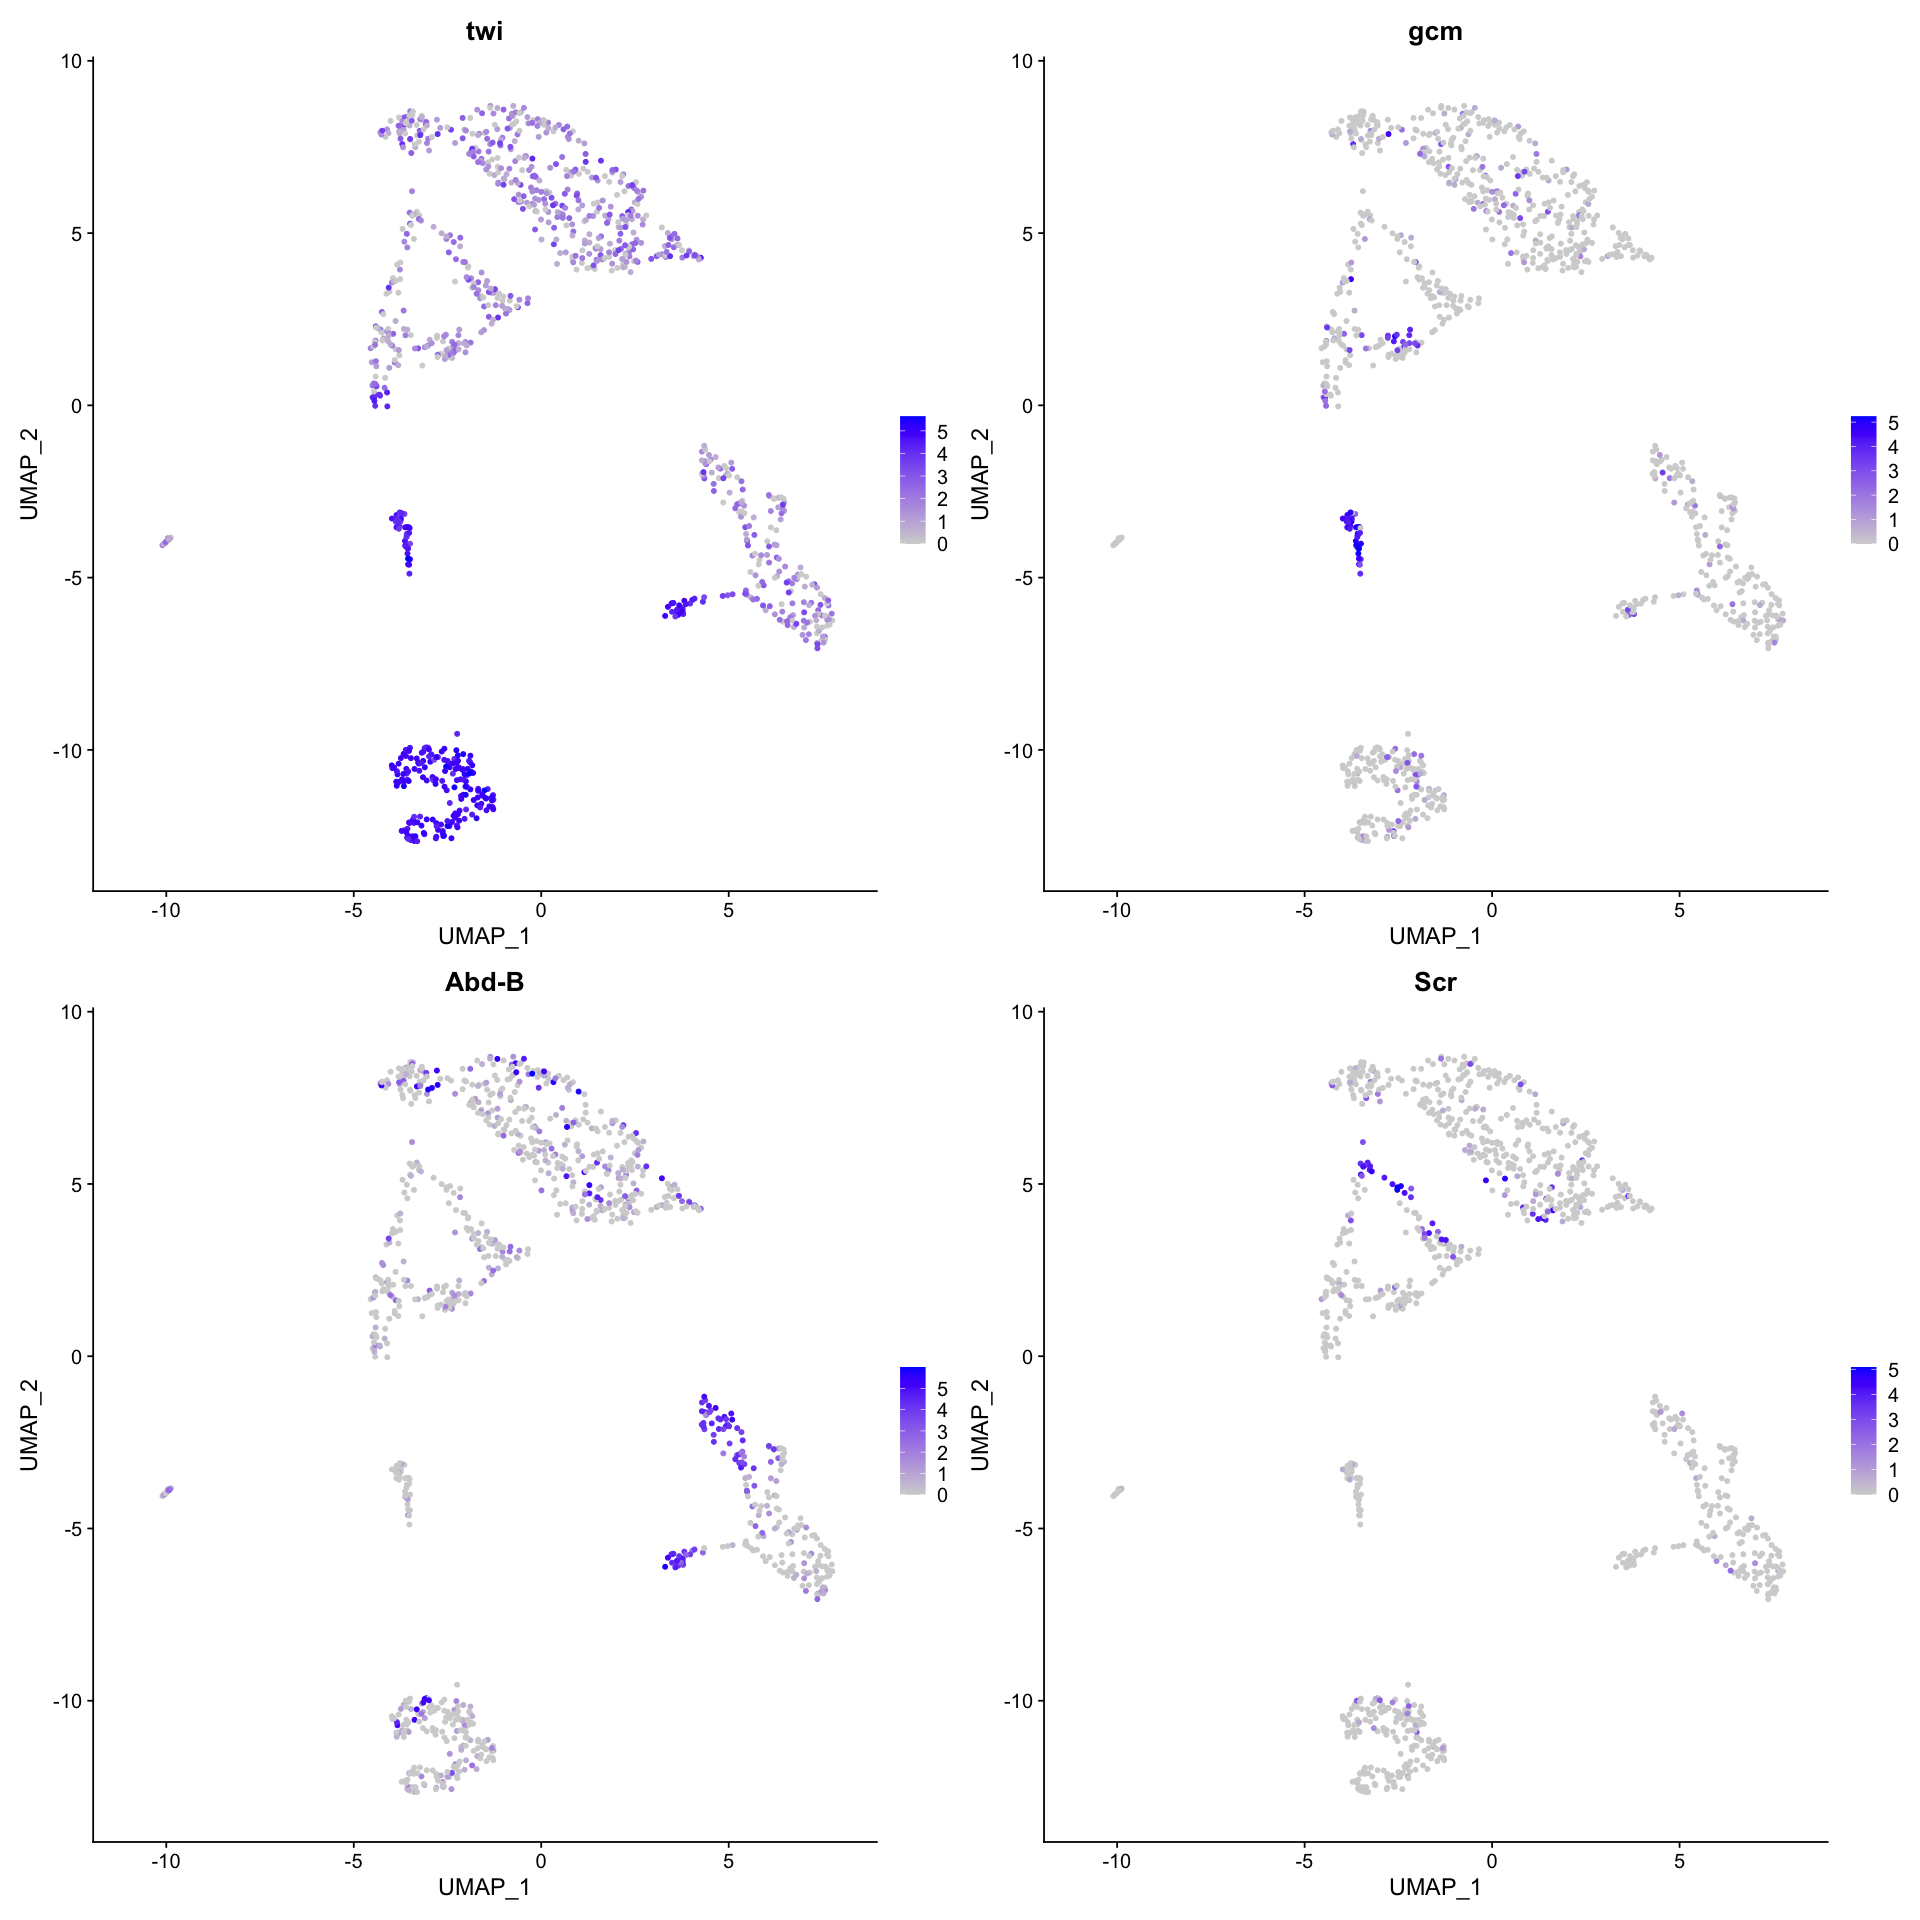

In [6]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, features = c('twi','gcm','Abd-B','Scr'))

In [7]:
seu.trunk.meso <- subset(seu_HQC, ident = c(2,3))
seu.trunk.meso

An object of class Seurat 
28877 features across 175 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

### Clustering
Num of cells < 500  
Skipping re-normalize

PC_ 1 
Positive:  CadN, zfh1, stumps, Mef2, twi, hll, Ilp4, sna, sprt, htl 
	   Act87E, Cyp310a1, CG3036, CG11357, lncRNA:CR45361, NetA, sty, if, CG1673, NetB 
	   VepD, stg, tkv, Mes2, tin, CG14688, ltl, side-V, cnn, pigs 
Negative:  Lac, SoxN, CG13427, Ptr, sdt, Brd, sog, Dl, ths, grh 
	   Tom, CG5059, ImpL2, CG34224, blot, Ocho, CG15628, ASPP, E(spl)malpha-BFM, bib 
	   E(spl)m4-BFM, uif, esg, Meltrin, brk, D, Tet, ec, Trim9, mew 
PC_ 2 
Positive:  Nplp2, CG43355-sala, ich, 28SrRNA-Psi:CR45855, CG3036, side-IV, RpL40, CG42762, RpL14, HmgZ 
	   RpL39, RpLP1, smt3, Cyp310a1, His4r, RpL32, CG14111, CG9171, eve, Dad1 
	   roh, CG12107, 28SrRNA-Psi:CR45860, CHES-1-like, CG15012, RpL41, CG41128, RpL38, hll, Sema5c 
Negative:  trn, slp1, chrb, noc, stg, pxb, CG10479, ftz, rib, egr 
	   Ubx, Toll-7, comm, wg, h, toc, Mdr49, Kr, comm2, NK7.1 
	   Alh, wntD, CG32447, Tom, run, slp2, Antp, Ire1, abd-A, scyl 
PC_ 3 
Positive:  slp1, wg, Toll-6, run, slp2, rgr, comm, smal, prd, pxb 
	   comm2, A

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 175
Number of edges: 8928

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3917
Number of communities: 3
Elapsed time: 0 seconds


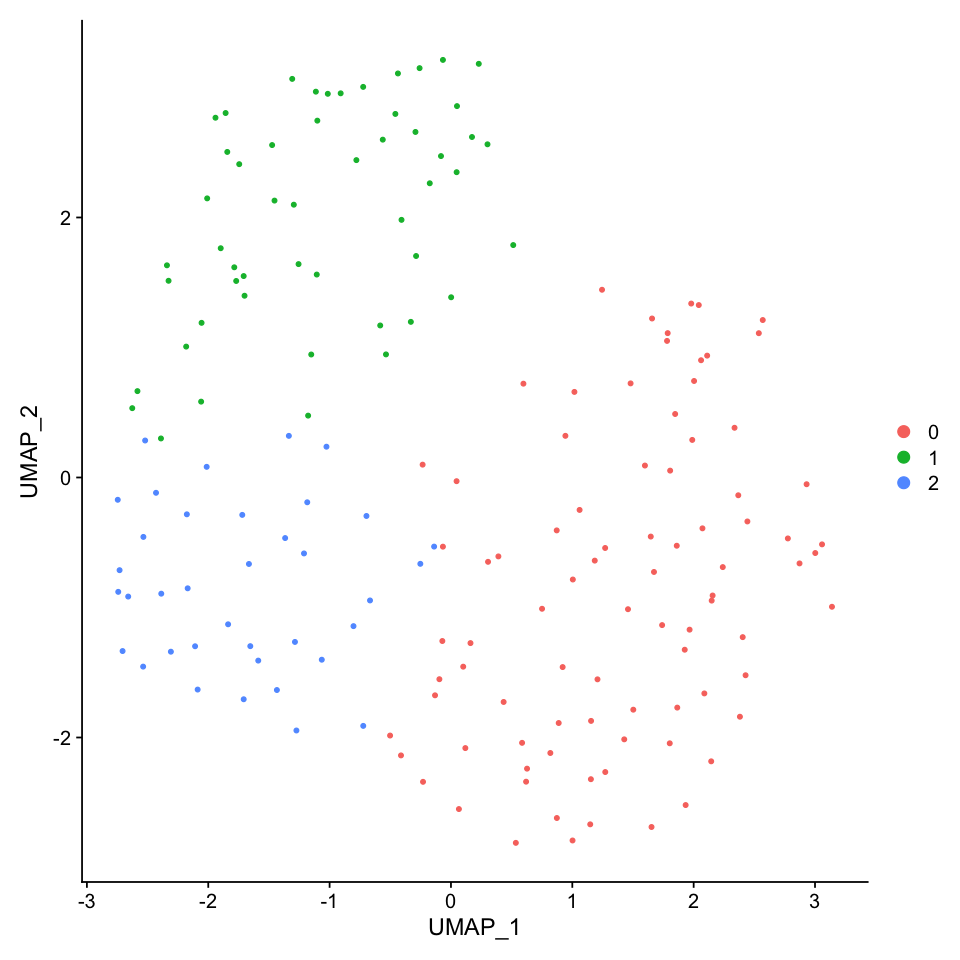

In [8]:
options(repr.plot.width=8, repr.plot.height=8)
seu.trunk.meso <- RunPCA(seu.trunk.meso)
seu.trunk.meso <- RunUMAP(seu.trunk.meso, dims = 1:30, n.neighbors = 20L)
seu.trunk.meso <- FindNeighbors(seu.trunk.meso, dims = 1:30)
seu.trunk.meso <- FindClusters(seu.trunk.meso)
DimPlot(seu.trunk.meso, reduction = 'umap')

In [9]:
all.markers.meso <- FindAllMarkers(object = seu.trunk.meso, only.pos = TRUE)
nrow(all.markers.meso)
all.markers.meso.top10 <- all.markers.meso %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.meso.top10)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



[1] 237

[1] 30

Warning message in DoHeatmap(seu.trunk.meso, features = c(all.markers.meso.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Kdm2, CG7120”


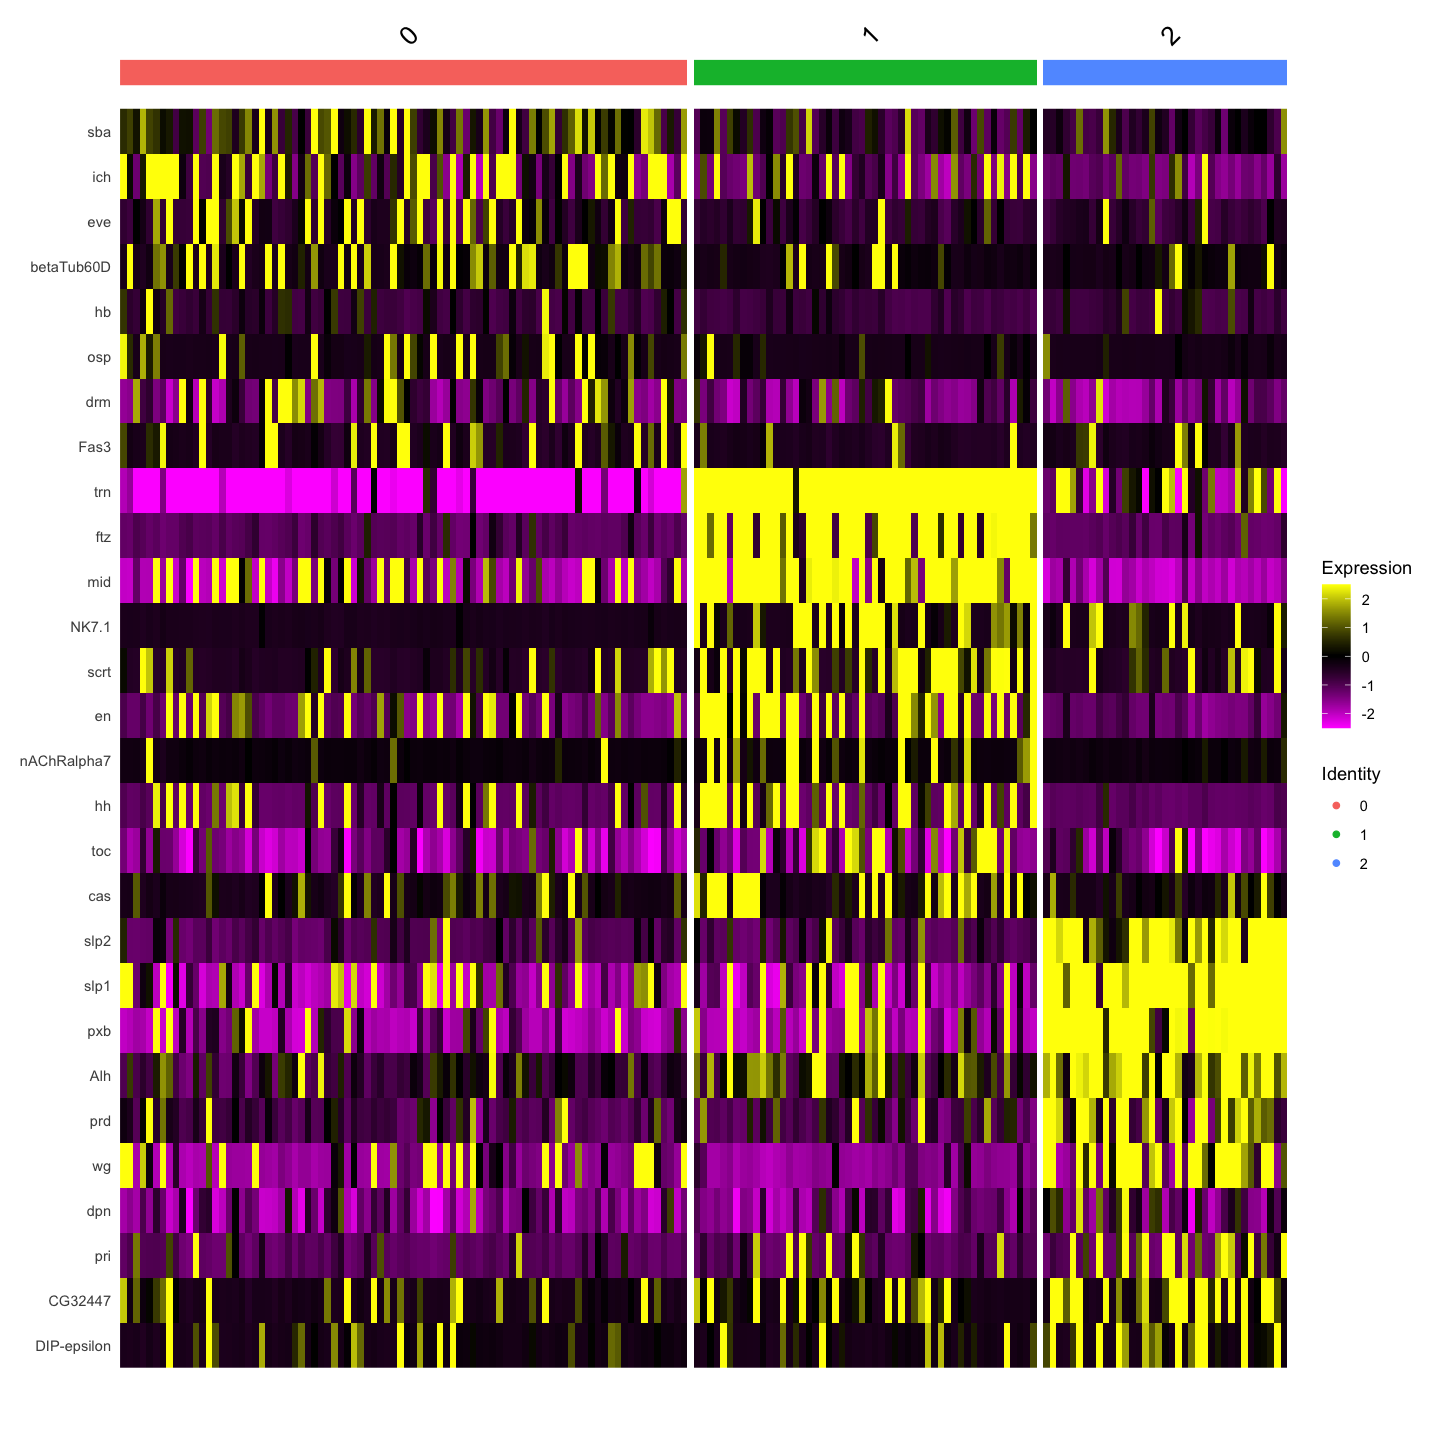

In [10]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.trunk.meso, features = c(all.markers.meso.top10$gene))

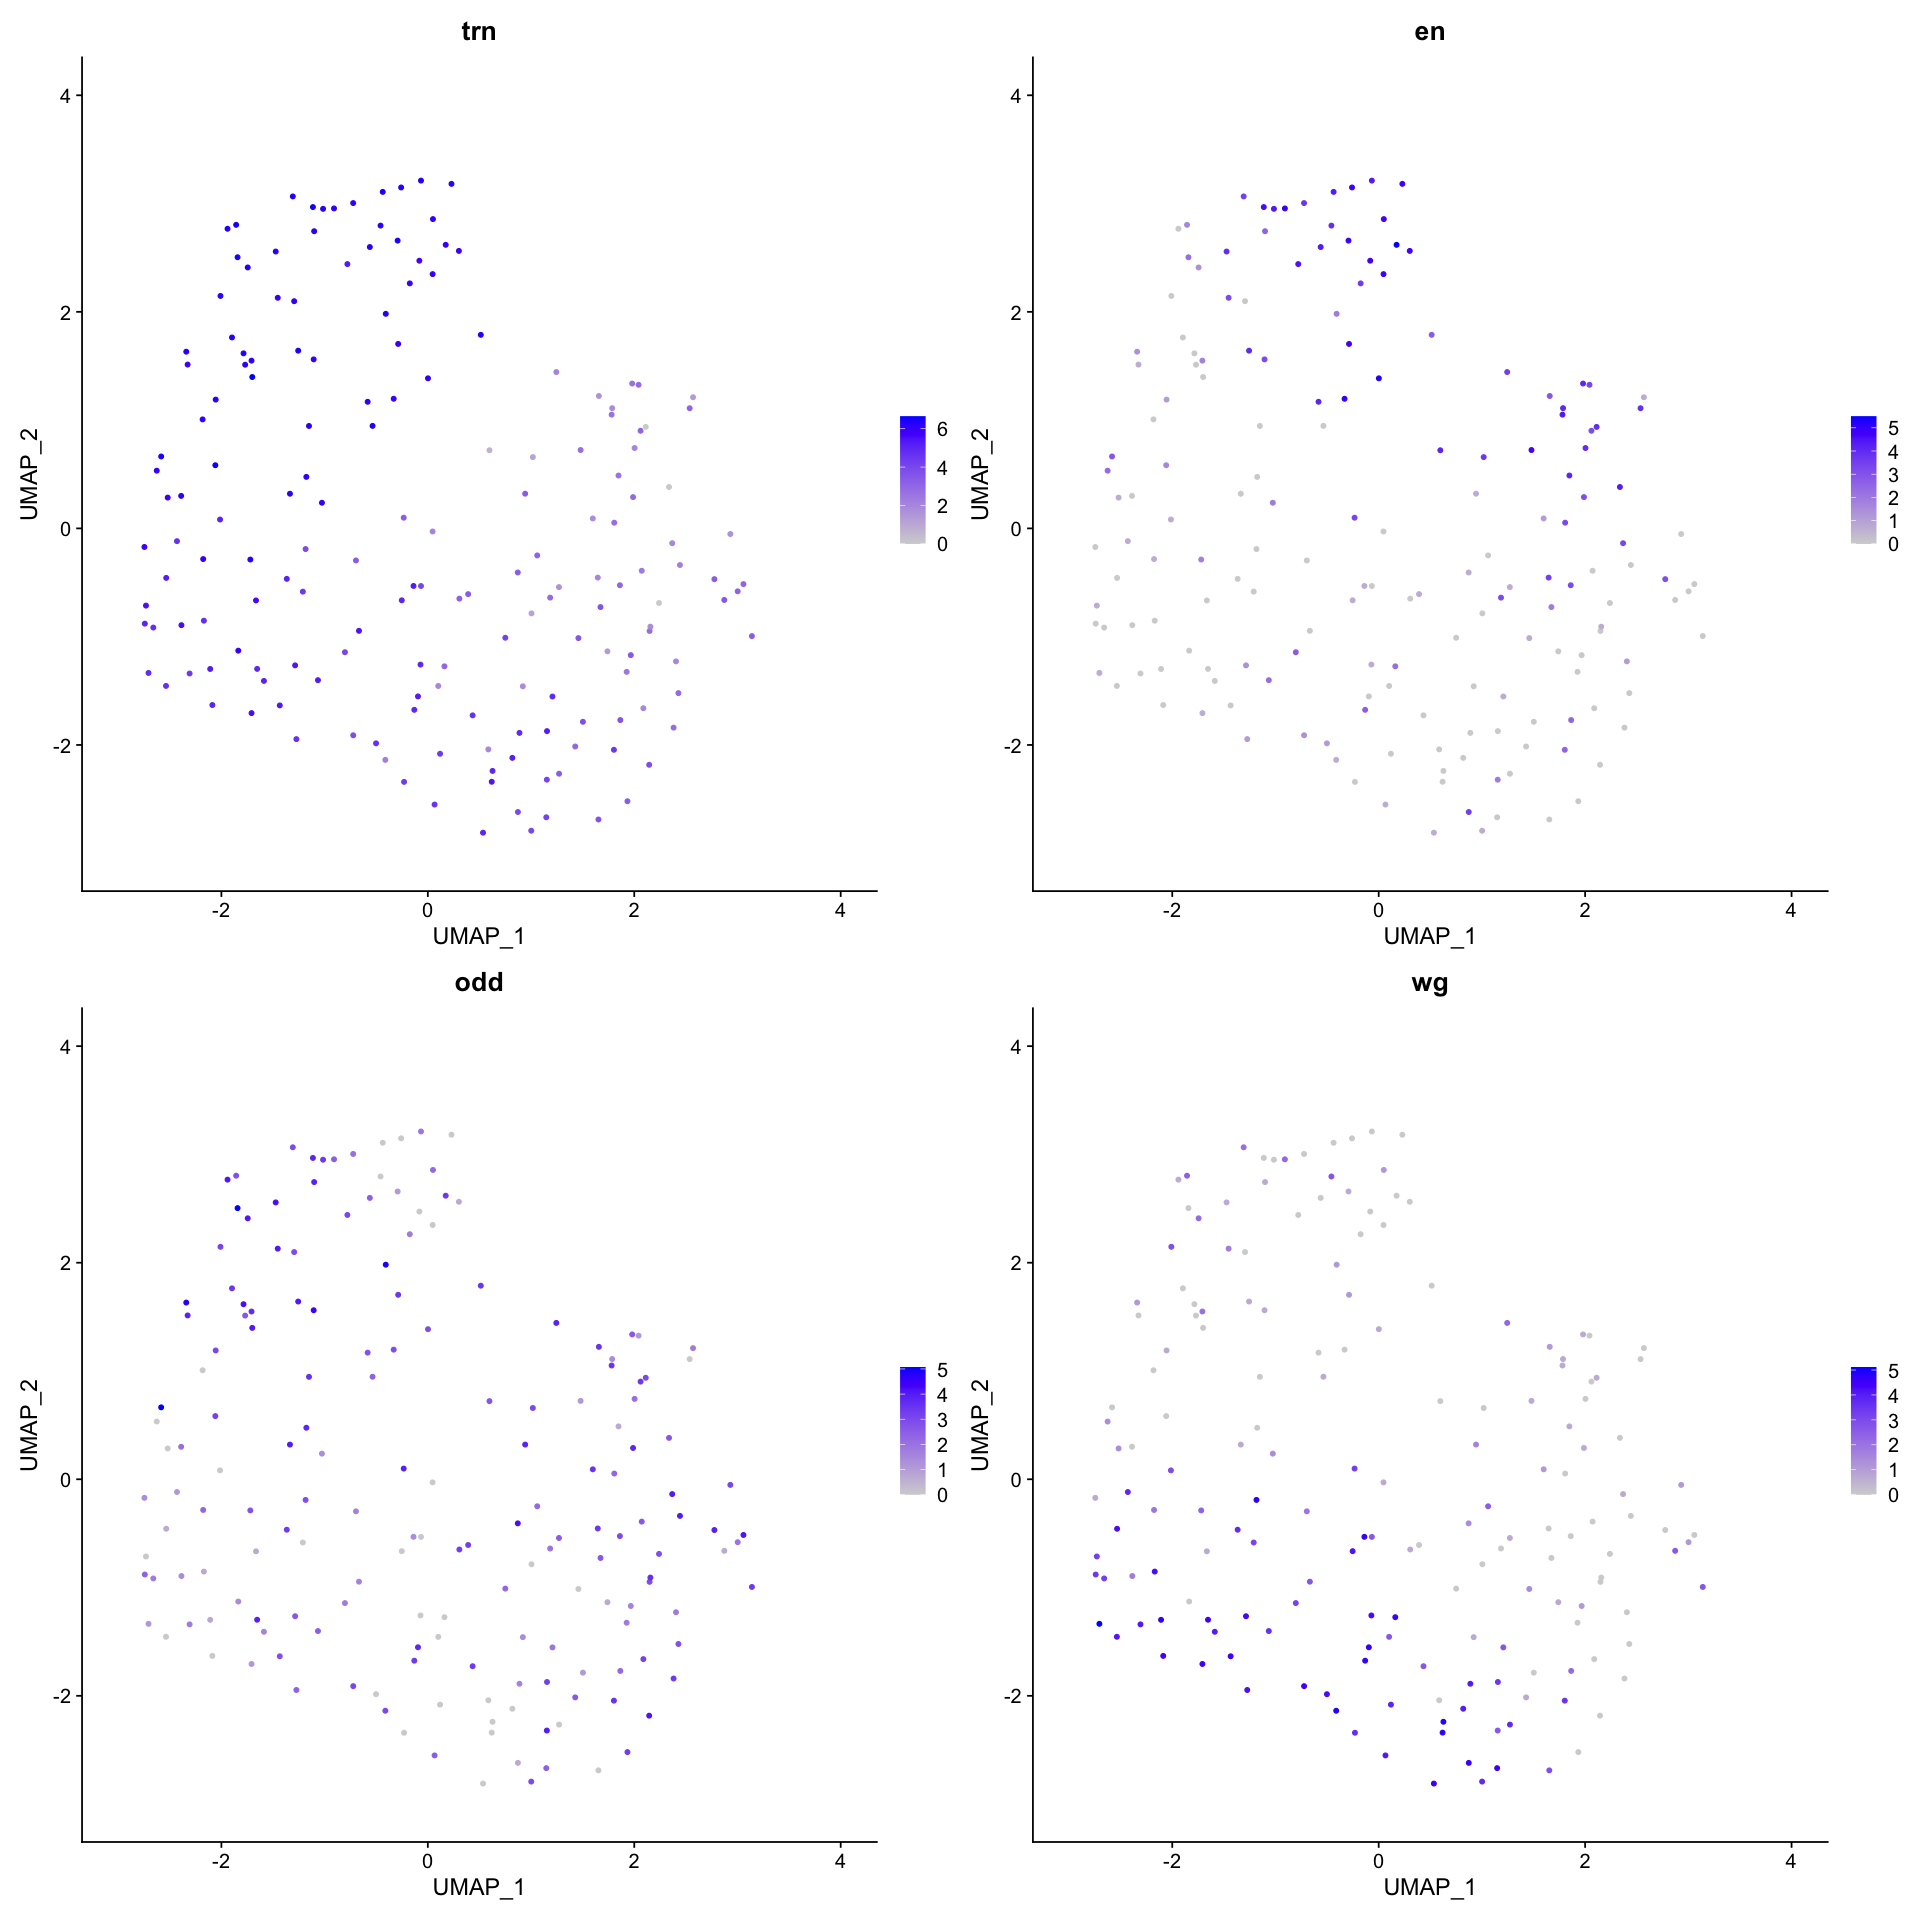

In [11]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.trunk.meso, features = c('trn','en','odd','wg'))

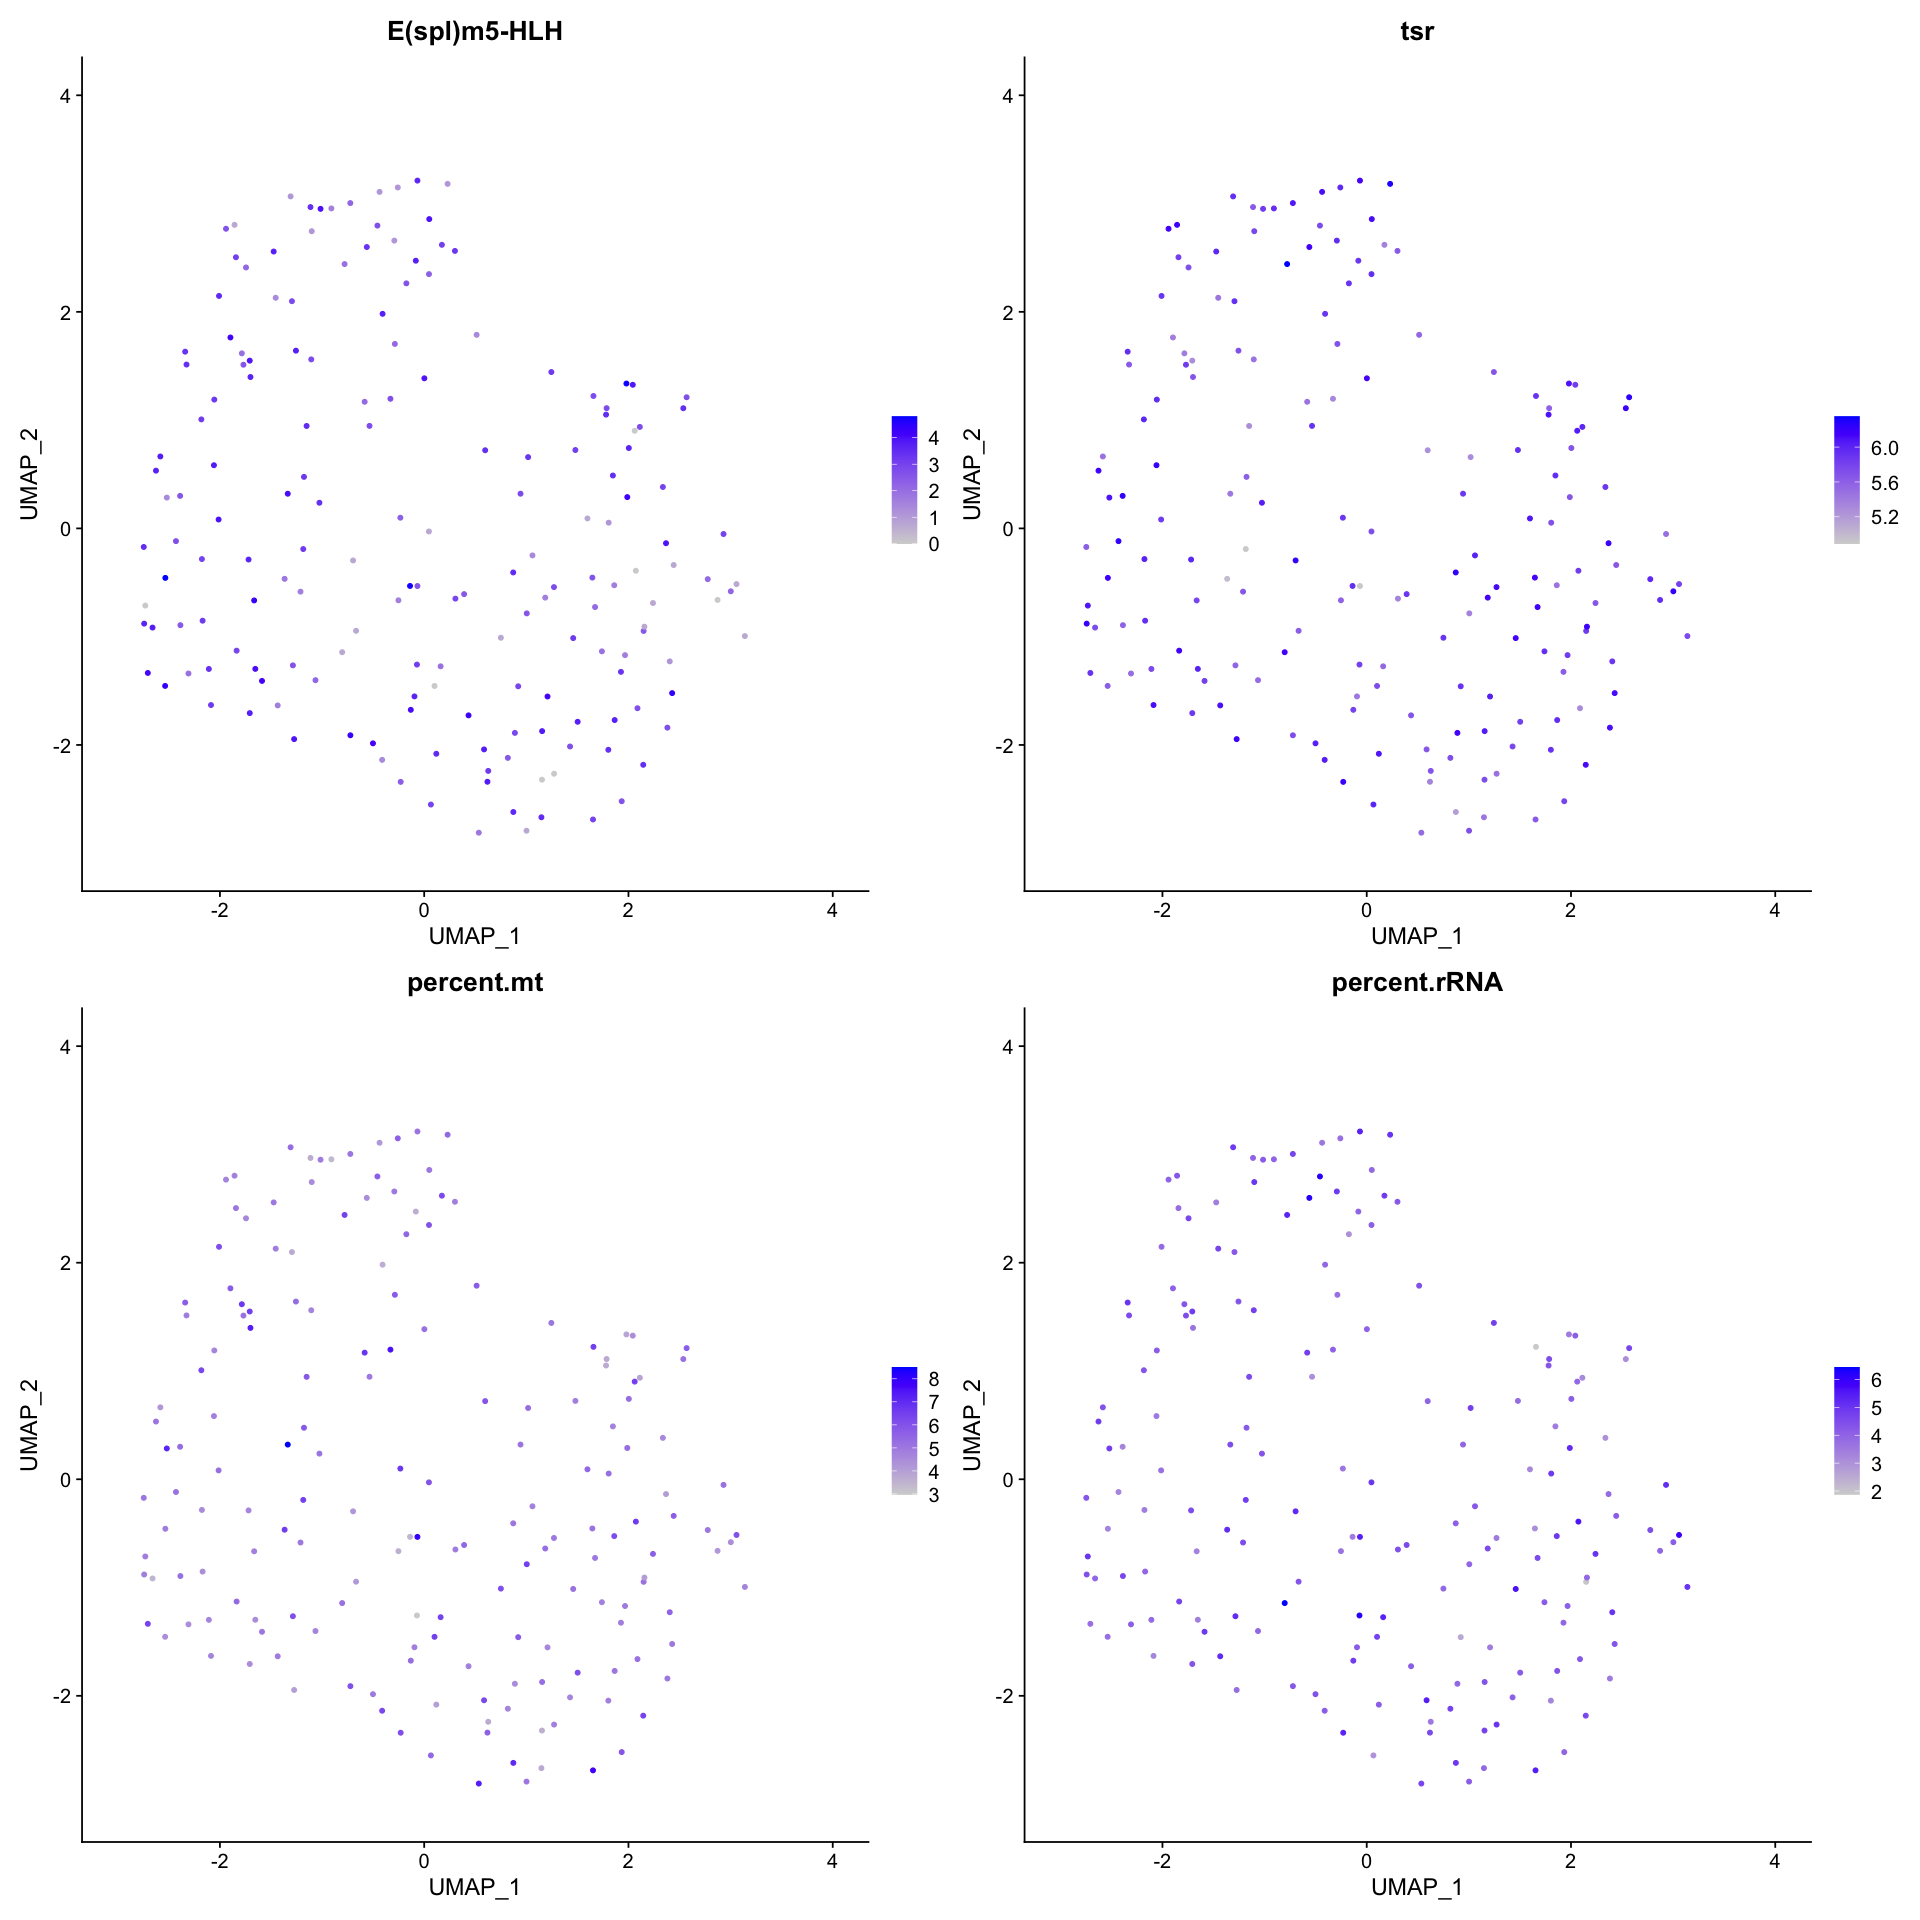

In [12]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.trunk.meso, features = c('E(spl)m5-HLH','tsr','percent.mt','percent.rRNA'))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 175
Number of edges: 8928

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2272
Number of communities: 4
Elapsed time: 0 seconds


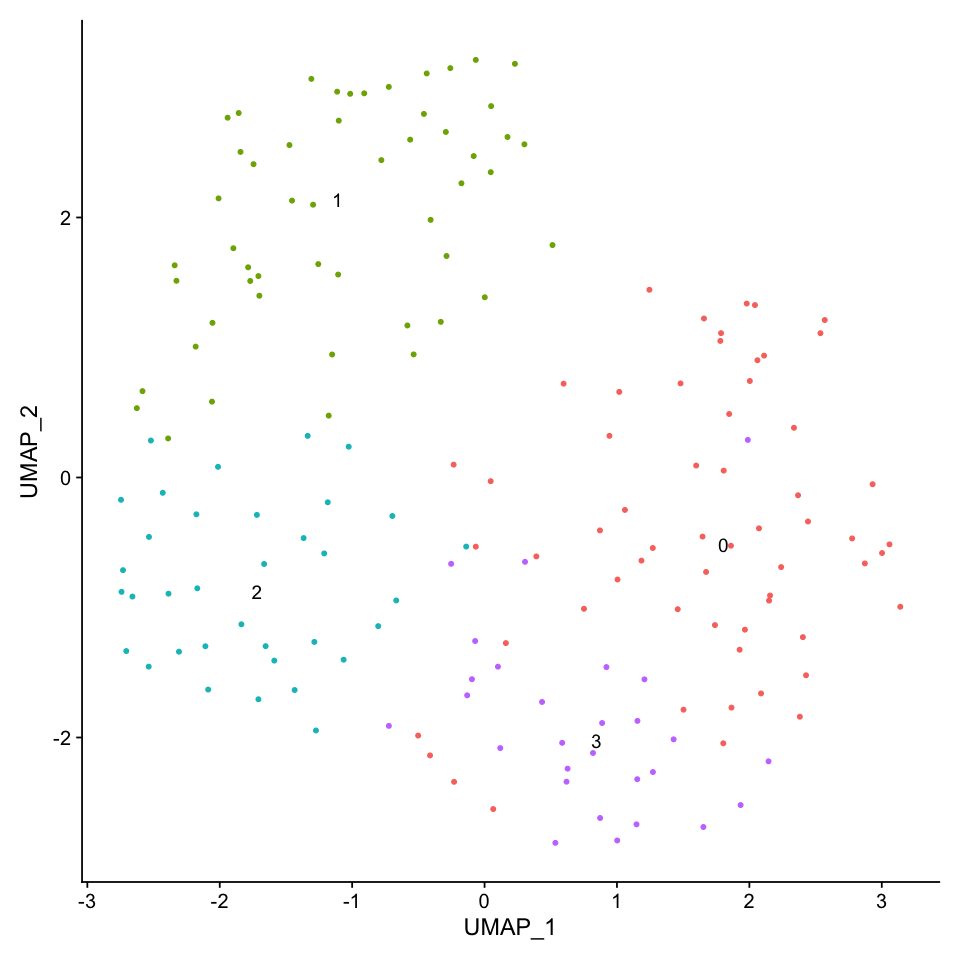

In [13]:
seu.trunk.meso <- FindClusters(seu.trunk.meso, resolution = 1.3)
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.trunk.meso, reduction = 'umap', label = T) + NoLegend()

In [14]:
all.markers.meso <- FindAllMarkers(object = seu.trunk.meso, only.pos = TRUE)
nrow(all.markers.meso)
all.markers.meso.top10 <- all.markers.meso %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.meso.top10)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



[1] 365

[1] 40

Warning message in DoHeatmap(seu.trunk.meso, features = c(all.markers.meso.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG2017, lncRNA:CR46250, Smyd5, CG12929”


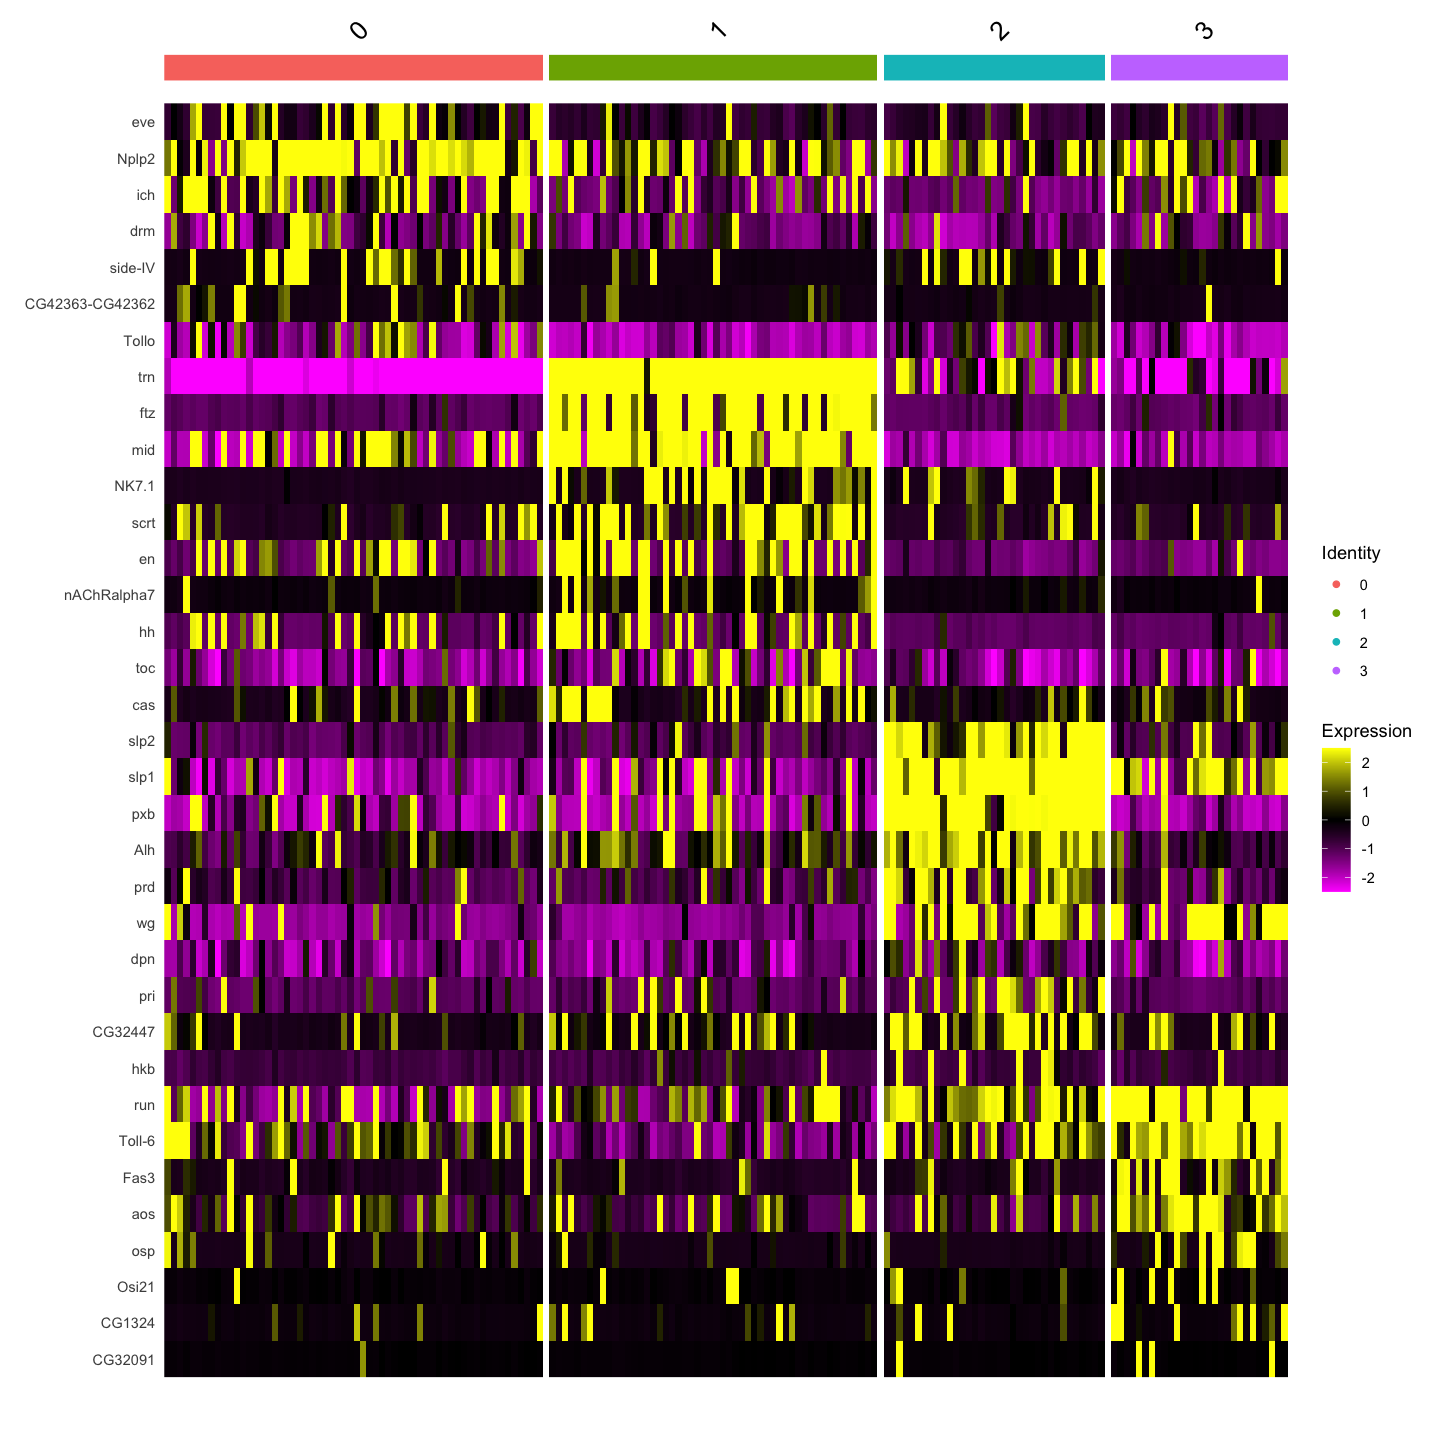

In [15]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.trunk.meso, features = c(all.markers.meso.top10$gene))

Cluster 0: trn-, eve+ -> odd parasegment, anterior part  
Cluster 1: trn+, ftz+ -> even parasegment, anterior part  
Cluster 2: trn+, slp+ -> even parasegment, posterior part  
Cluster 3: trn-, slp+ -> odd parasegment, posterior part

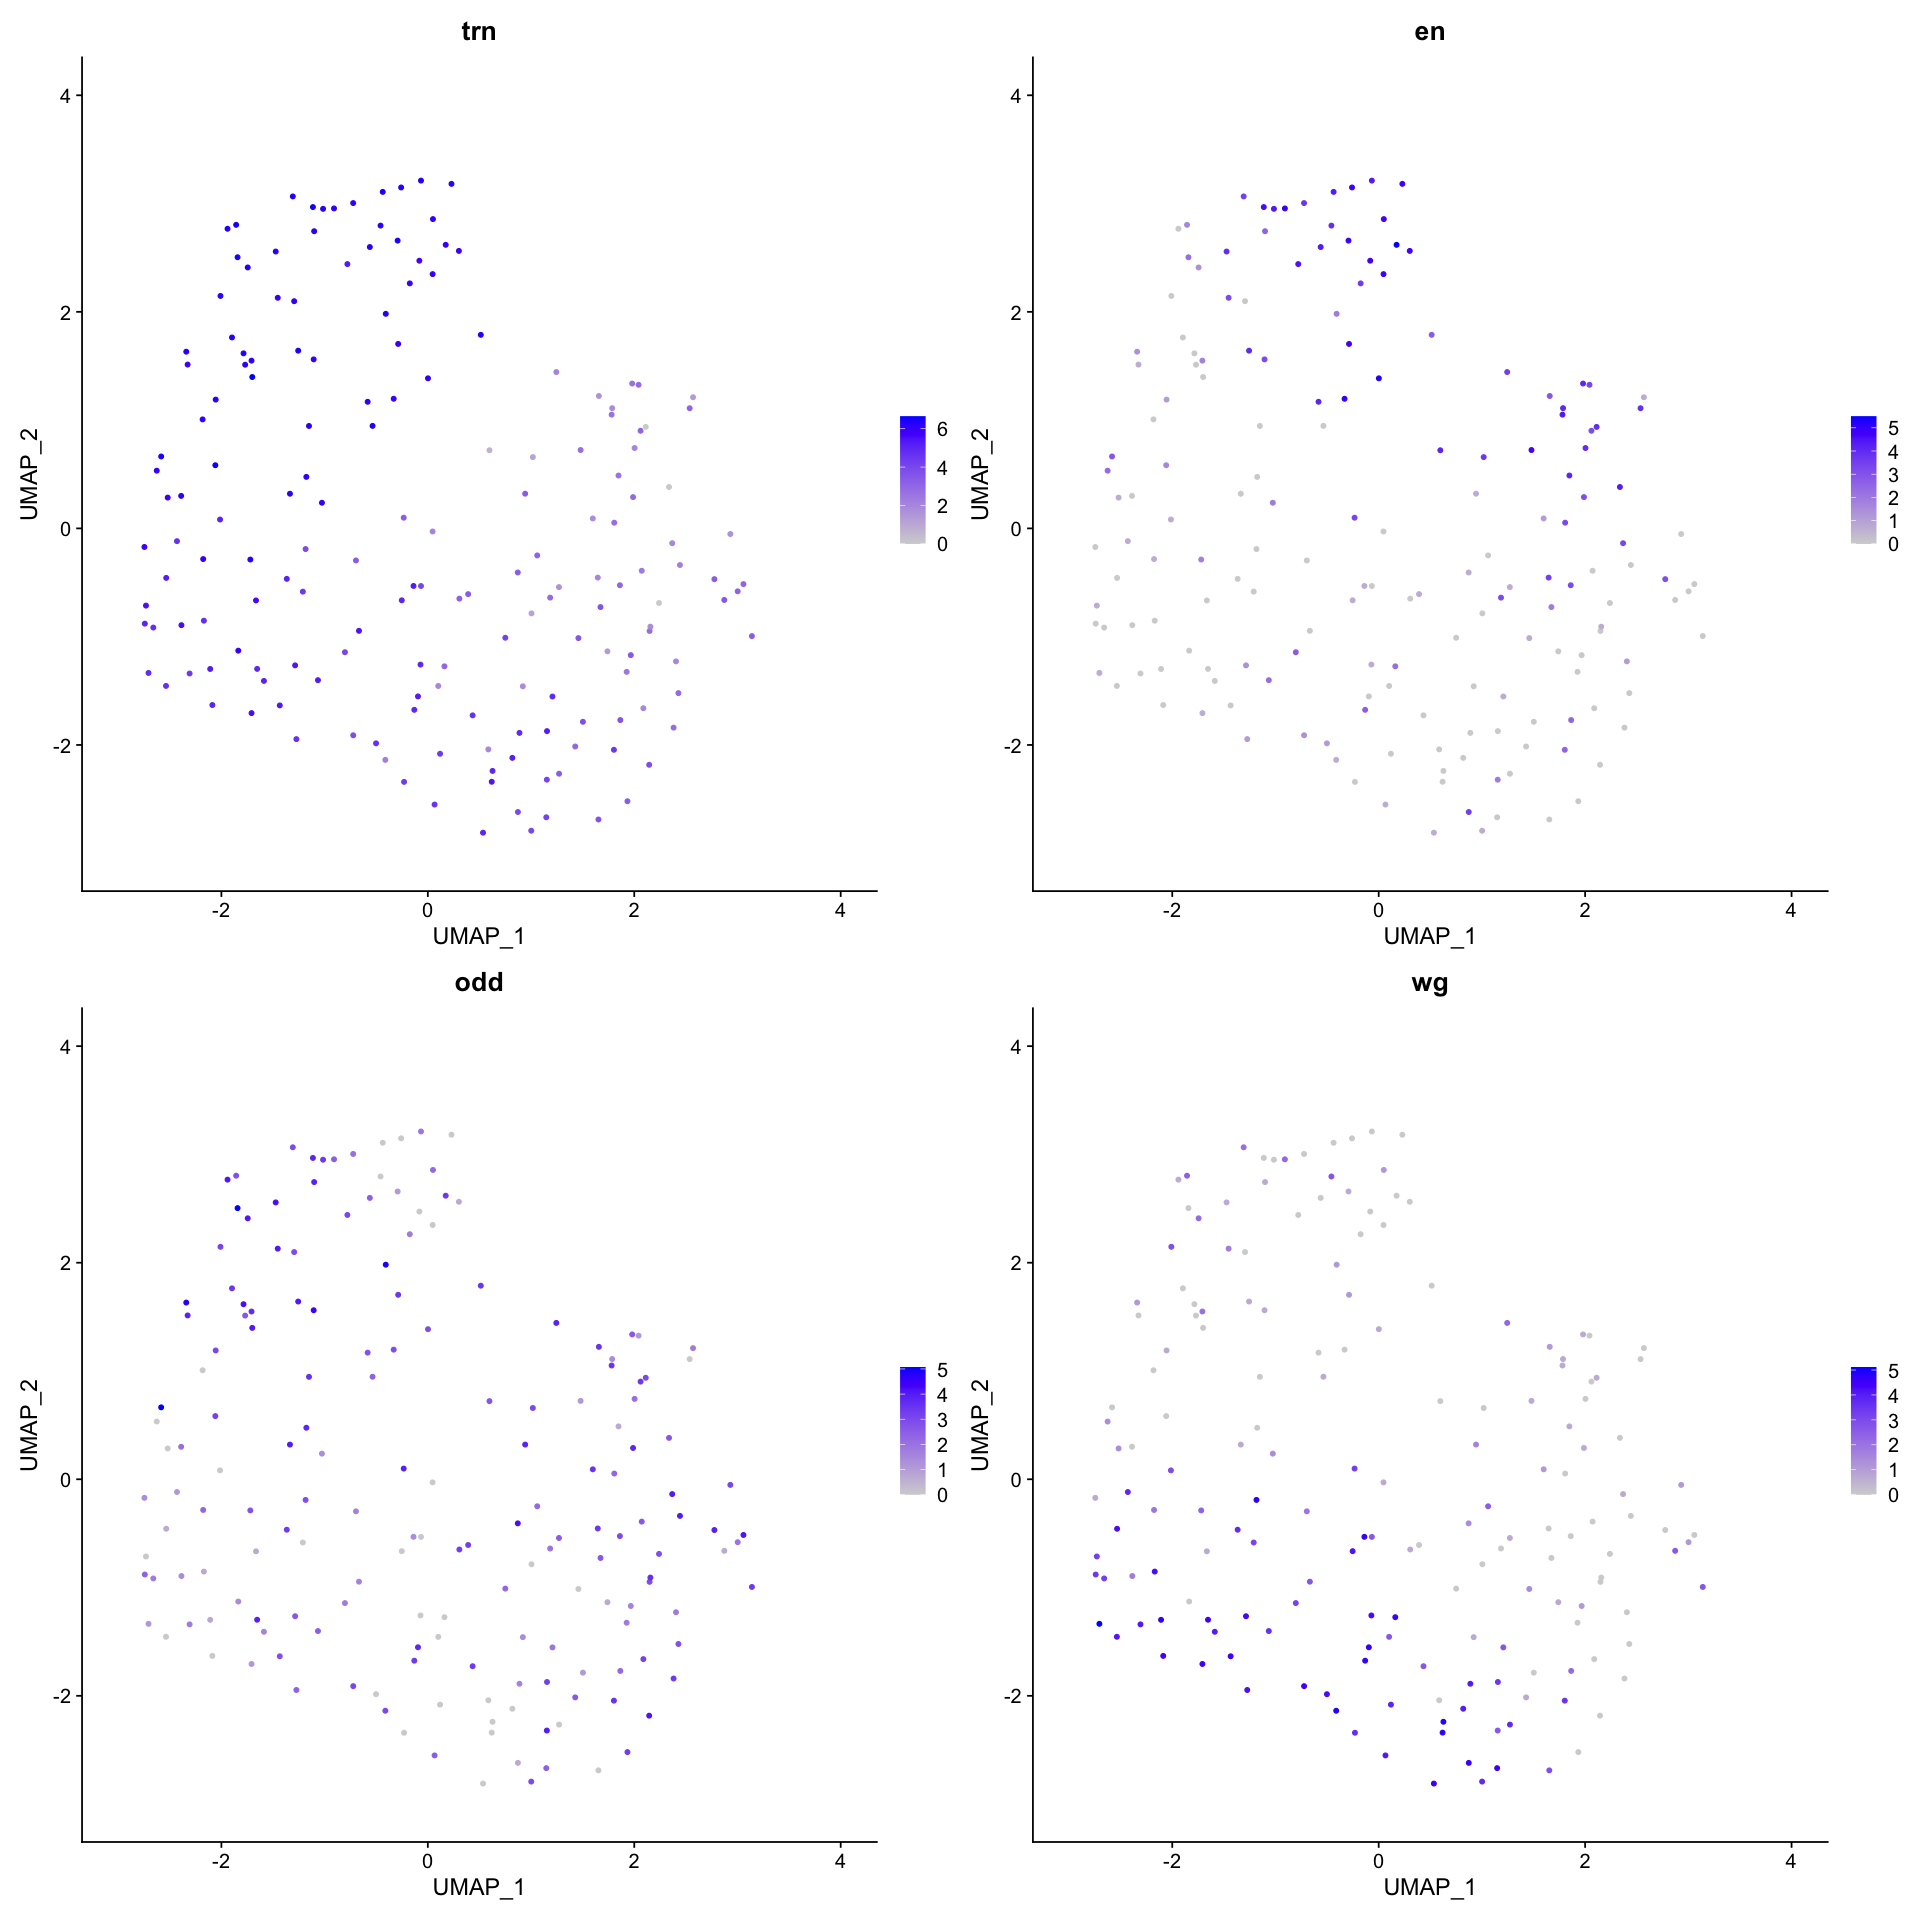

In [16]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.trunk.meso, features = c('trn','en','odd','wg'))

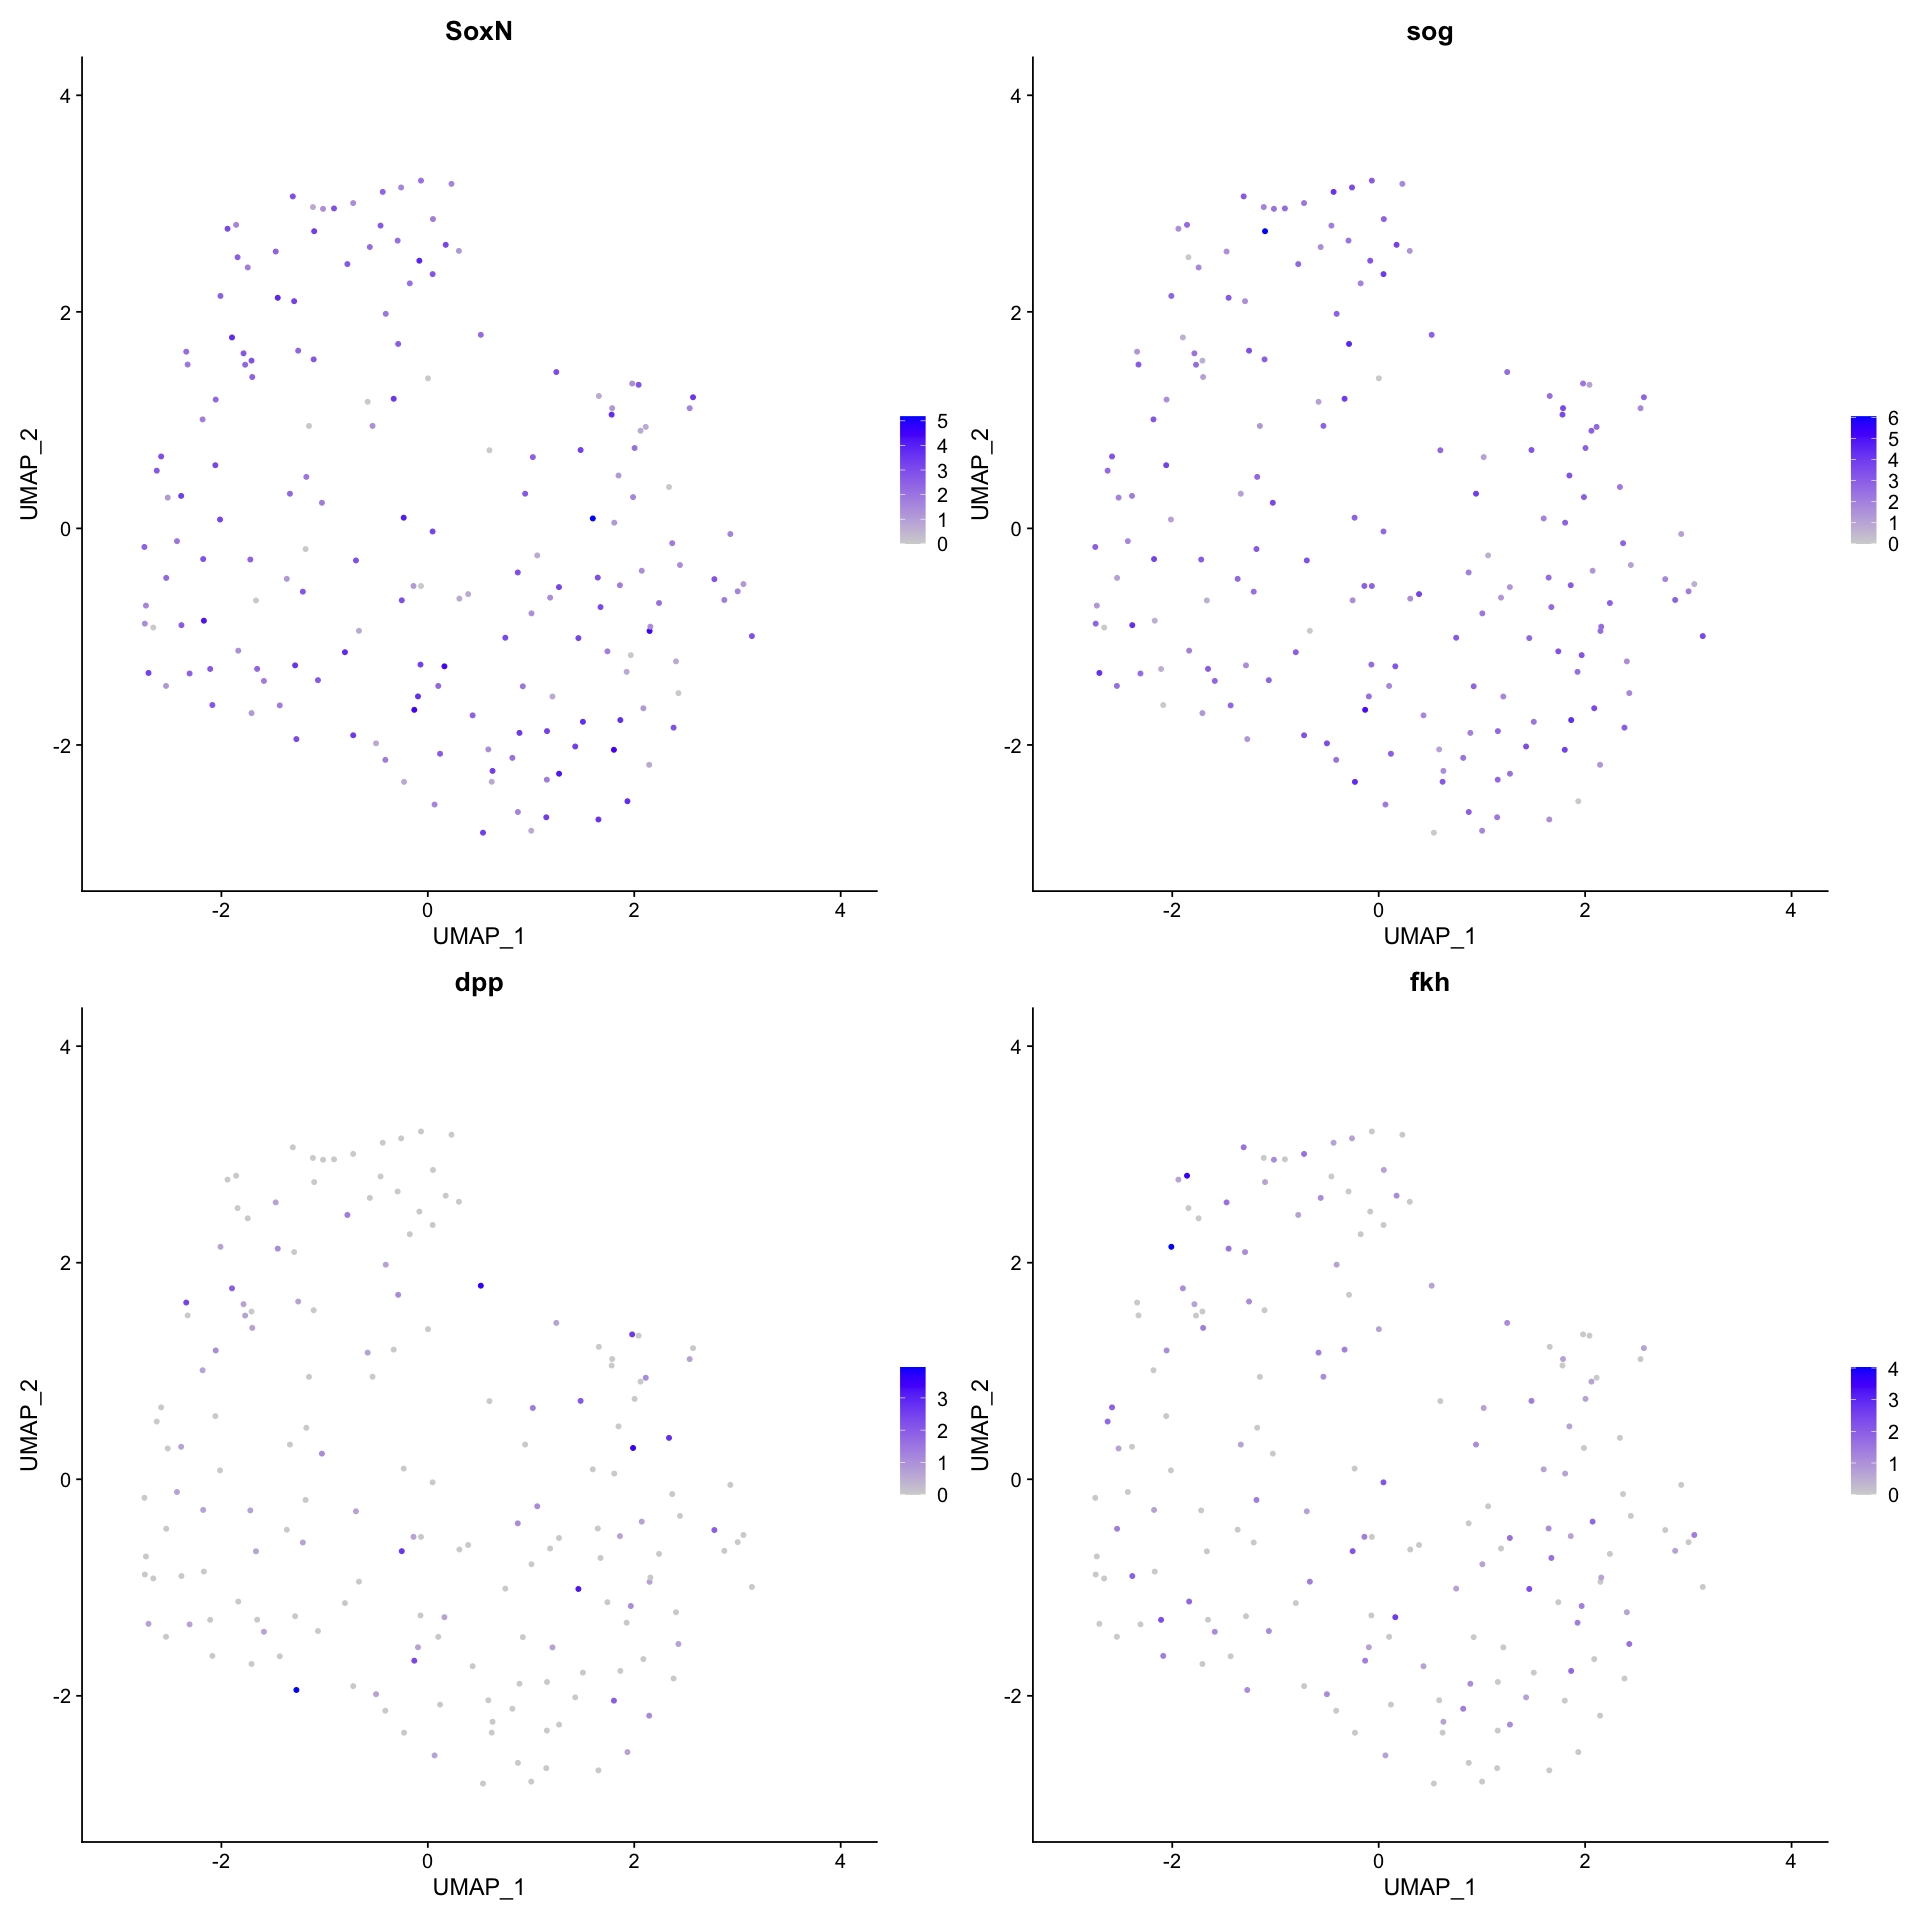

In [17]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.trunk.meso, features = c('SoxN','sog','dpp','fkh'))

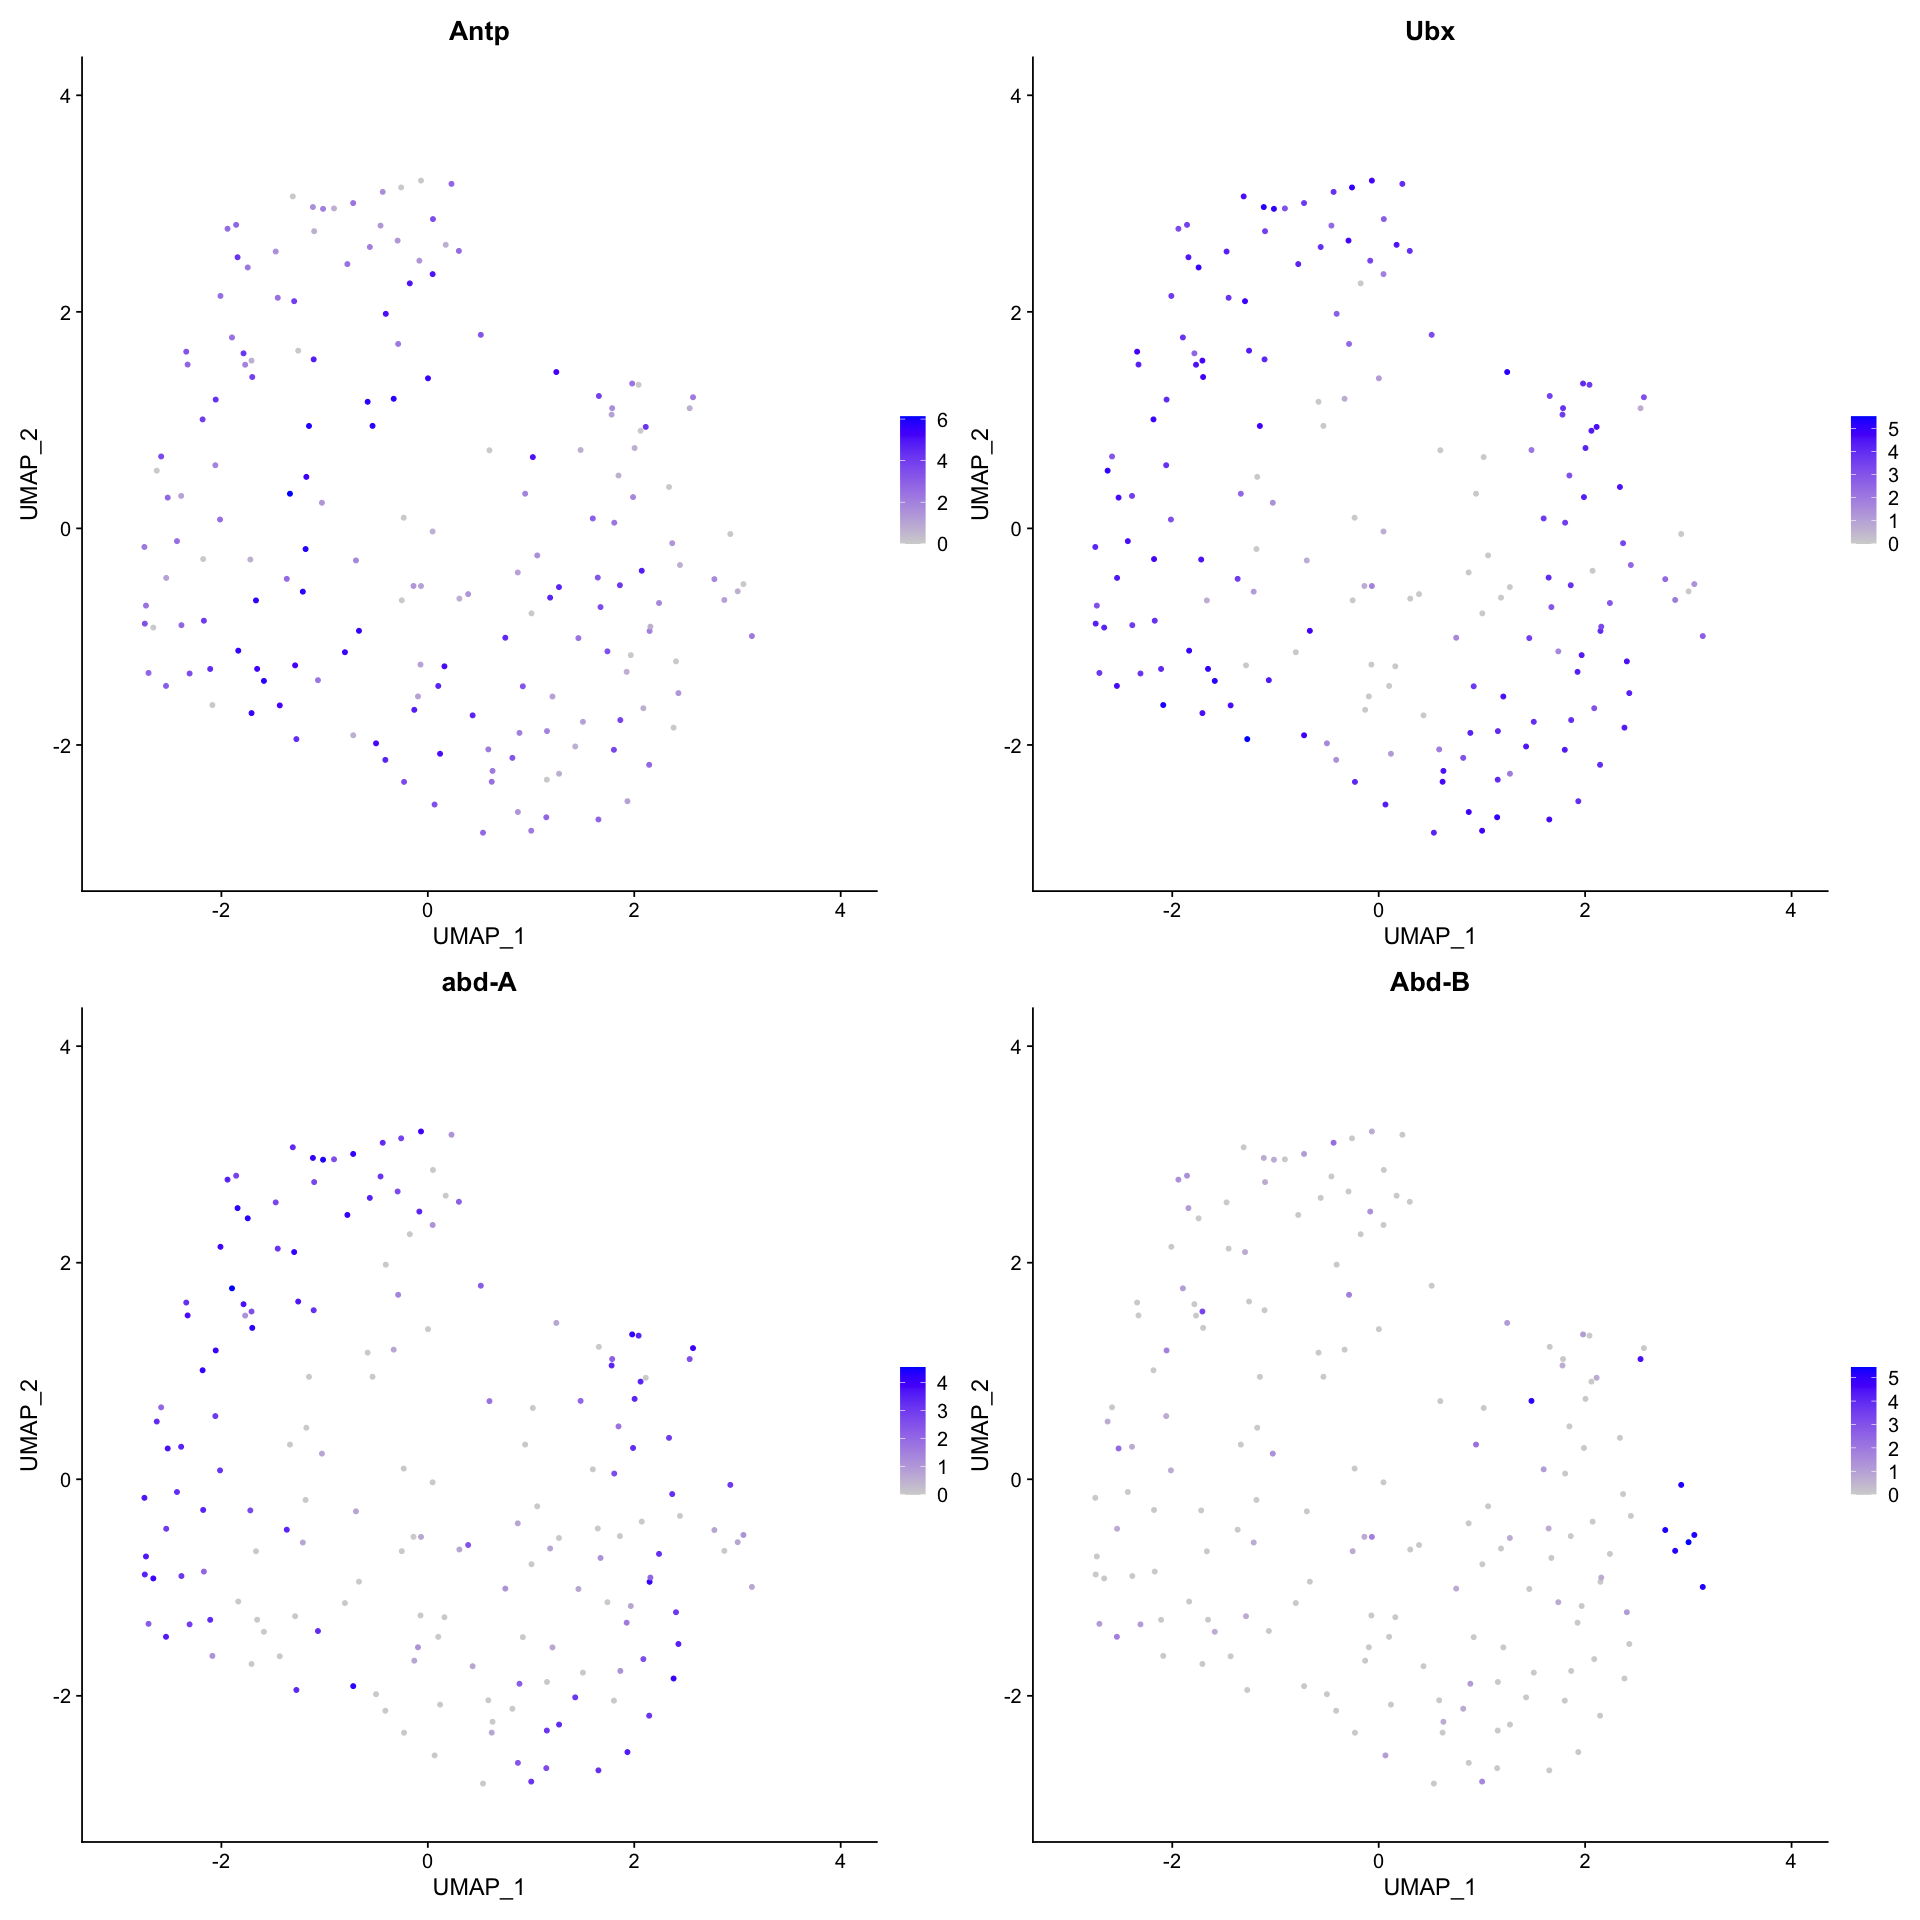

In [18]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.trunk.meso, features = c('Antp','Ubx','abd-A','Abd-B'))

Odd parasegments includes PS13 (Abd-B+)

### Add annotation

manual_ID
batch1_col2GTCTAC 0        
batch1_col4CAGATC 2        
batch1_col4CTCGAT 2        
batch1_col5CTCGAT 3        
batch1_col5GCTACA 1        
batch1_col7GTCTAC 2

manual_ID          
batch1_col2GTCTAC mesoderm_trunk_odd 
batch1_col4CAGATC mesoderm_trunk_even
batch1_col4CTCGAT mesoderm_trunk_even
batch1_col5CTCGAT mesoderm_trunk_odd 
batch1_col5GCTACA mesoderm_trunk_even
batch1_col7GTCTAC mesoderm_trunk_even

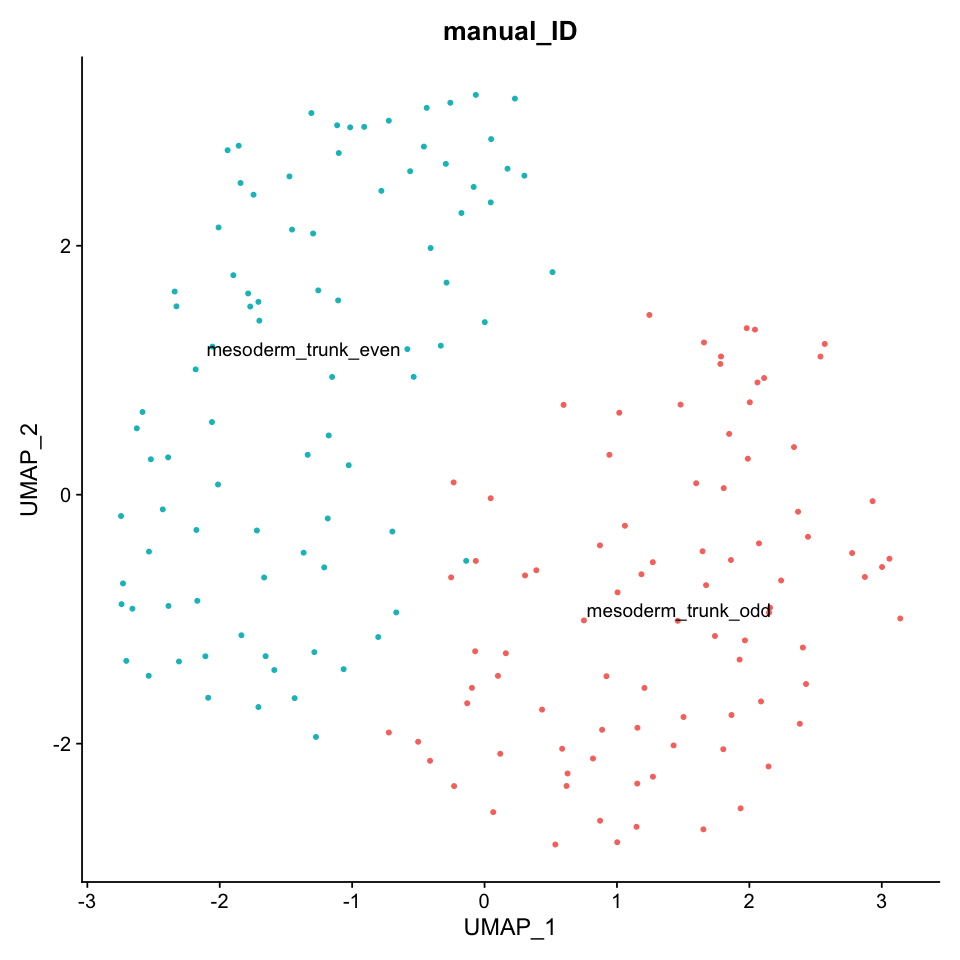

In [19]:
manual_id <- as.data.frame(seu.trunk.meso$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)
manual_id$manual_ID <- dplyr::recode(manual_id$manual_ID, 
                                "0" = "mesoderm_trunk_odd", 
                                "1" = "mesoderm_trunk_even", #trn+
                                "2" = "mesoderm_trunk_even", #trn+
                                "3" = "mesoderm_trunk_odd"
                                )

head(manual_id)

seu.trunk.meso$manual_ID <- manual_id
Idents(seu.trunk.meso) <- 'manual_ID'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.trunk.meso, reduction = 'umap', label = TRUE, group.by = 'manual_ID') + NoLegend()

In [20]:
levels(seu.trunk.meso) <- c('mesoderm_trunk_even','mesoderm_trunk_odd')
all.markers.meso <- FindAllMarkers(object = seu.trunk.meso, only.pos = TRUE)
nrow(all.markers.meso)
all.markers.meso.top10 <- all.markers.meso %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.meso.top10)

Calculating cluster mesoderm_trunk_even

Calculating cluster mesoderm_trunk_odd



[1] 150

[1] 20

Warning message in DoHeatmap(seu.trunk.meso, features = c(all.markers.meso.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG34001, CG2017, CG9886, CG7120”


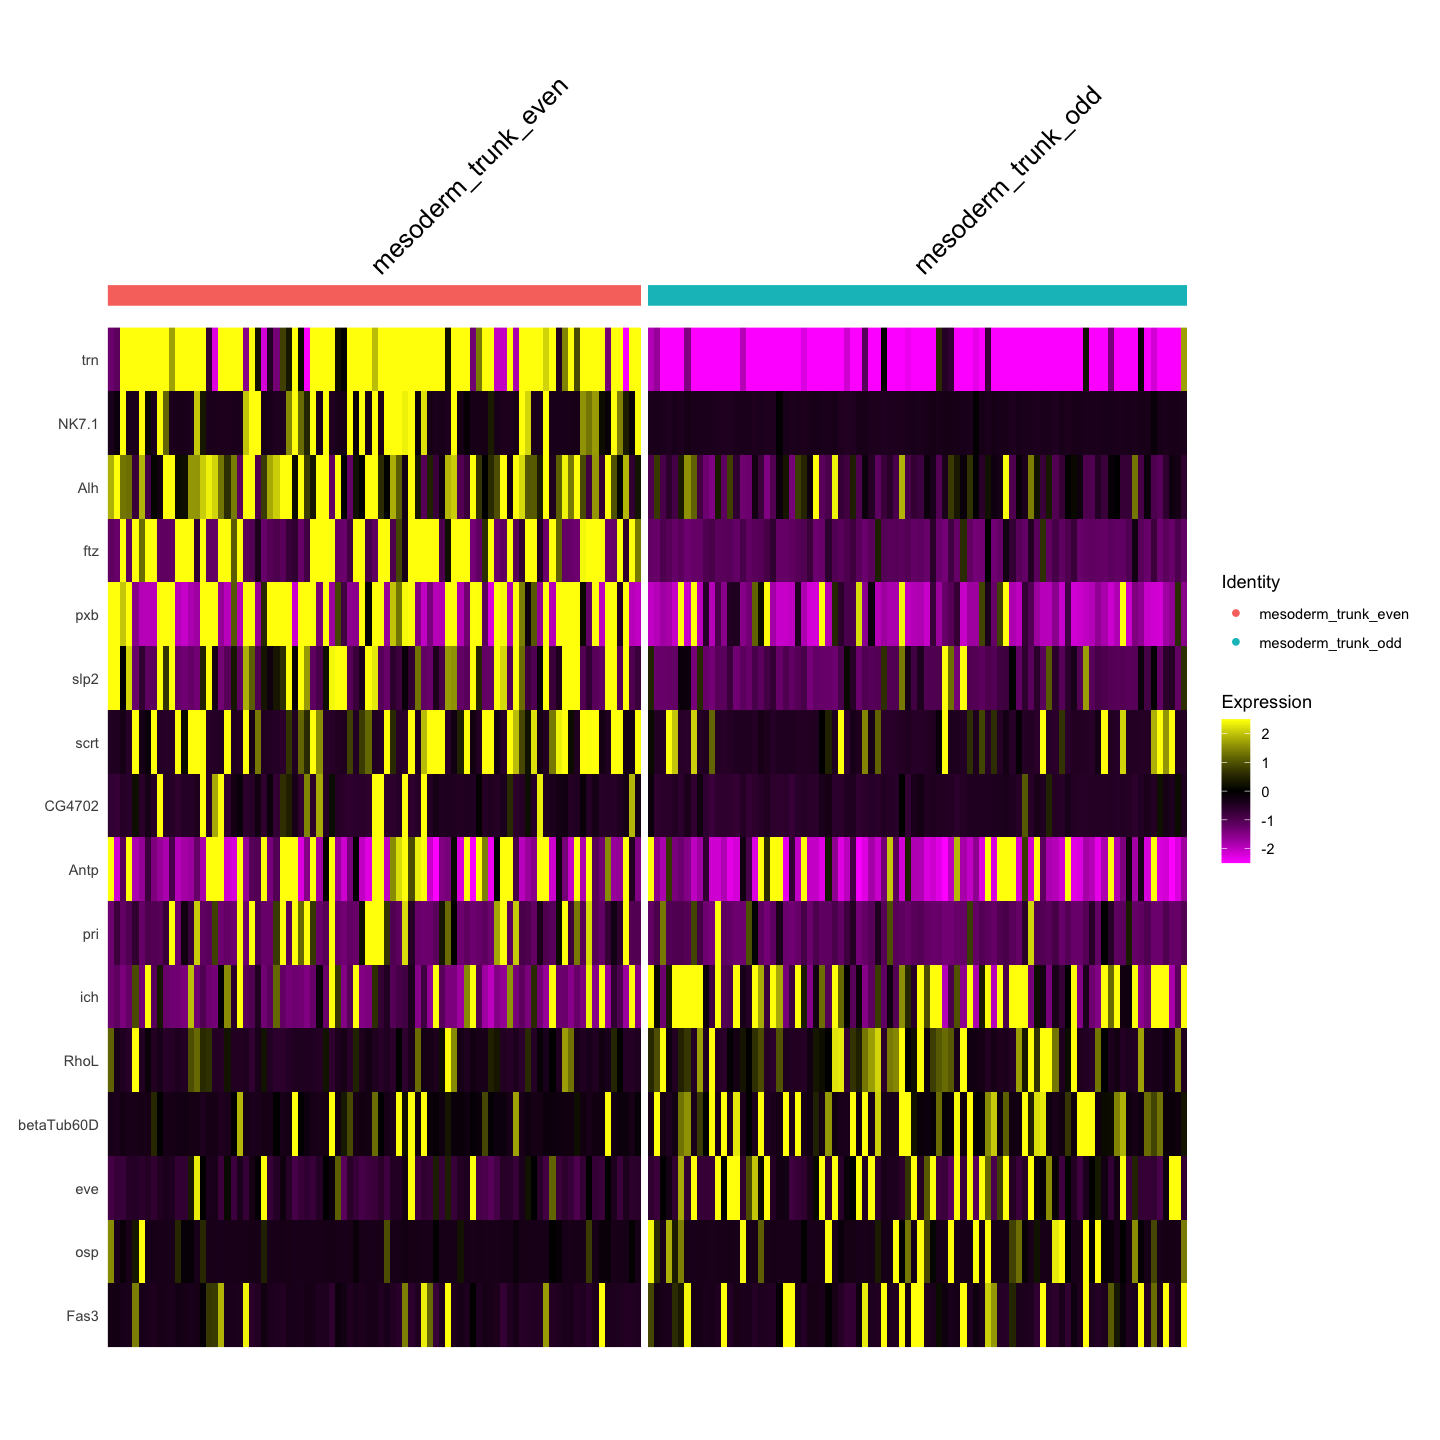

In [21]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.trunk.meso, features = c(all.markers.meso.top10$gene))

Saving 7 x 7 in image



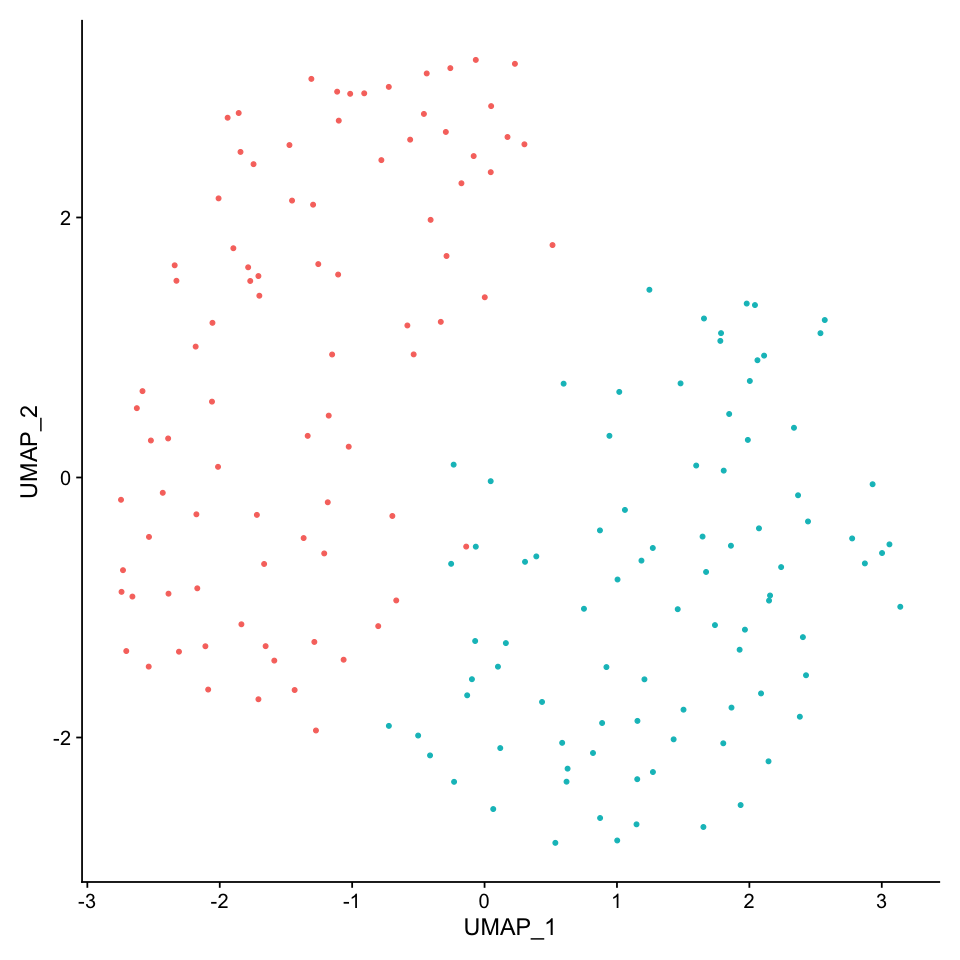

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.trunk.meso, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "././figures/05_mesoderm_subclustering_Set1/trunk_meso_umap1.eps", dpi = 300)

Saving 7 x 7 in image



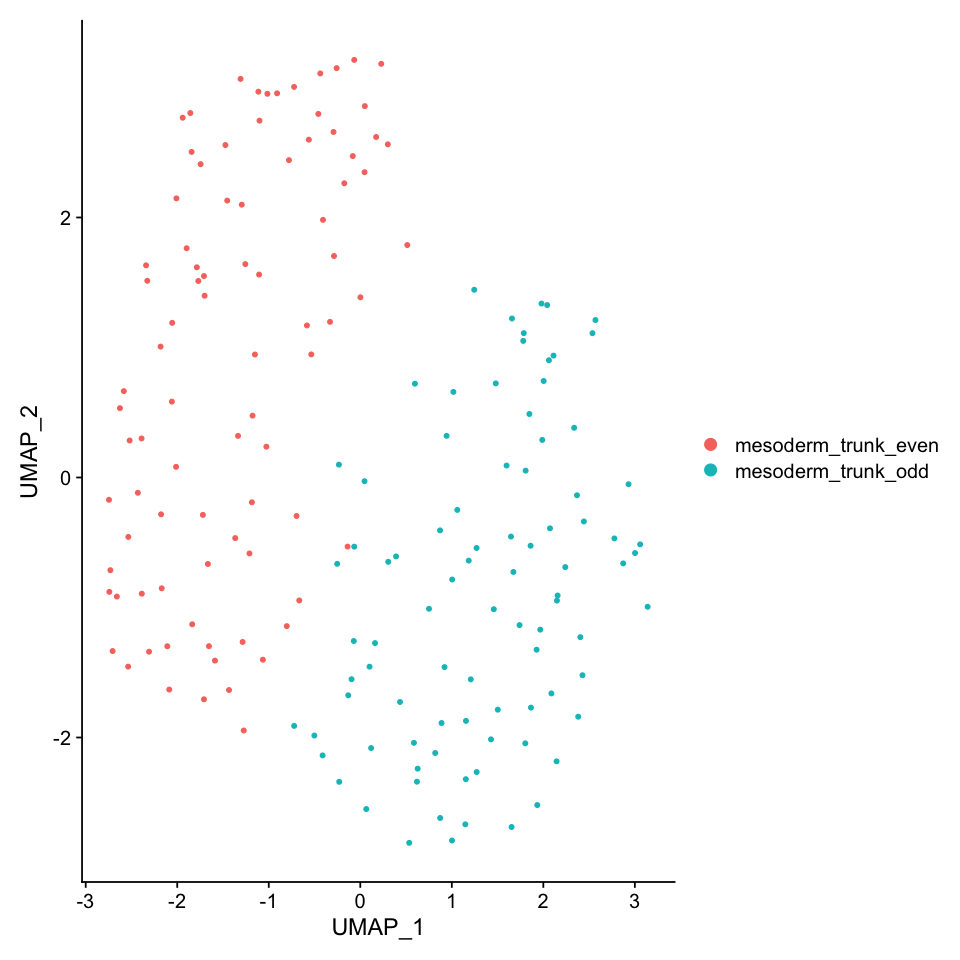

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.trunk.meso, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "././figures/05_mesoderm_subclustering_Set1/trunk_meso_umap2.eps", dpi = 300)

Warning message in DoHeatmap(seu.trunk.meso, features = c(all.markers.meso.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG34001, CG2017, CG9886, CG7120”


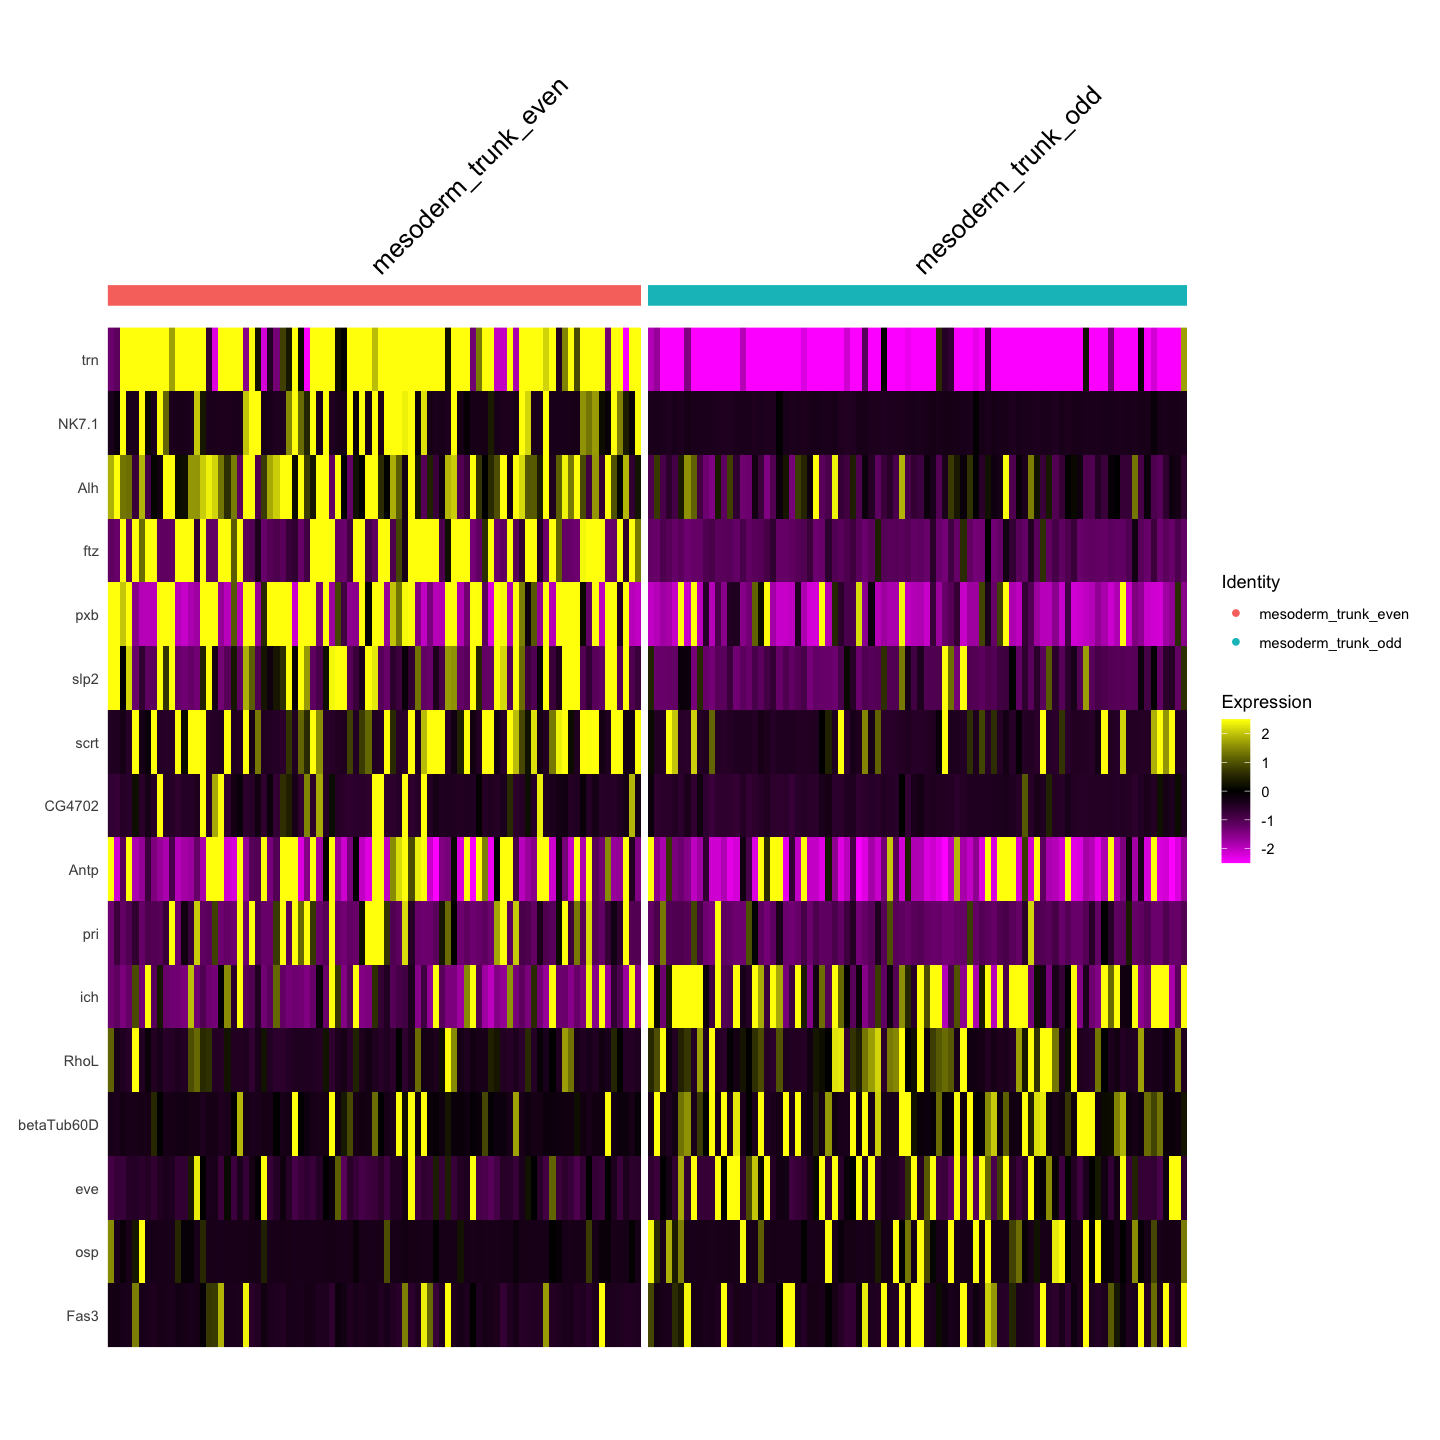

In [24]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.trunk.meso, features = c(all.markers.meso.top10$gene))
fig
ggsave(fig, file = "././figures/05_mesoderm_subclustering_Set1/trunk_meso_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

## Anterior mesoderm (gcm+)
### picking up target clusters

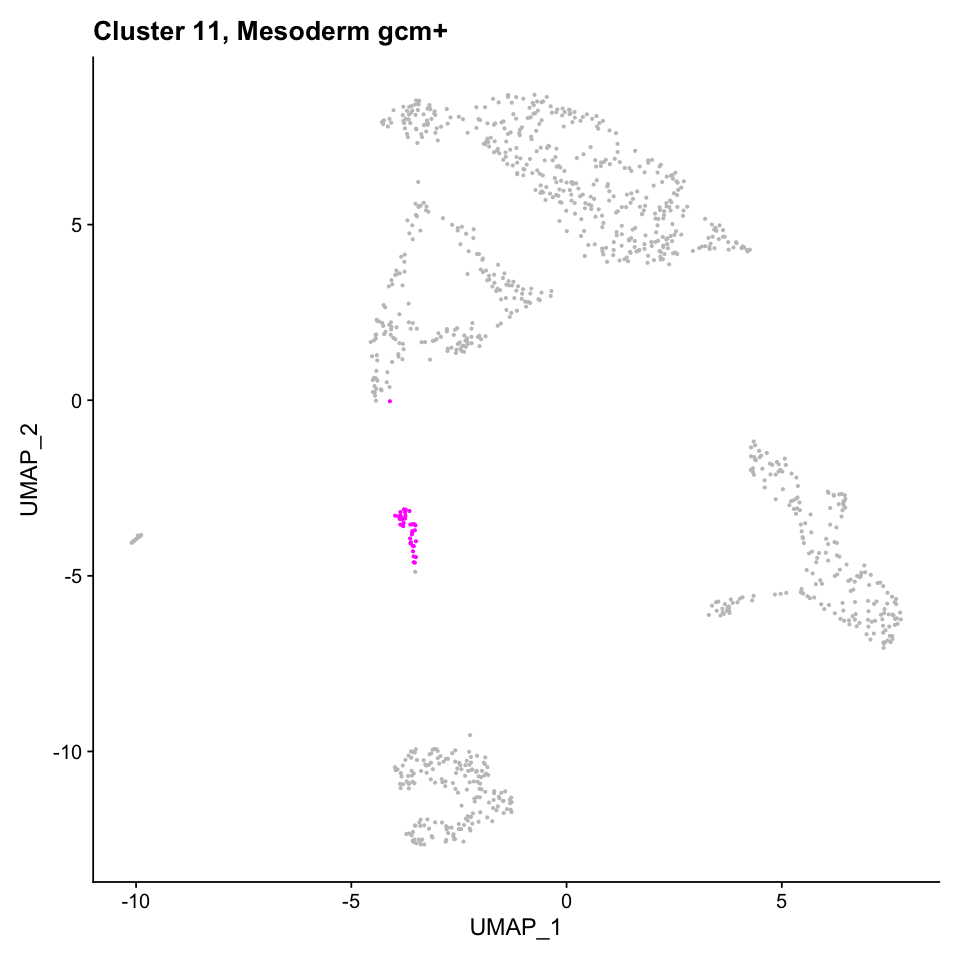

In [25]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(11))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend()+ ggtitle('Cluster 11, Mesoderm gcm+')

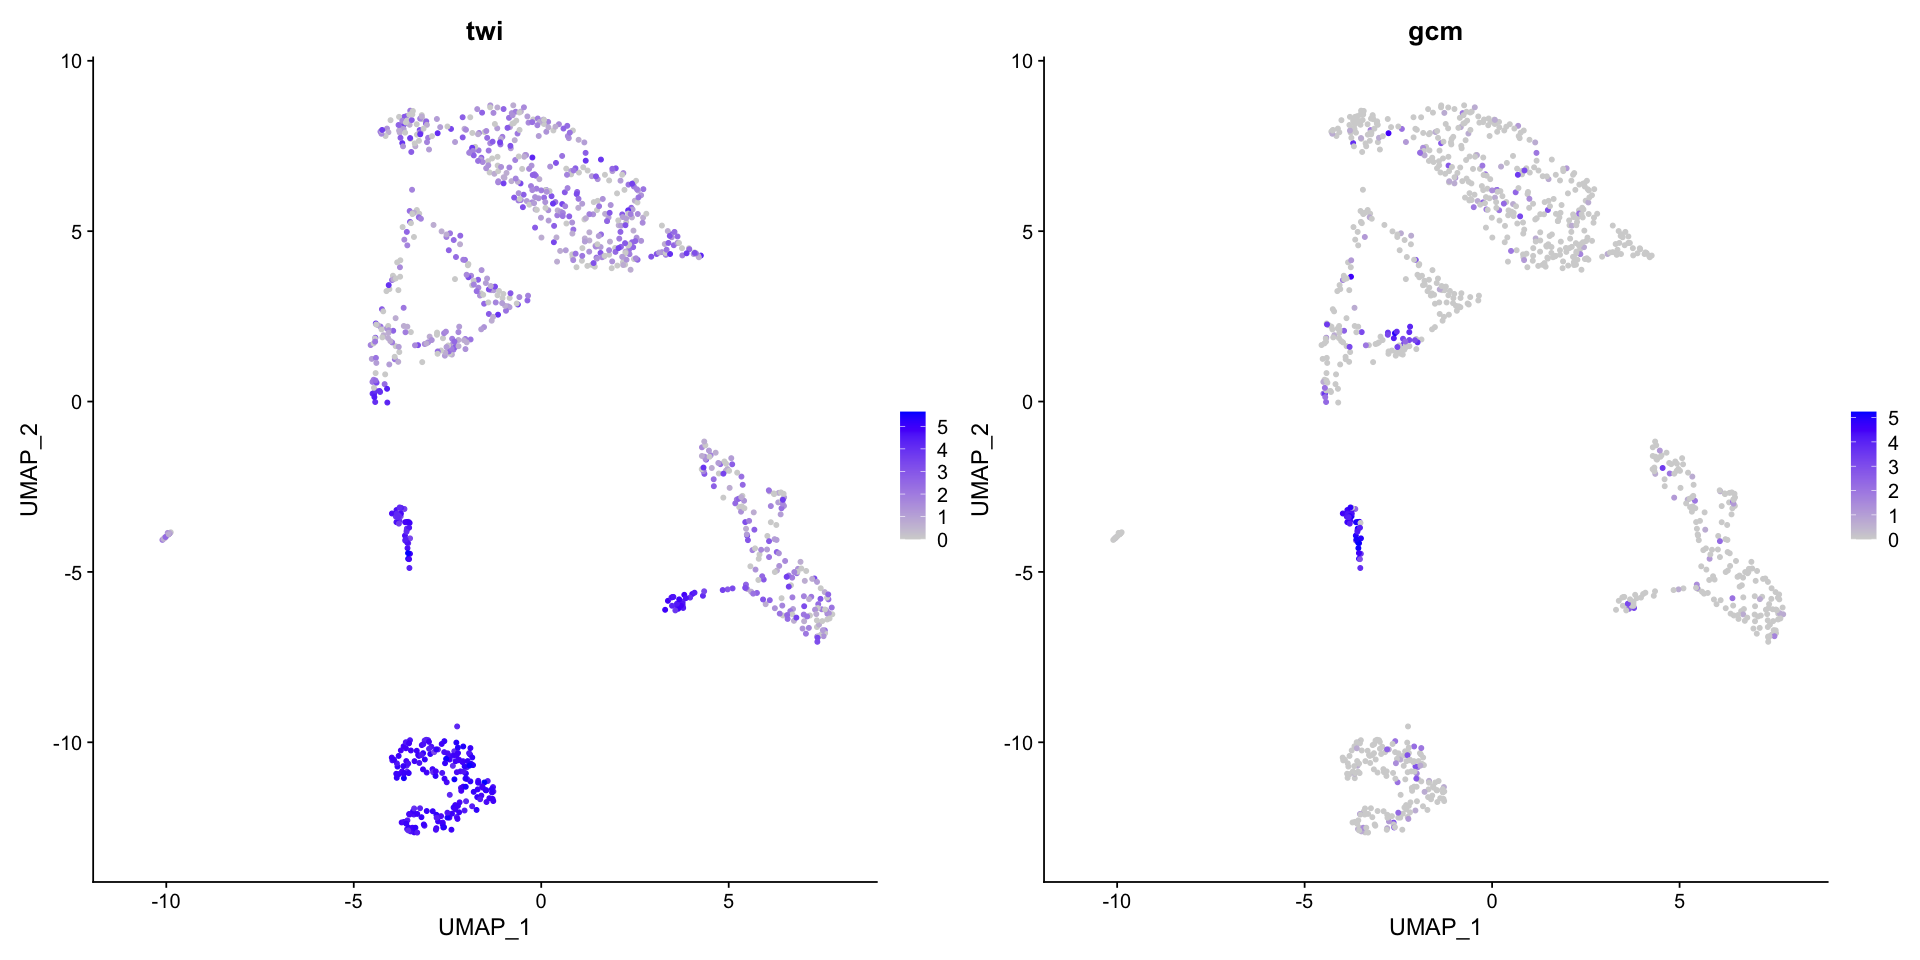

In [26]:
options(repr.plot.width=16, repr.plot.height=8)
FeaturePlot(seu_HQC, reduction = 'umap', features = c('twi', 'gcm'))

In [27]:
seu.meso.gcm <- subset(seu_HQC, ident = 11)
seu.meso.gcm

An object of class Seurat 
28877 features across 36 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

### Clustering
Num of cells < 500. 
Skipping re-normalize

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  Tom, Lac, tsh, Brd, E(spl)malpha-BFM, ImpL2, E(spl)m7-HLH, Ptr, sca, BobA 
	   E(spl)m4-BFM, fend, ths, Antp, ci, grh, hth, mid, Ubx, sdt 
	   18w, Kr, salm, esg, CG34224, CG10035, opa, aop, E(spl)m5-HLH, sog 
Negative:  ham, kni, knrl, shep, gcm, CrebA, Pka-C3, ttk, Ilp4, zfh1 
	   RhoL, hll, srp, CG33099, Mes2, VepD, ltl, Nplp2, CadN, CG7627 
	   twi, CHES-1-like, fok, if, CG10570-CG42502, cv-d, NetB, sna, Ire1, Pvr 
PC_ 2 
Positive:  smt3, Sec61beta, Phf5a, His4r, CG16886, CG41128, RpL38, Nplp2, CG8860, UQCR-11 
	   Rpb11, UQCR-Q, RpL39, maf-S, 14-3-3epsilon, UQCR-14, tsr, RpL41, CG32267, ND-MWFE 
	   NHP2, Sf3b5, mRpS21, Pomp, SNCF, SmF, HmgZ, sun, Npc2g, edl 
Negative:  smal, pigs, slp1, kn, sna, slp2, Fur1, CG10479, pxb, CG17716 
	   Mef2, sprt, vvl, CG14298, lncRNA:CR42862, CG13794, Myc, Msp300, cnn, 28SrRN

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 36
Number of edges: 630

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2000
Number of communities: 1
Elapsed time: 0 seconds


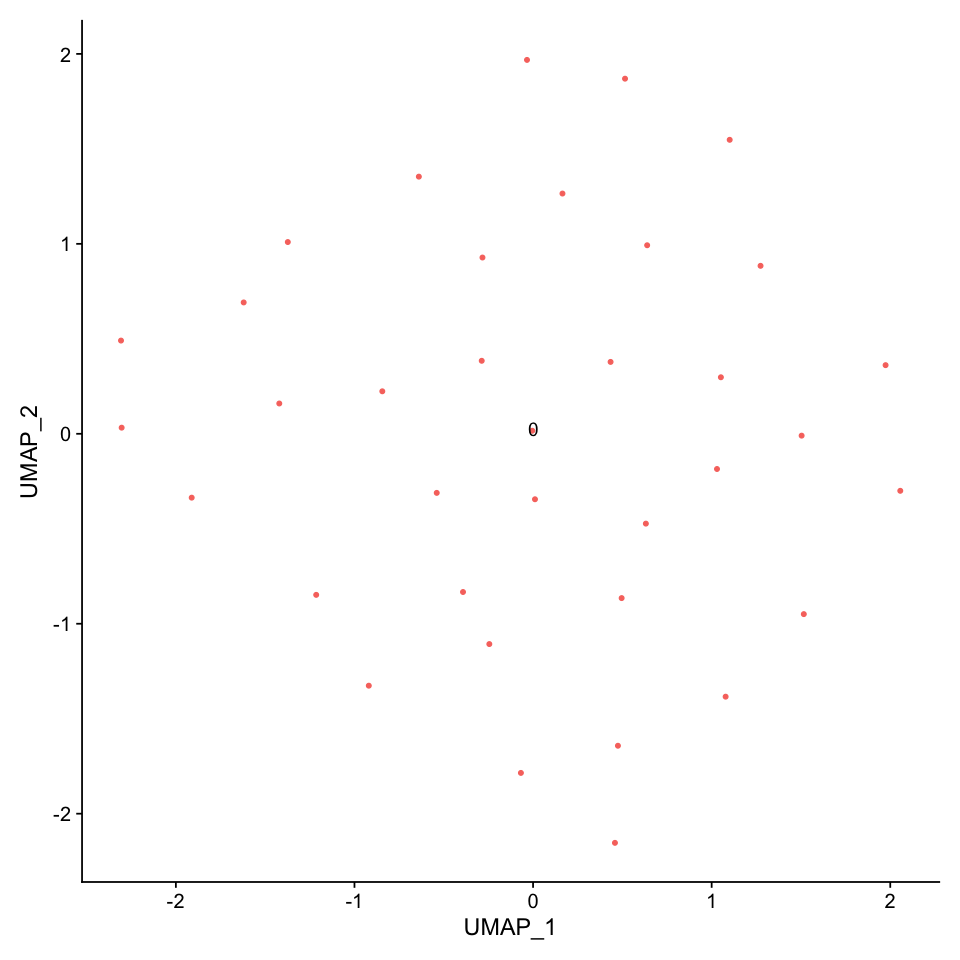

In [28]:
options(repr.plot.width=8, repr.plot.height=8)
seu.meso.gcm <- RunPCA(seu.meso.gcm, npcs = 30)
seu.meso.gcm <- RunUMAP(seu.meso.gcm, dims = 1:30)
seu.meso.gcm <- FindNeighbors(seu.meso.gcm, dims = 1:30)
seu.meso.gcm <- FindClusters(seu.meso.gcm)
DimPlot(seu.meso.gcm, reduction = 'umap', label = TRUE) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 36
Number of edges: 630

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.0074
Number of communities: 2
Elapsed time: 0 seconds


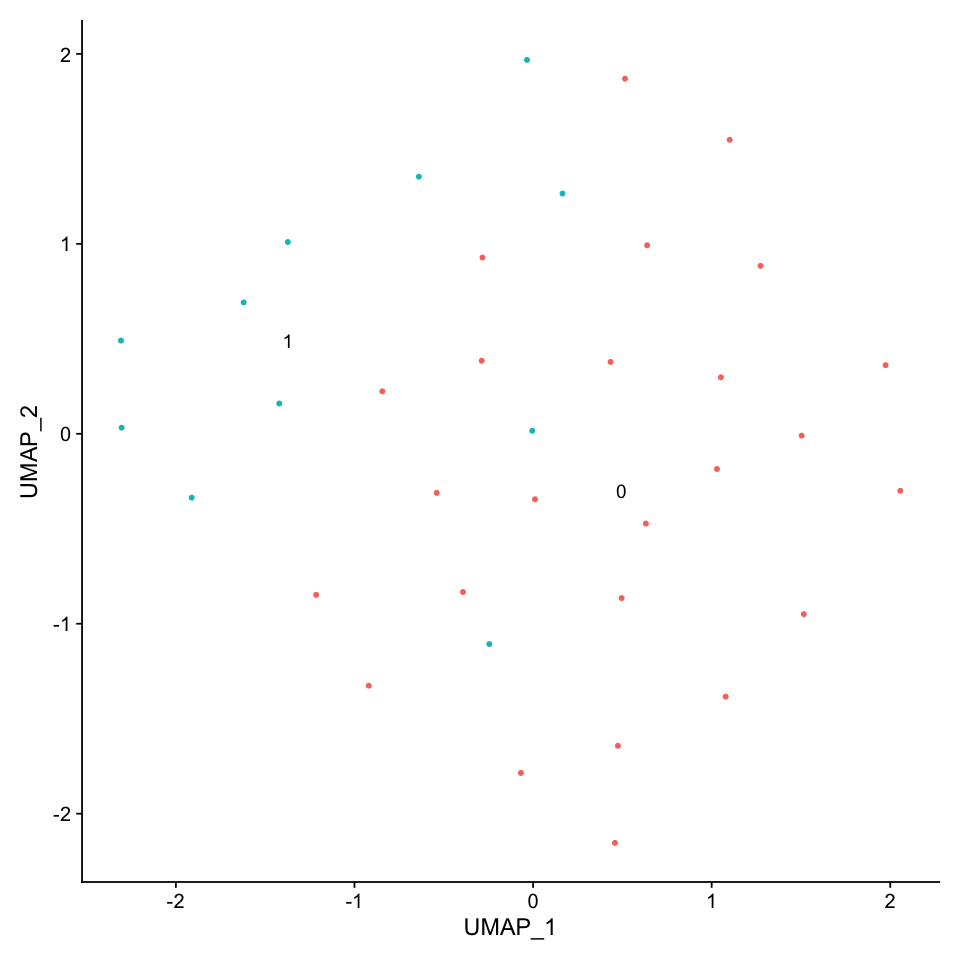

In [29]:
seu.meso.gcm <- FindClusters(seu.meso.gcm, resolution = 1.0)
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.meso.gcm, reduction = 'umap', label = TRUE) + NoLegend()

In [30]:
all.markers.meso <- FindAllMarkers(object = seu.meso.gcm, only.pos = TRUE)
nrow(all.markers.meso)
all.markers.meso.top10 <- all.markers.meso %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.meso.top10)

Calculating cluster 0

Calculating cluster 1



[1] 220

[1] 20

Warning message in DoHeatmap(seu.meso.gcm, features = c(all.markers.meso.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Gnpnat, CG17032, AlkB, CG17168, eIF2Balpha, CG17249, l(2)k09848, RhoU, mRpL51”


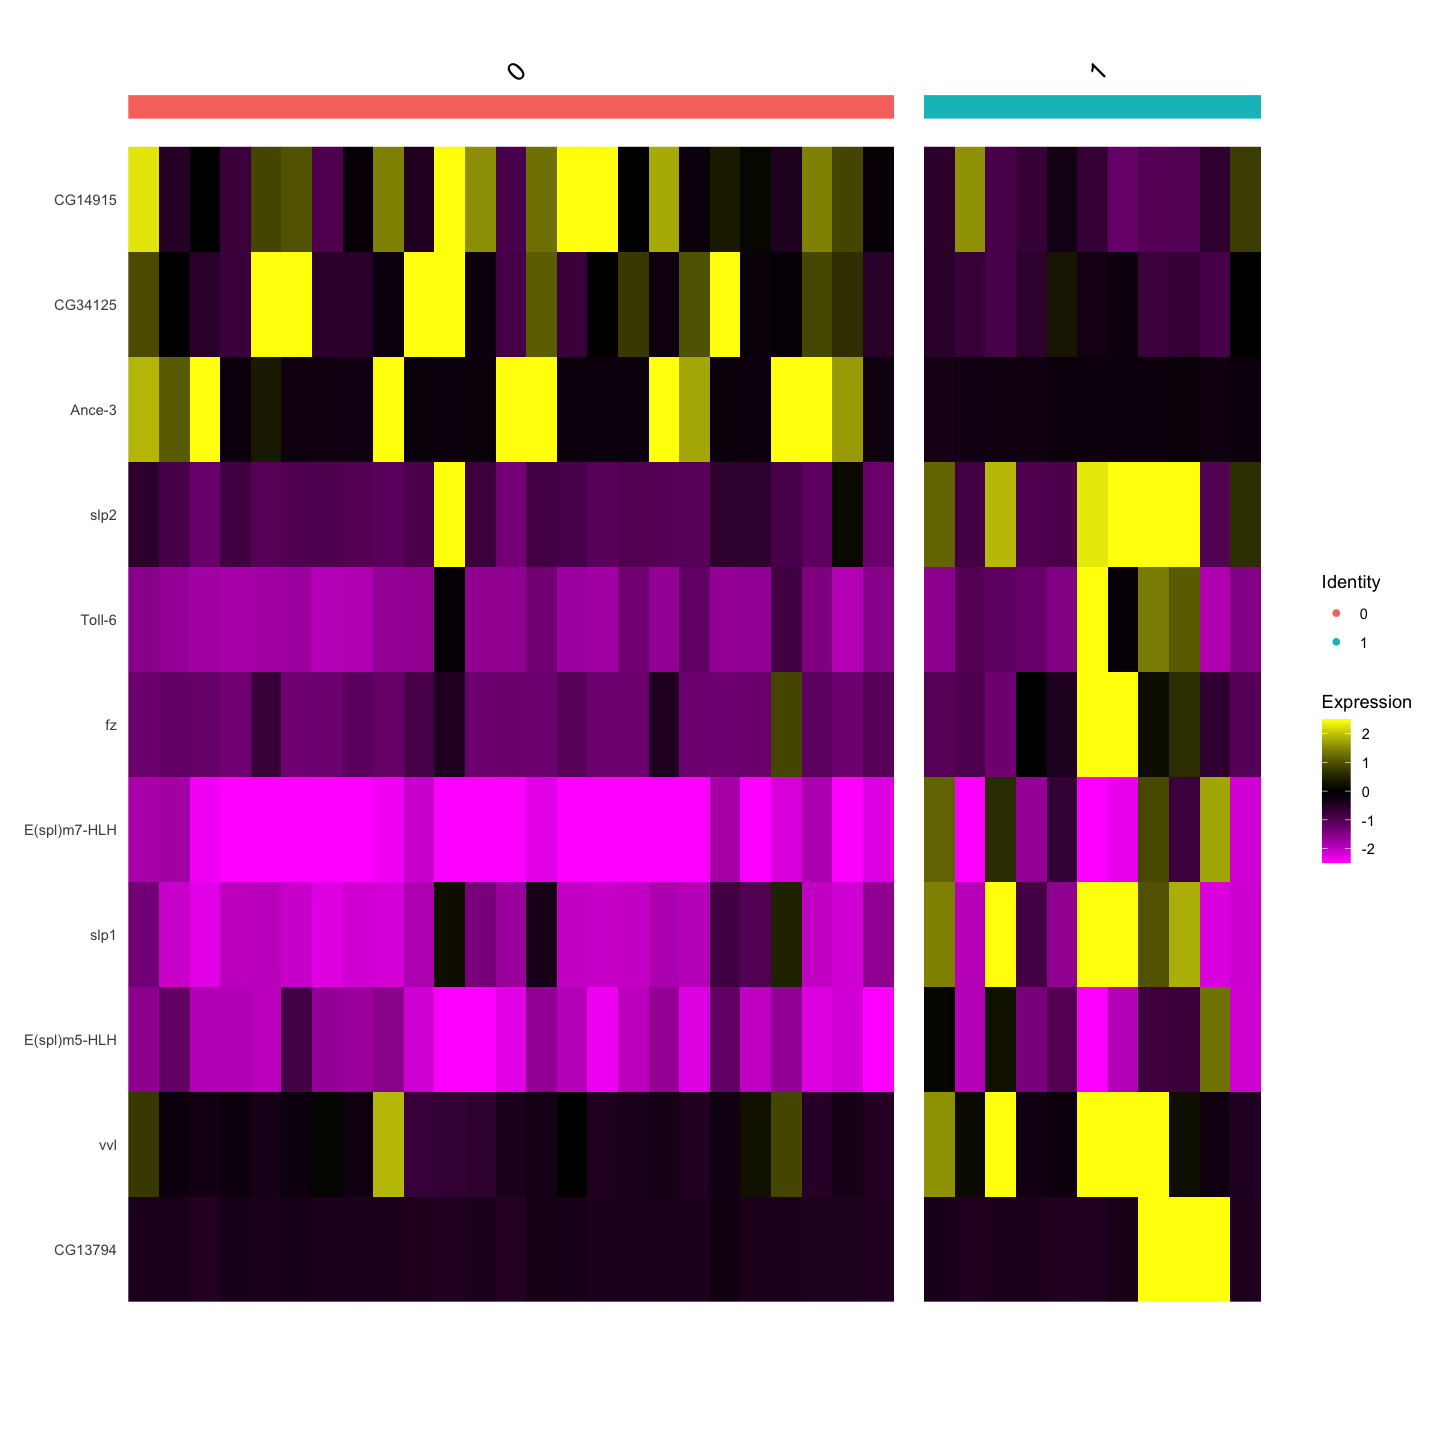

In [31]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.meso.gcm, features = c(all.markers.meso.top10$gene))

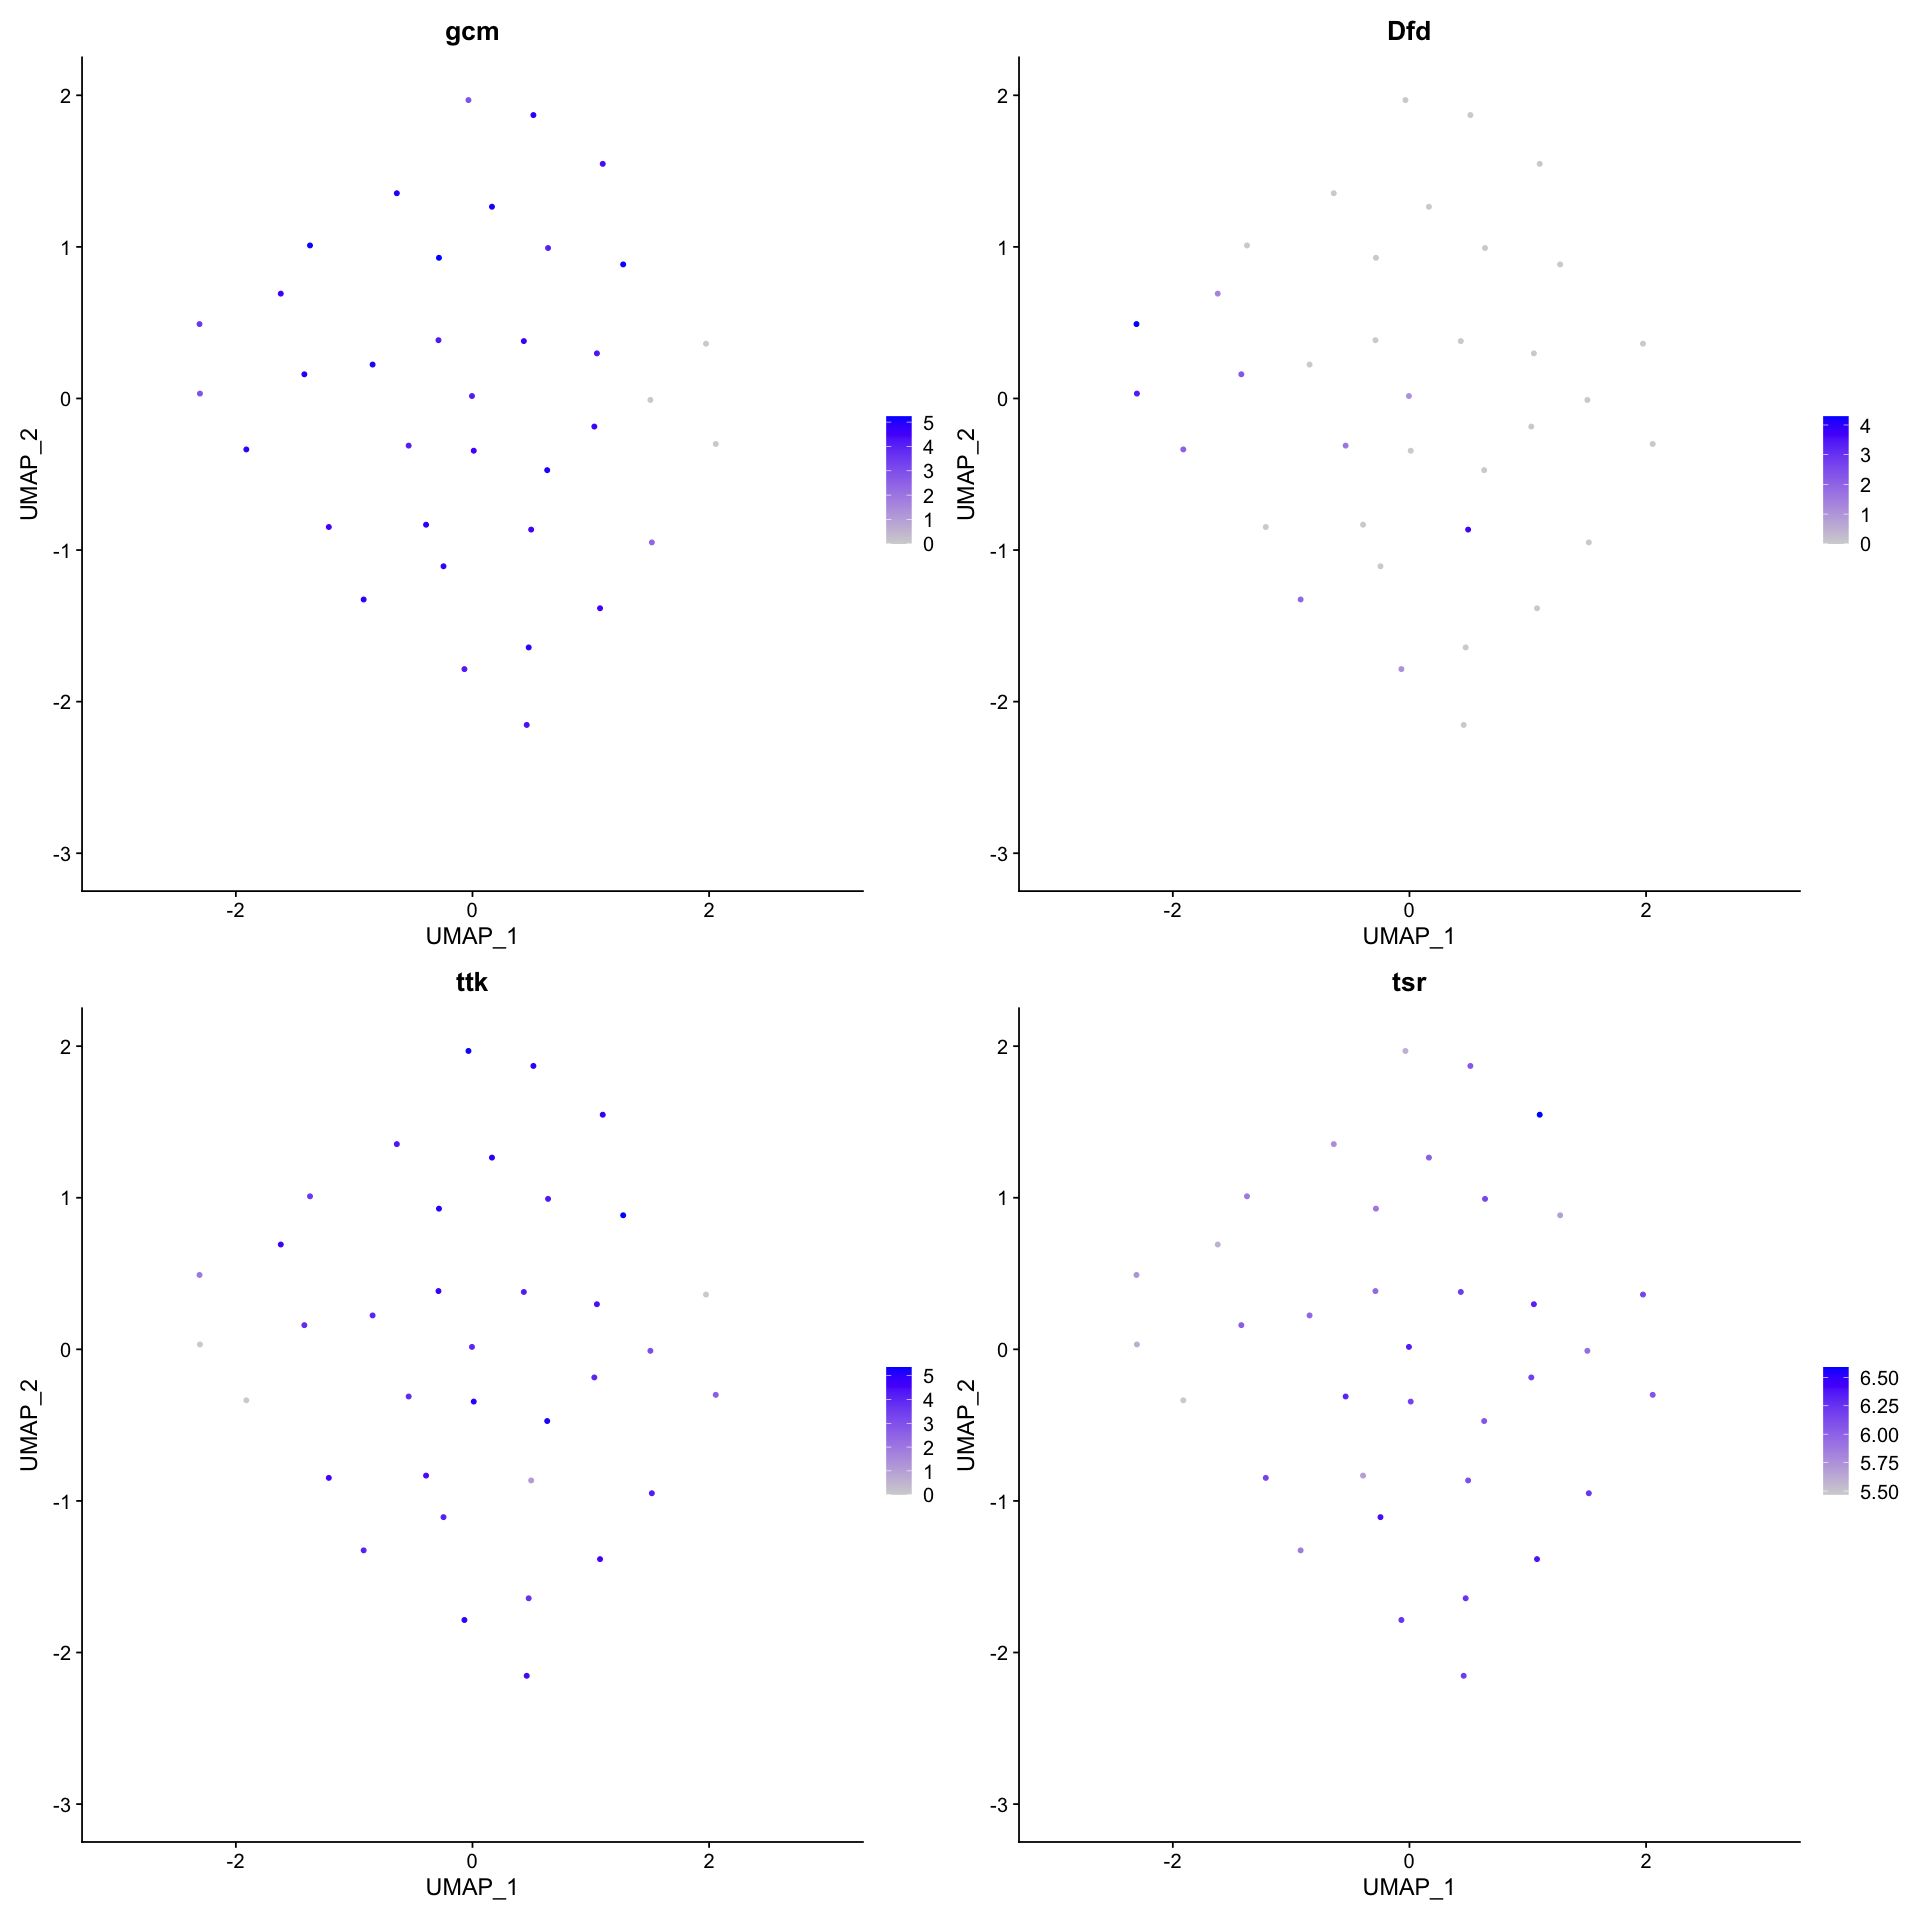

In [32]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.meso.gcm, reduction = 'umap', features = c('gcm', 'Dfd', 'ttk','tsr'))

Whether these clusters correspond spatial region is not clear

In [33]:
seu.meso.gcm$manual_ID <- 'mesoderm_gcm'

## Posterior mesoderm
### picking up target clusters

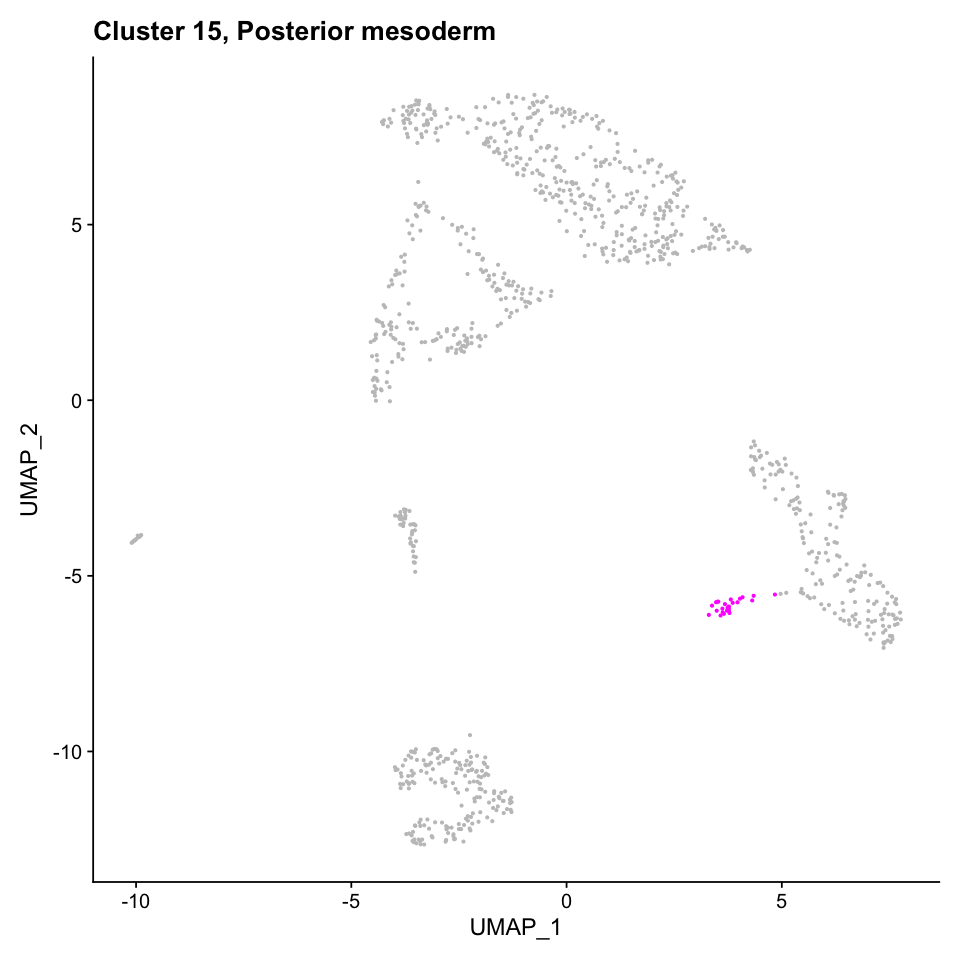

In [34]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(15))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend()+ ggtitle('Cluster 15, Posterior mesoderm')

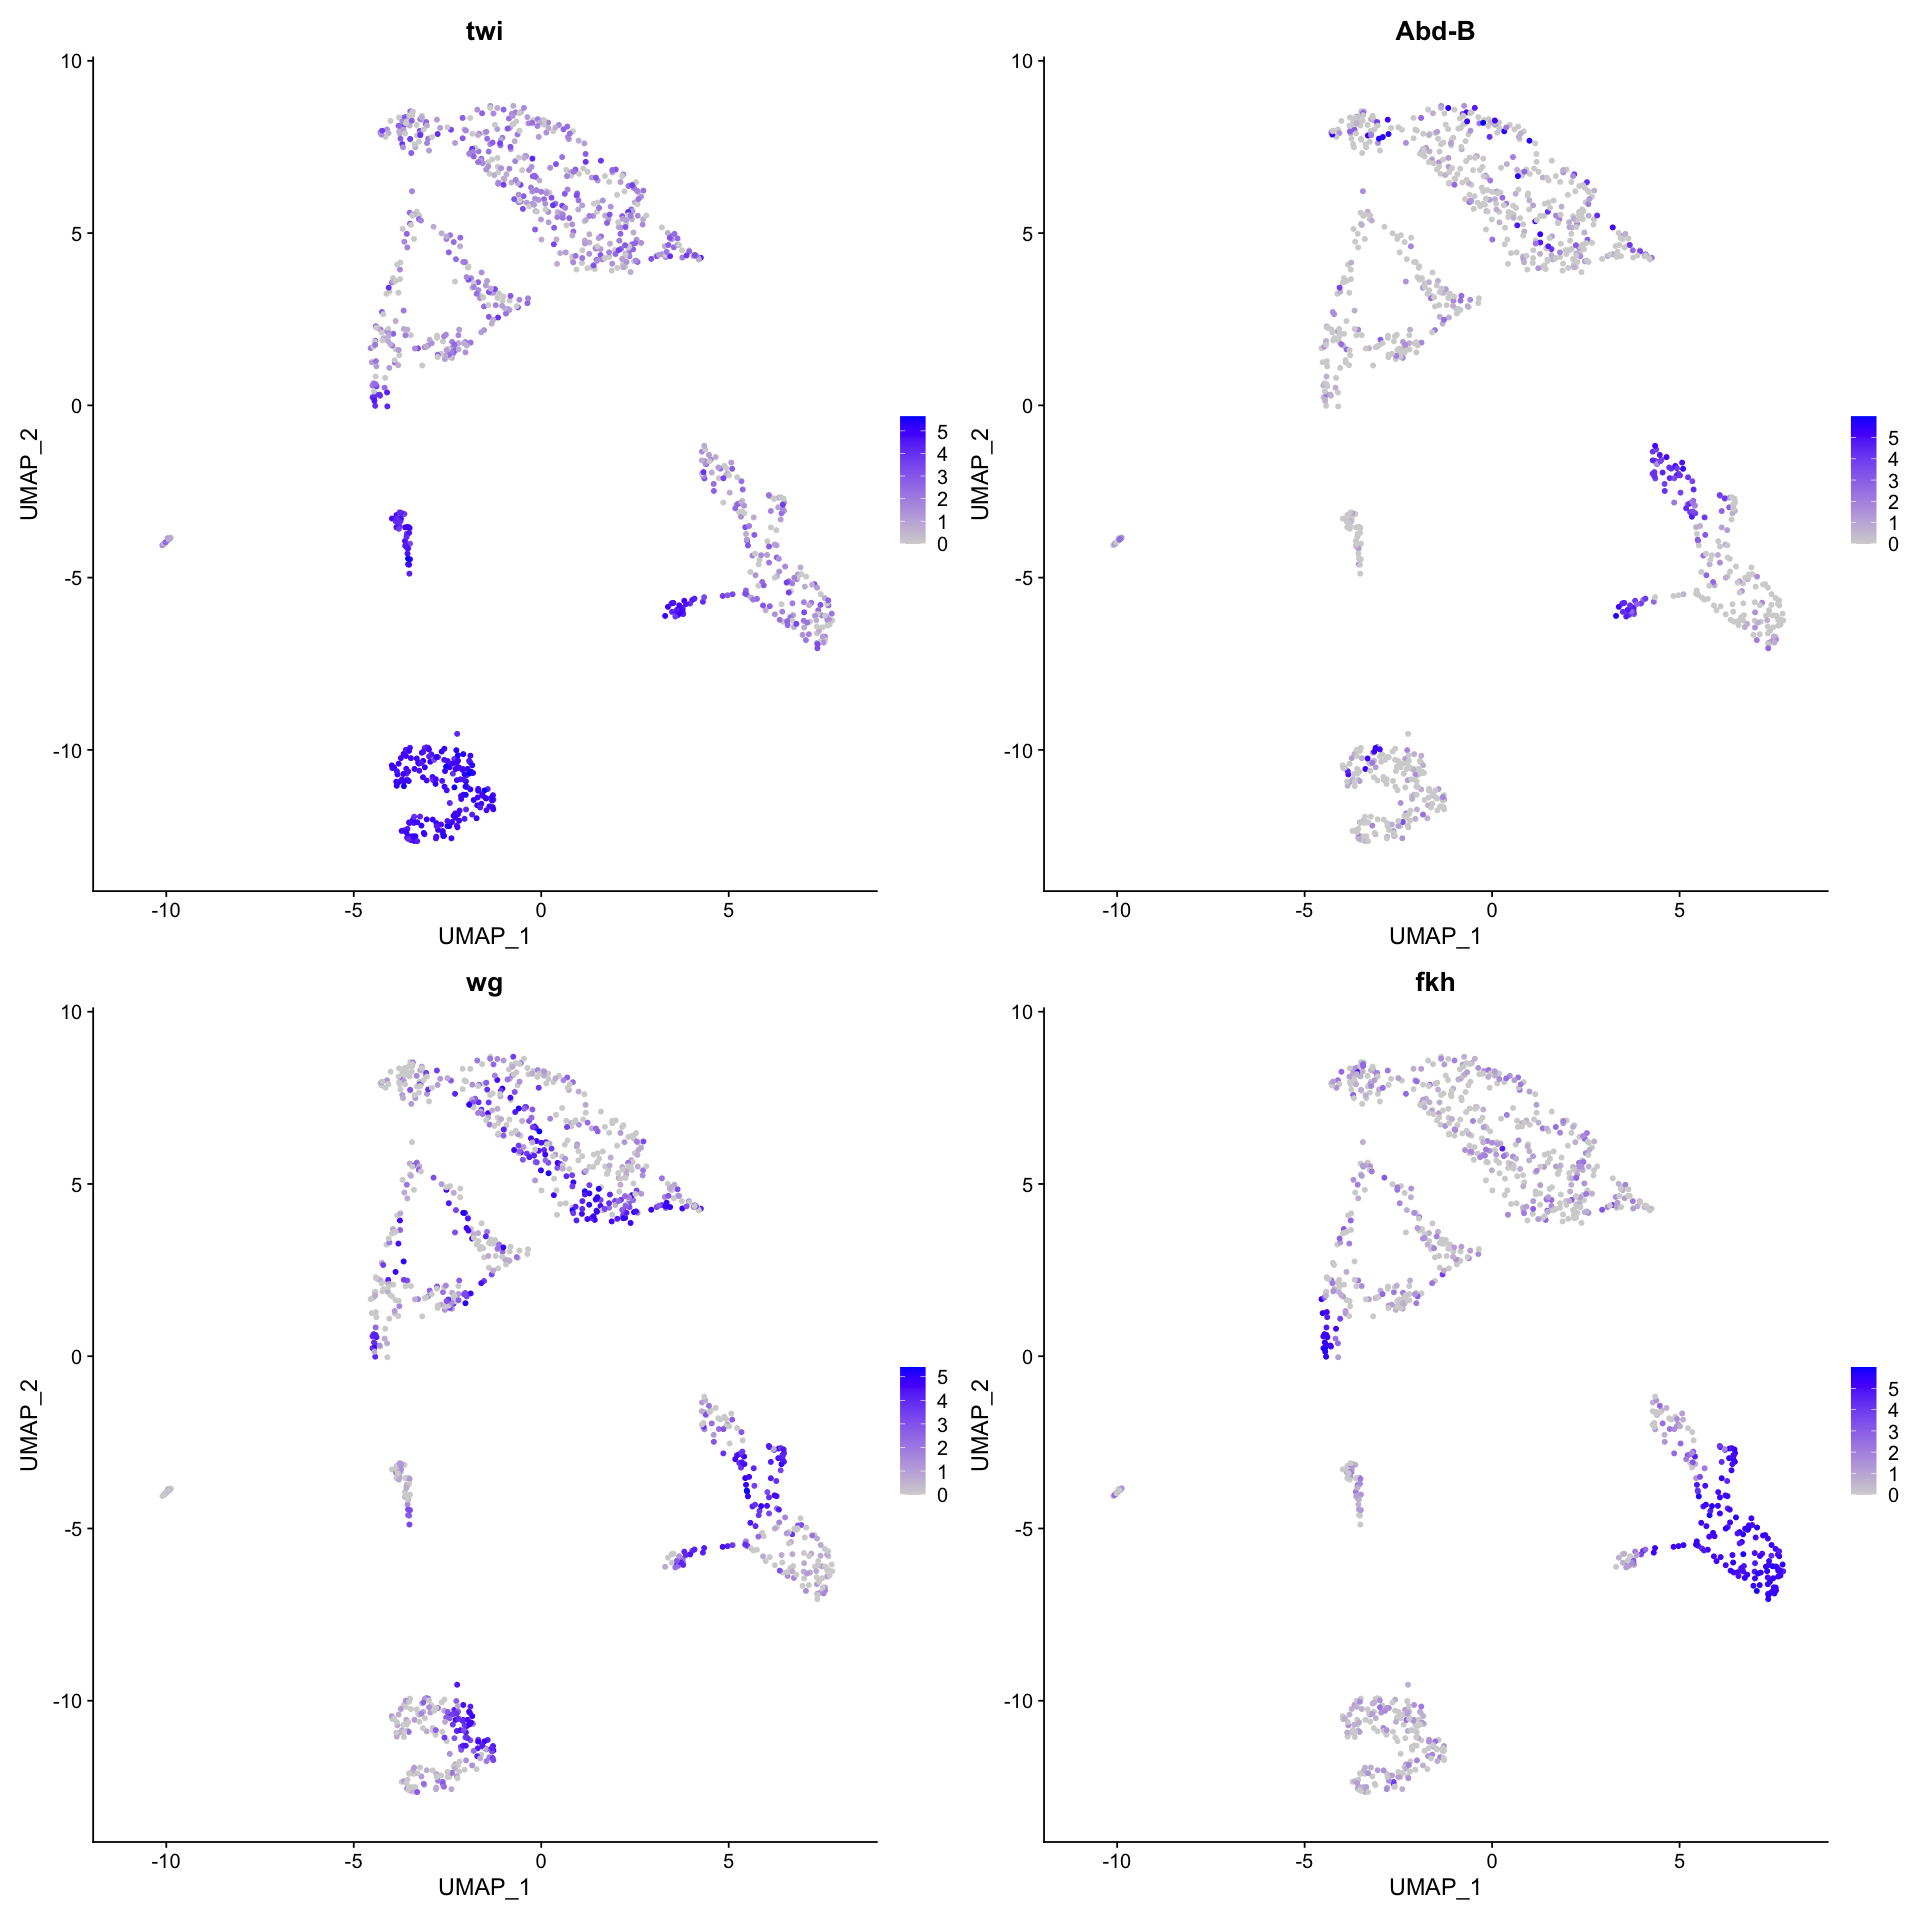

In [35]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, reduction = 'umap', features = c('twi', 'Abd-B', 'wg','fkh'))

In [36]:
seu.meso.post <- subset(seu_HQC, ident = 15)
seu.meso.post

An object of class Seurat 
28877 features across 25 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

### Clustering
Num of cells < 500. 
Skipping re-normalize

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”
PC_ 1 
Positive:  hth, Tom, Lac, Brd, tsh, SoxN, E(spl)malpha-BFM, BobA, ImpL2, Ptr 
	   CG15628, grh, CG5059, E(spl)m7-HLH, E(spl)m4-BFM, ths, sdt, sog, blot, Ocho 
	   Ubx, Kr, ci, aop, ASPP, slp1, Dl, CG34224, CG15480, E(spl)mgamma-HLH 
Negative:  zfh1, salm, ken, sna, Abd-B, CG43355-sala, disco, Blimp-1, twi, CadN 
	   byn, bab2, rib, Mef2, Ama, stumps, chrb, VepD, Ndae1, ftz 
	   CG7029, cad, hb, D, h, retn, Nplp2, CG42762, edl, trn 
PC_ 2 
Positive:  ftz, ich, trn, Blimp-1, NetA, if, hb, ken, Abd-B, Mef2 
	   htl, D, CadN, Oatp74D, RluA-1, prd, dan, opa, hh, pigs 
	   en, CG45263, Cyp310a1, CG12448, E2f1, FoxL1, tkv, tin, odd, danr 
Negative:  wg, HLH54F, fkh, Gmap, Notum, byn, rib, CG30015,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25
Number of edges: 300

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2000
Number of communities: 1
Elapsed time: 0 seconds


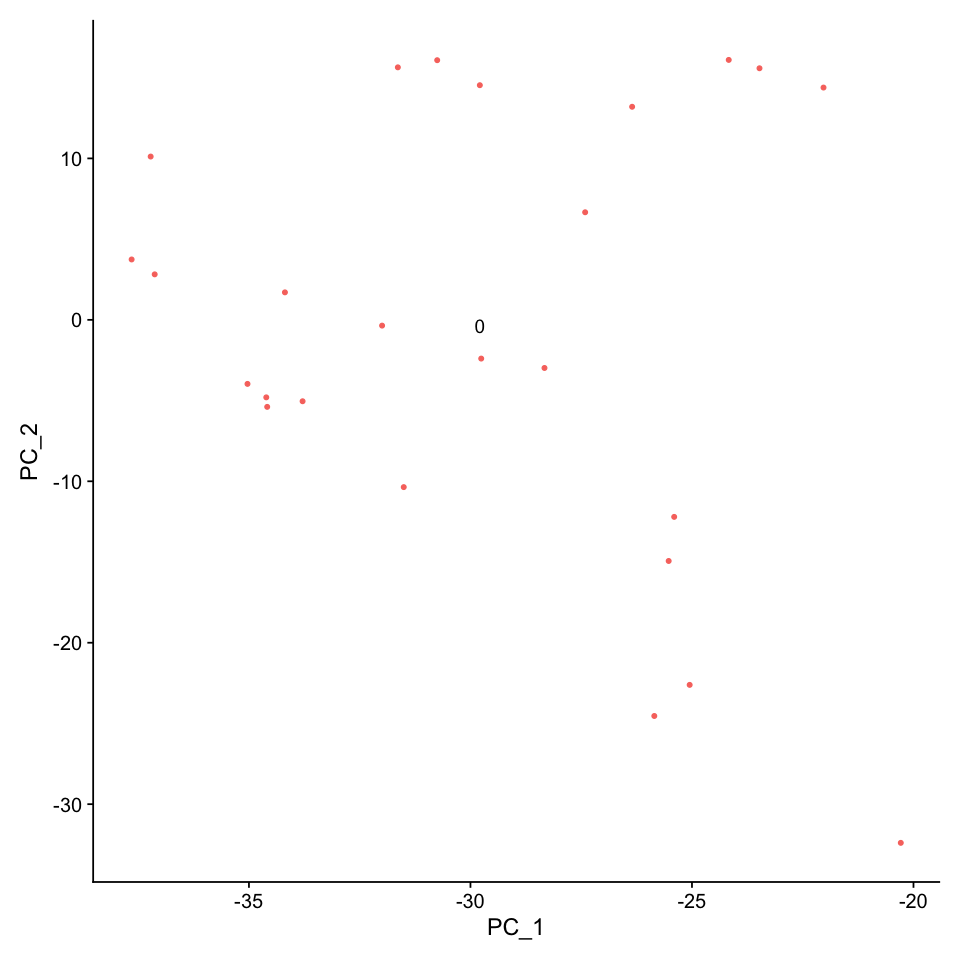

In [37]:
options(repr.plot.width=8, repr.plot.height=8)
seu.meso.post <- RunPCA(seu.meso.post,npcs = 24)
# seu.meso.post <- RunUMAP(seu.meso.post, dims = 1:24)
seu.meso.post <- FindNeighbors(seu.meso.post, dims = 1:24)
seu.meso.post <- FindClusters(seu.meso.post)
DimPlot(seu.meso.post, reduction = 'pca', label = TRUE) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25
Number of edges: 300

Running Louvain algorithm...
Maximum modularity in 10 random starts: -0.0475
Number of communities: 22
Elapsed time: 0 seconds


19 singletons identified. 3 final clusters.



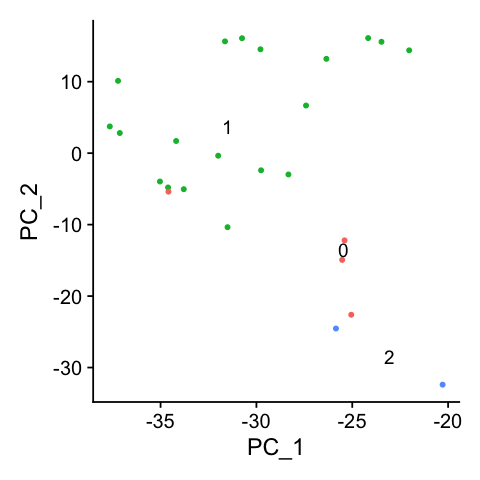

In [38]:
seu.meso.post <- FindClusters(seu.meso.post, resolution = 1.2)
options(repr.plot.width=4, repr.plot.height=4)
DimPlot(seu.meso.post, reduction = 'pca', label = T) + NoLegend() 

In [39]:
all.markers.meso <- FindAllMarkers(object = seu.meso.post, only.pos = TRUE)
nrow(all.markers.meso)
all.markers.meso.top10 <- all.markers.meso %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.meso.top10)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



[1] 80

[1] 20

Warning message in DoHeatmap(seu.meso.post, features = c("tsr", "fkh", all.markers.meso.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG5004, l(2)k09022, CG17977, CG14894, CR18228, CG7646, tefu, CG34229”


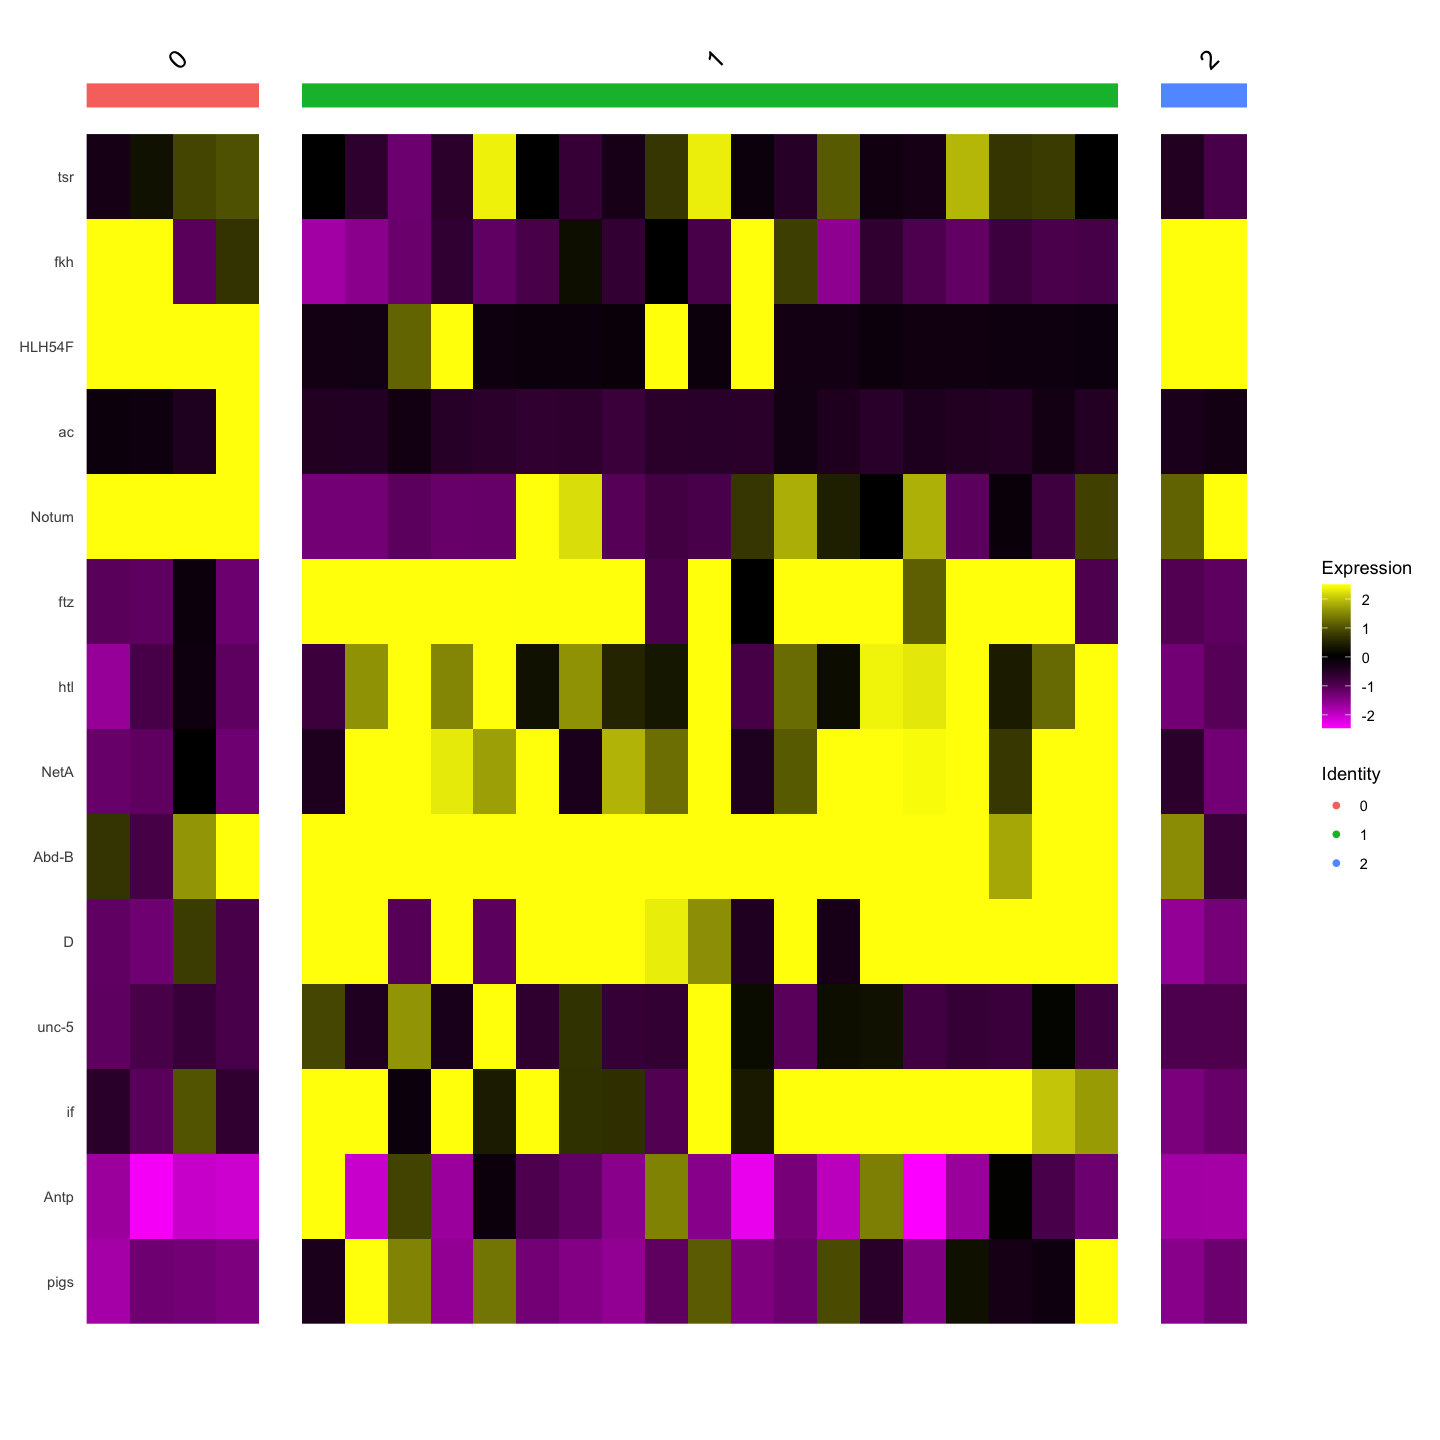

In [40]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.meso.post, features = c('tsr','fkh',all.markers.meso.top10$gene))

### Add annotation

manual_ID
batch1_col2CTCACA  2        
batch1_col6ATGACG  1        
batch1_col8TCAGAC  0        
batch1_col10TAGTCG 1        
batch1_col13TGTACG 1        
batch1_col20TACTGC 1

manual_ID               
batch1_col2CTCACA  mesoderm_caudal_visceral
batch1_col6ATGACG  mesoderm_PS14           
batch1_col8TCAGAC  mesoderm_caudal_visceral
batch1_col10TAGTCG mesoderm_PS14           
batch1_col13TGTACG mesoderm_PS14           
batch1_col20TACTGC mesoderm_PS14

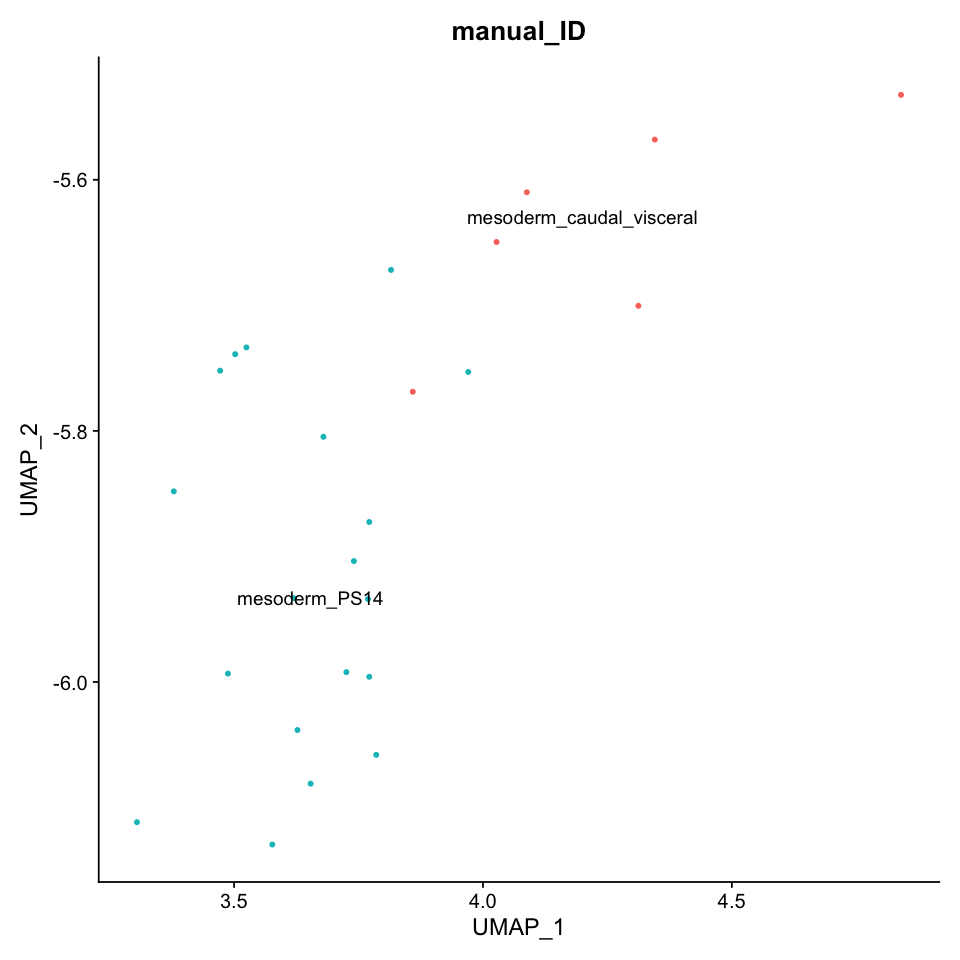

In [41]:
manual_id <- as.data.frame(seu.meso.post$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)
manual_id$manual_ID <- dplyr::recode(manual_id$manual_ID, 
                                "0" = "mesoderm_caudal_visceral", #fkh+, HLH54F+
                                "2" = "mesoderm_caudal_visceral",  #fkh+, HLH54F+
                                "1" = "mesoderm_PS14" #Abd-B+
                                )

head(manual_id)

seu.meso.post$manual_ID <- manual_id
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.meso.post, reduction = 'umap', label = TRUE, group.by = 'manual_ID') + NoLegend()

Saving 7 x 7 in image



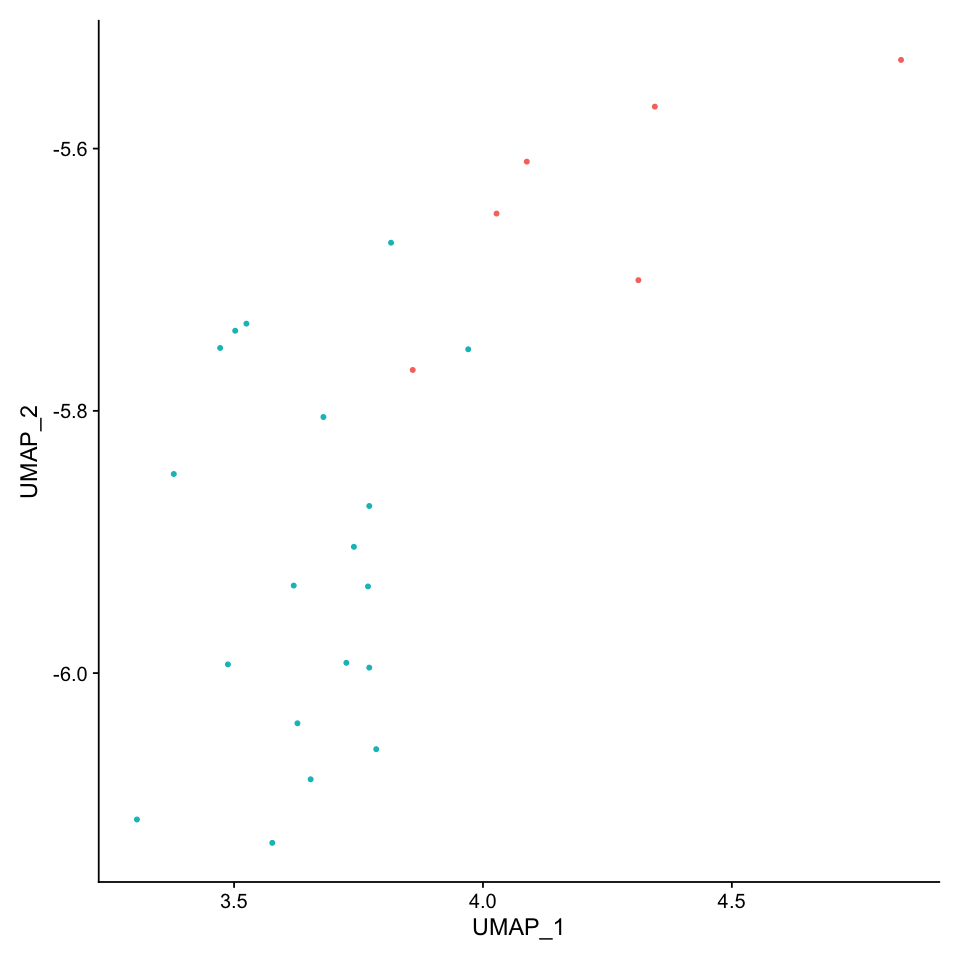

In [42]:
Idents(seu.meso.post) <- 'manual_ID'
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.meso.post, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "././figures/05_mesoderm_subclustering_Set1/post_meso_umap1.eps", dpi = 300)

Saving 7 x 7 in image



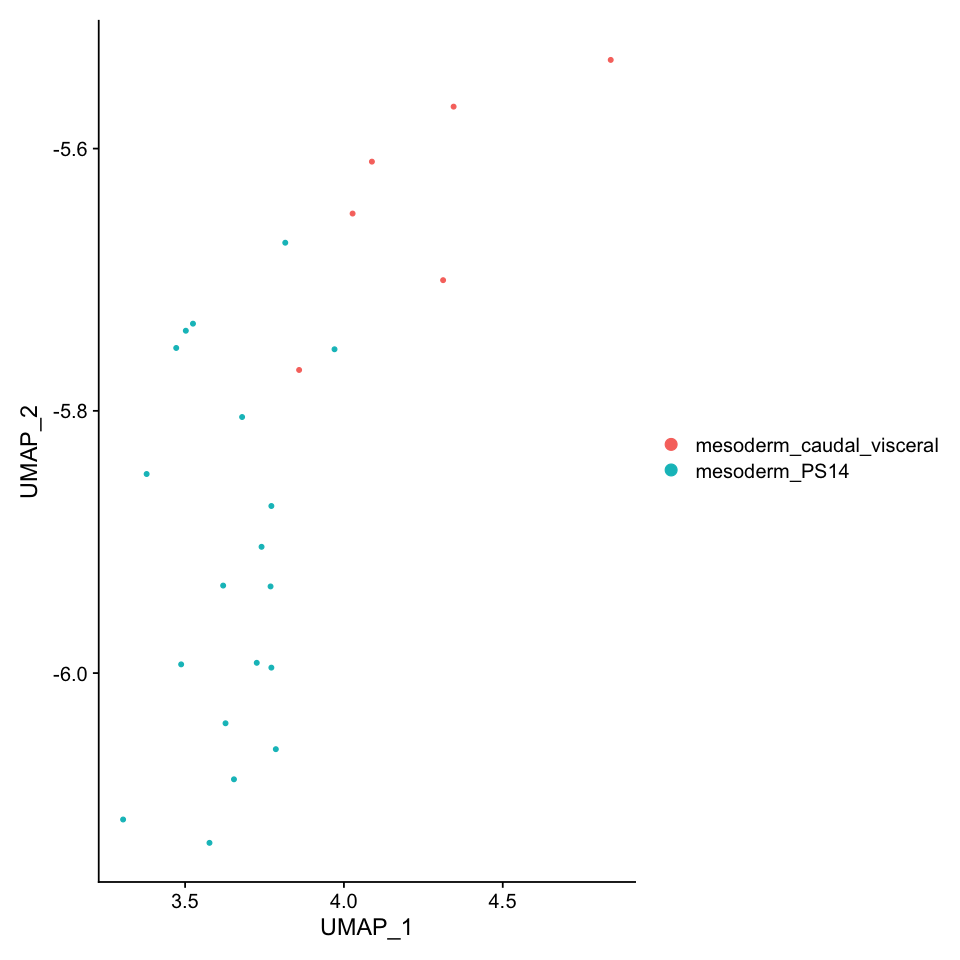

In [43]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.meso.post, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "././figures/05_mesoderm_subclustering_Set1/post_meso_umap2.eps", dpi = 300)

Warning message in DoHeatmap(seu.meso.post, features = c(all.markers.meso.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG5004, l(2)k09022, CG17977, CG14894, CR18228, CG7646, tefu, CG34229”


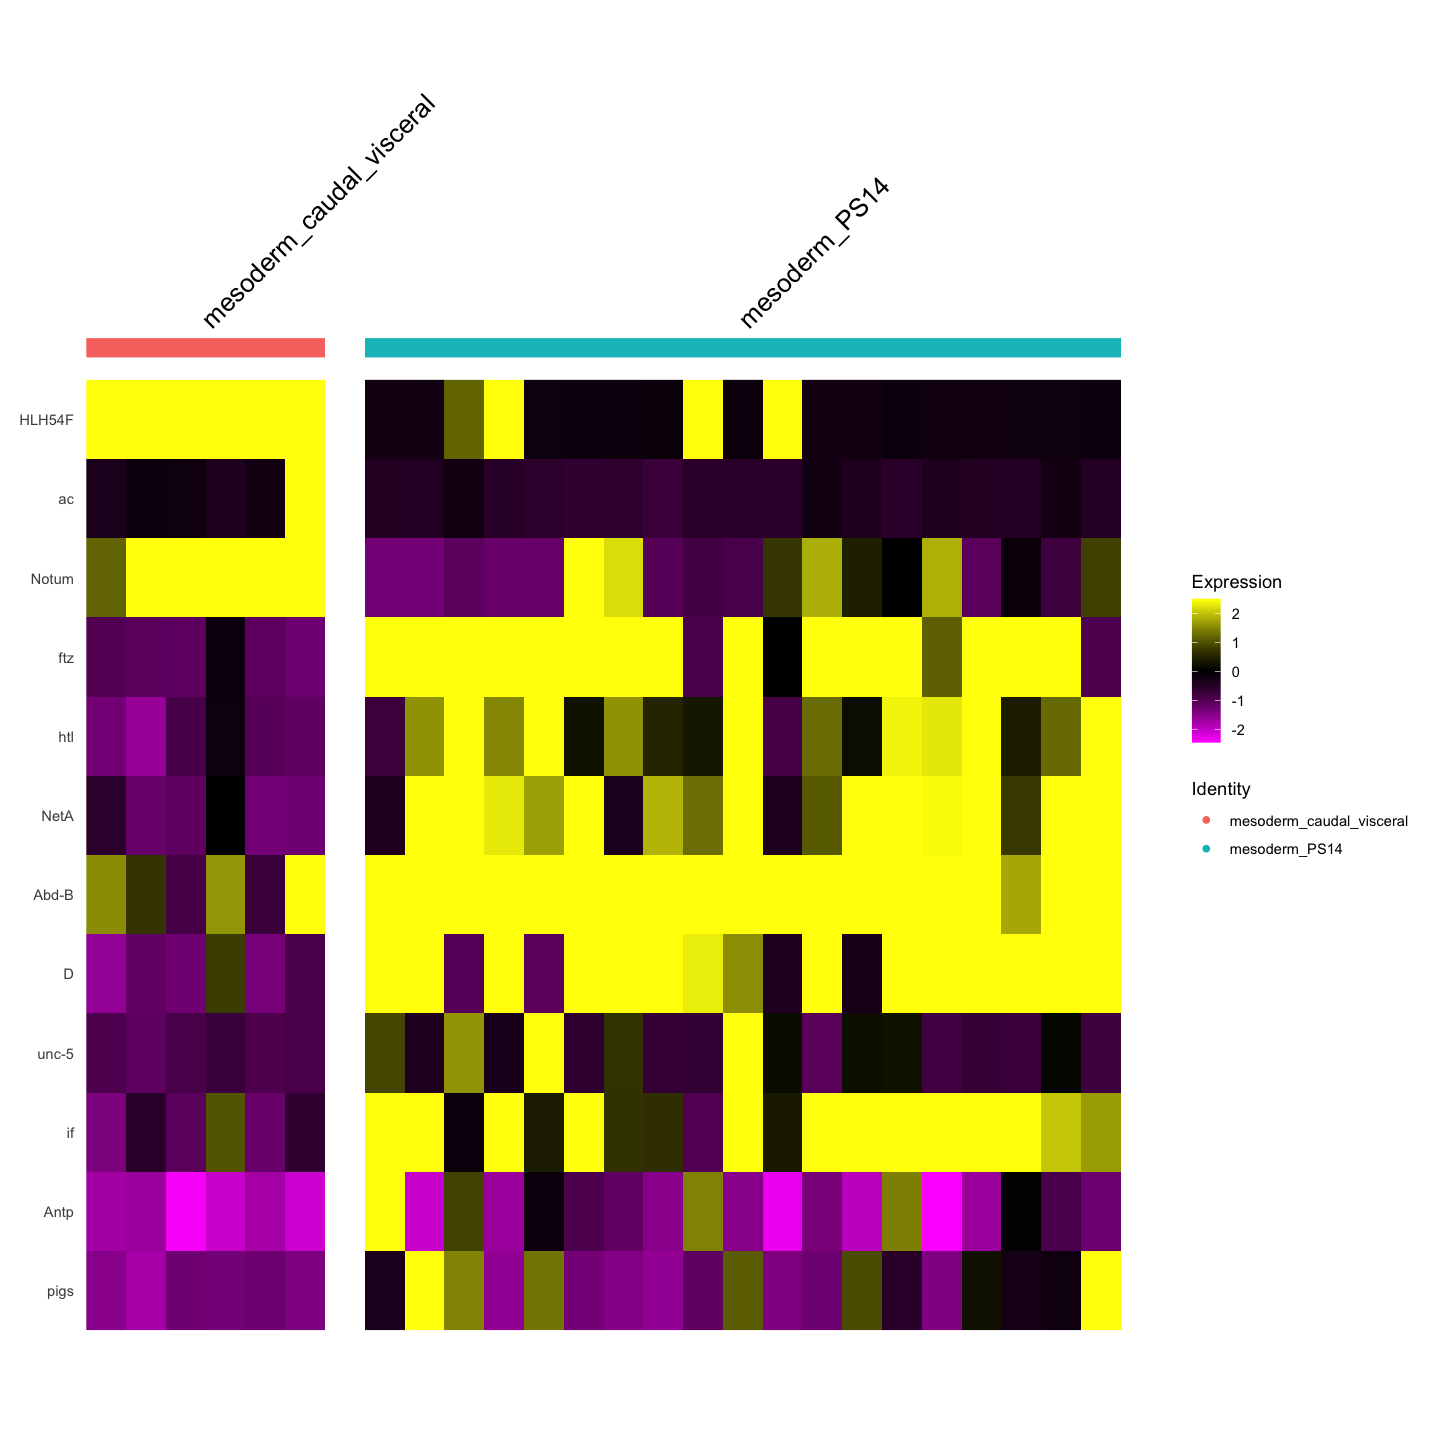

In [44]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.meso.post, features = c(all.markers.meso.top10$gene))
fig
ggsave(fig, file = "././figures/05_mesoderm_subclustering_Set1/post_meso_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

In [45]:
seu.meso.merge <- merge(seu.trunk.meso,y= c(seu.meso.post,seu.meso.gcm))
seu.meso.merge

An object of class Seurat 
28877 features across 236 samples within 2 assays 
Active assay: SCT (11281 features, 0 variable features)
 1 other assay present: RNA

In [46]:
seu.others <- subset(seu_HQC, idents = c(2,3,11,15), invert = T)
seu.others$manual_ID <- 'others'
seu.others

An object of class Seurat 
28877 features across 782 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [47]:
seu.merge <- merge(seu.meso.merge, seu.others)
seu.merge

An object of class Seurat 
28877 features across 1018 samples within 2 assays 
Active assay: SCT (11281 features, 0 variable features)
 1 other assay present: RNA

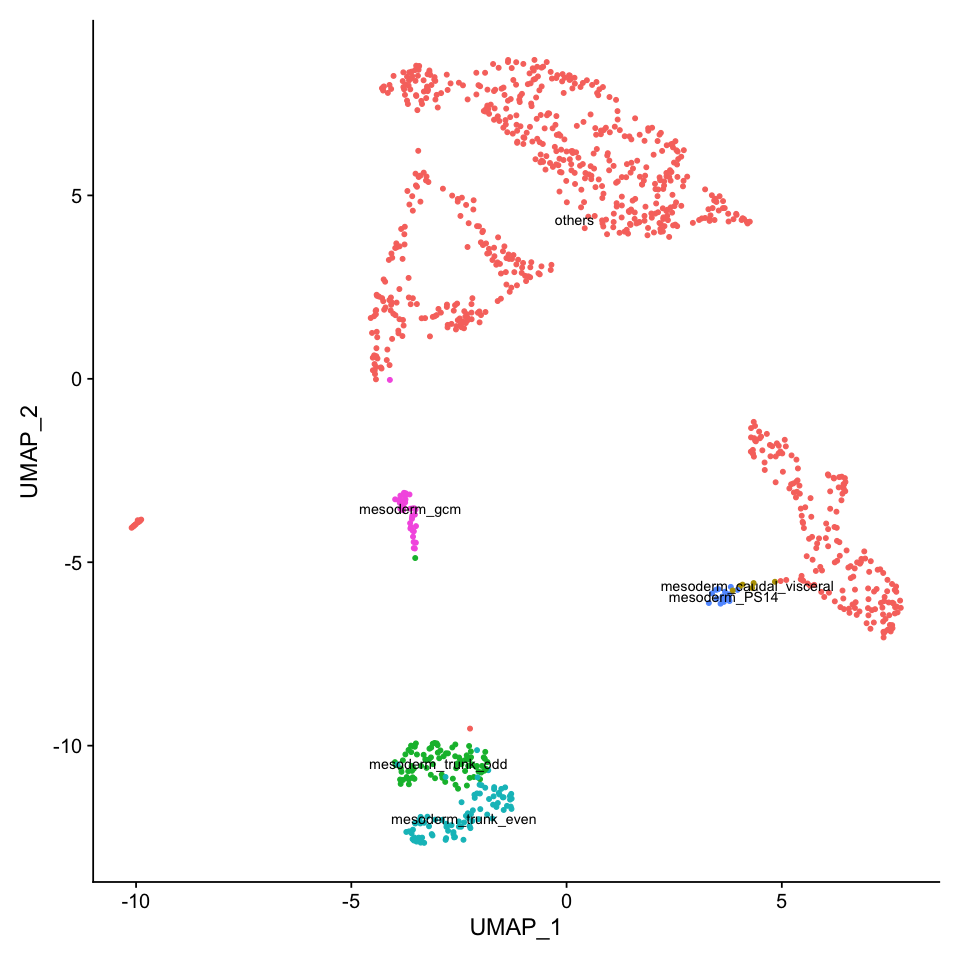

In [48]:
seu_HQC$manual_ID <- seu.merge$manual_ID
Idents(seu_HQC) <- 'manual_ID'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 3) + NoLegend()

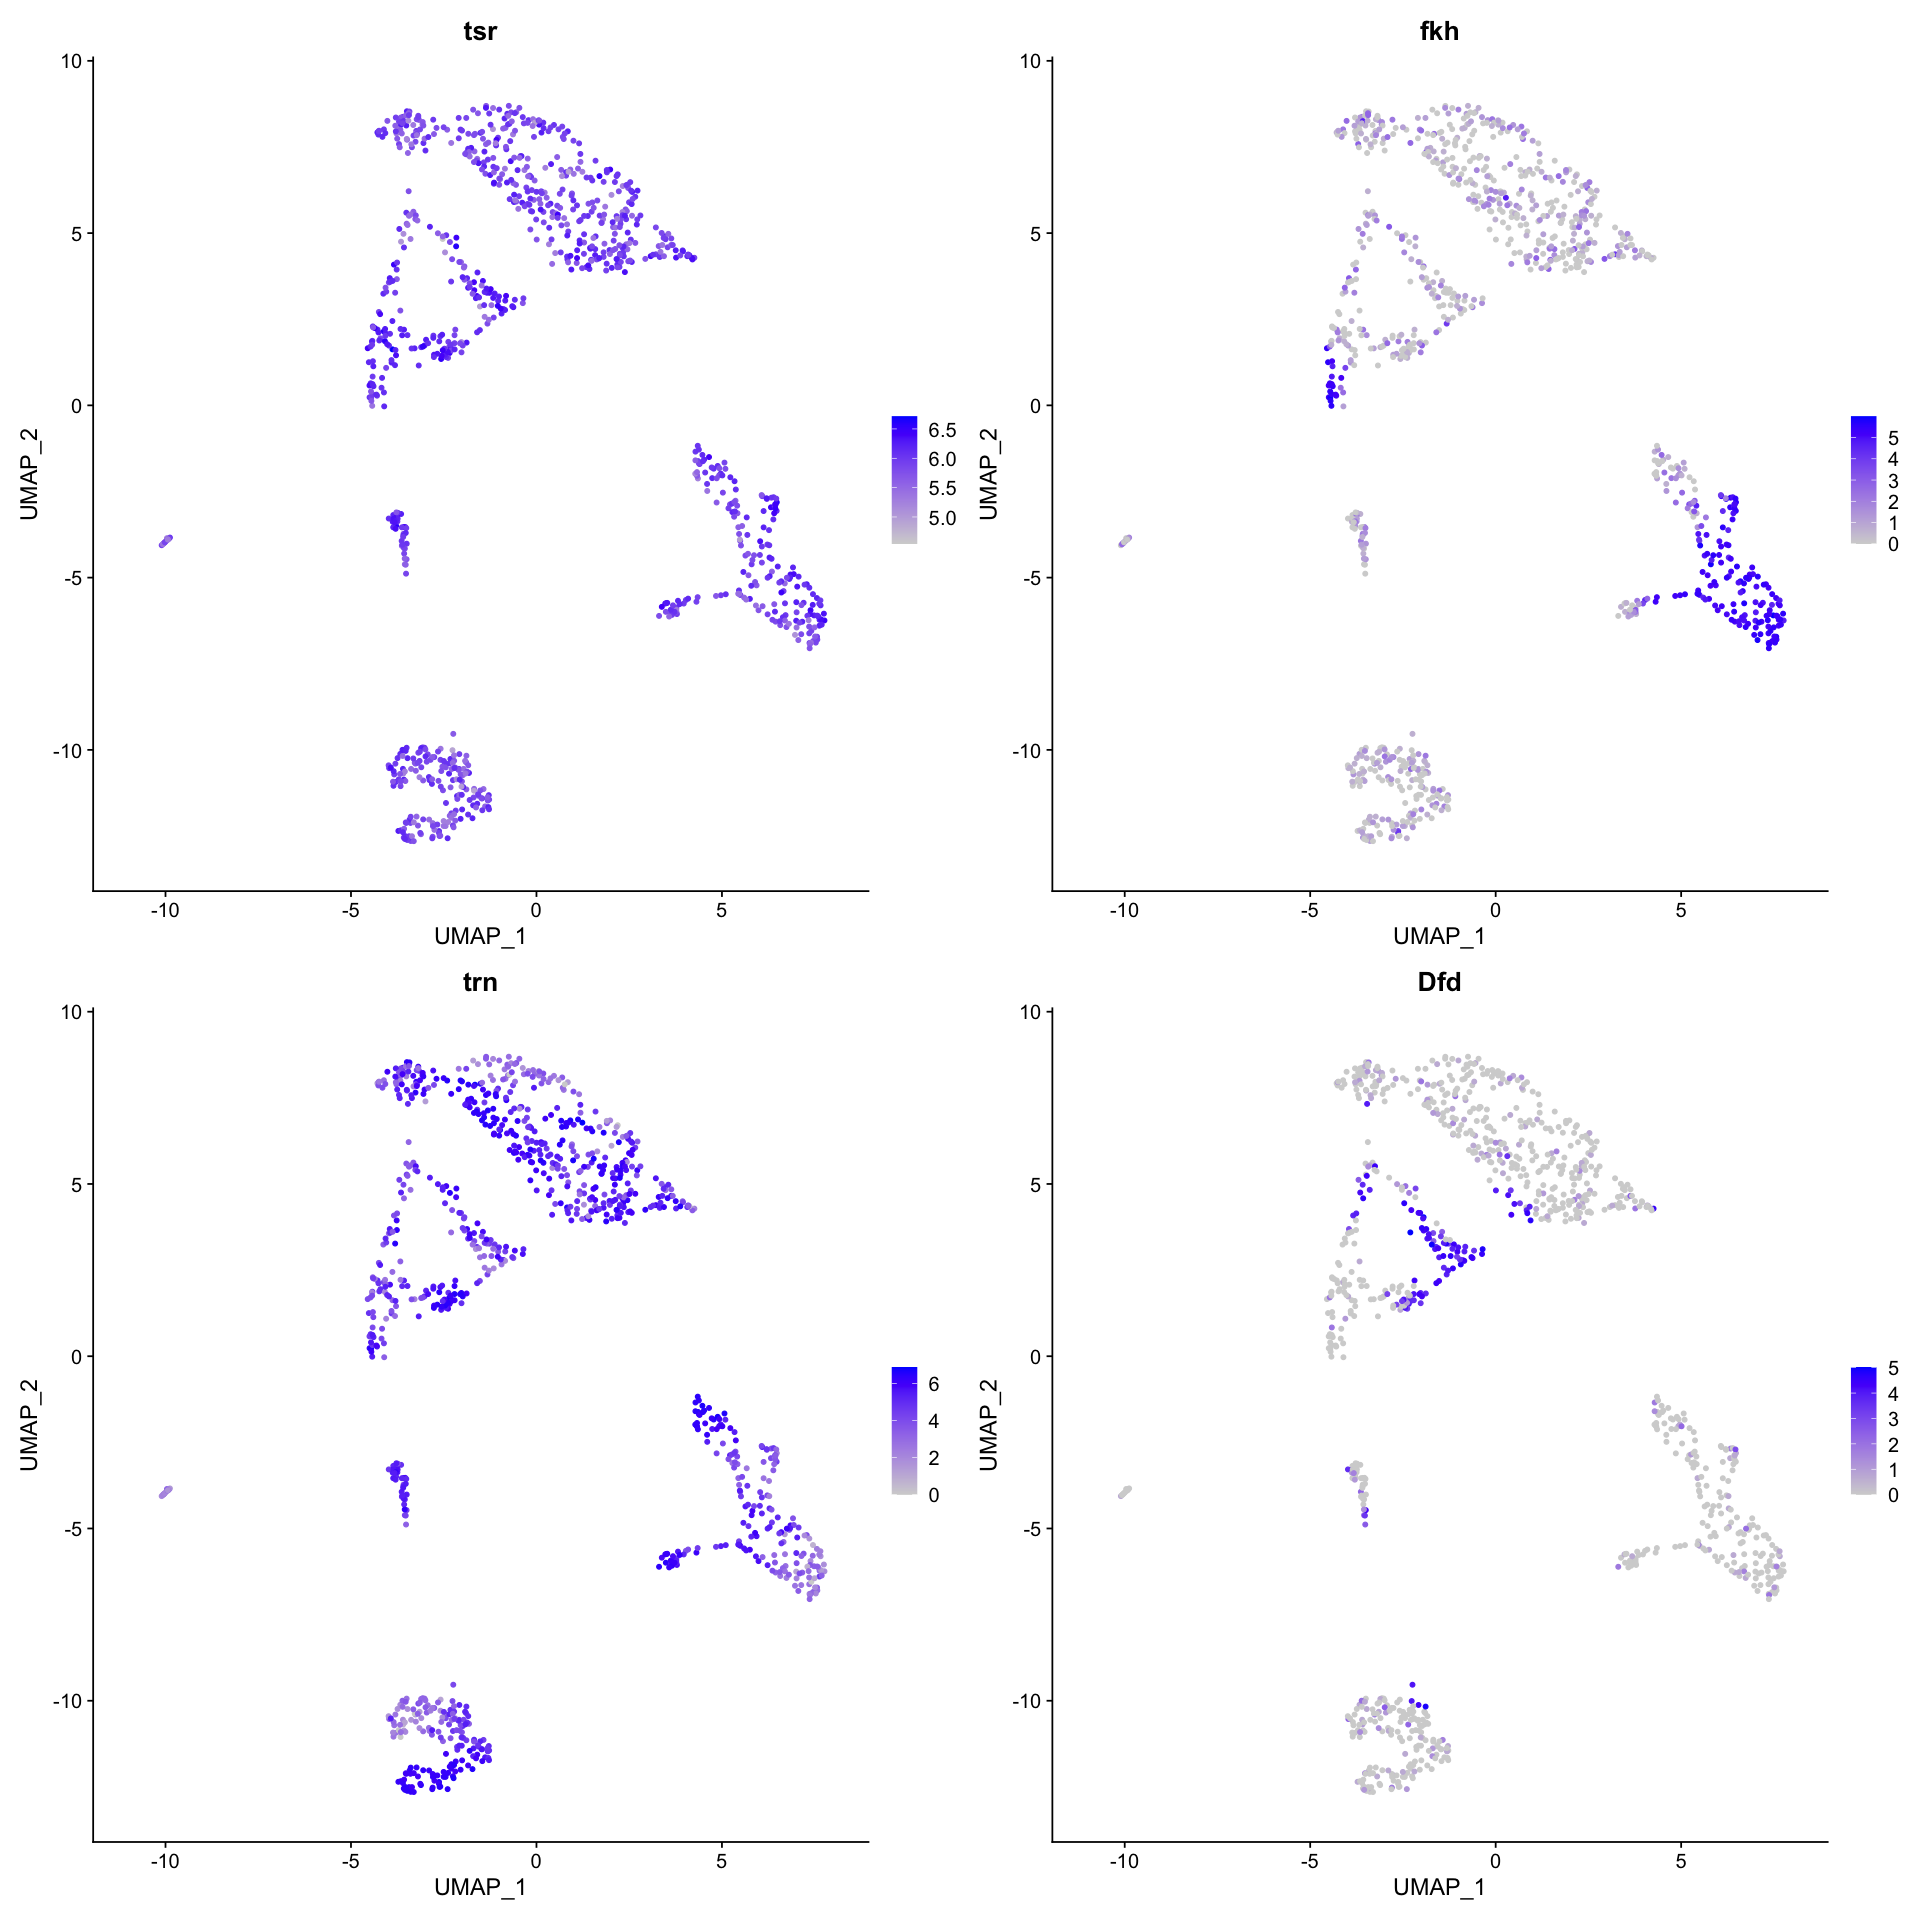

In [49]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, features = c('tsr','fkh','trn','Dfd'))

In [50]:
saveRDS(object = seu.meso.merge, file = '../../data/seurat_object/Set1/subclustering/seu_mesoderm_subclustered.obj')

In [51]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv